# Glaucoma classification

# Glaucoma classification


    2023-10-26
    
    * 不能使用TFhub model（整個模型包成keras layer）做GradCAM，需要使用keras sequence model才能取得內部的conv layer來計算grade與loss，以產生mapping。
    
    * 因此回到 Assignment-2-LSW-20220914-PCGA.ipynb 重新訓練一個序列模型。
    
    * 2023-11-07 重建一個keras sequence model
    * 2023-11-08 完成CAM for regresion model
    
    2023-11-09 include_top 不是 include_preprocessing
    `Note: each Keras Application expects a specific kind of input preprocessing. For EfficientNetV2, by default input preprocessing is included as a part of the model (as a Rescaling layer), and thus tf.keras.applications.efficientnet_v2.preprocess_input is actually a pass-through function. In this use case, EfficientNetV2 models expect their inputs to be float tensors of pixels with values in the [0-255] range. At the same time, preprocessing as a part of the model (i.e. Rescaling layer) can be disabled by setting include_preprocessing argument to False. With preprocessing disabled EfficientNetV2 models expect their inputs to be float tensors of pixels with values in the [-1, 1] range.`
    
    總結：
    include_preprocessing=True : input[0-255]
    include_preprocessing=False: input[-1,-1]
    
    目前都是使用預設 include_preprocessing=True 所以應該是用0-255 但tfds或讀取都是[0,1] ????
```python
    if img is not None:
    #images.append(skimage.transform.resize(img,(img_size,img_size)))                              # resize image [0-1] not sure why??
    images.append(cv2.resize(img,(img_size,img_size), interpolation = cv2.INTER_AREA))             # resize image [0-255]

    check_input_range(images[-1]) # here now [0-1] <- WTF !!!
    """`應該是skimge這裡有問題，改用cv2就正常了！`"""
```


    * 因此，重訓一次EFNv2B0 [0-255]
    
    ⭕️ [2023-11-10] 重訓一次EFNv2B0 [0-255]之後，無論使用fine tune or transfer learning，都無法正常學習，val loss遠高於 train loss，即代表過度擬和於train set，而無法學習到能辨識val的特徵！！
    
    include_preprocessing=True, or False

        ⭕️ 目前最佳結果 ⭕️
        include_preprocessing=False [-1,1] + skimage input[0,1]
        
    
    input[0,255], resscale-layer=True [0,255] no learn
    input[0,1], resscale-layer=True [0,255] 熱力圖最佳      update: 熱力最佳在CDR3加持後MAE已低於42了
    input[0,255], resscale-layer=False [-1,1] no learn
    input[0,1], resscale-layer=False [-1,1] MAE最佳 ⭕️
    
    ⭕️⭕️⭕️ *** 在經過熱力圖確認後，MAE最低44但在熱力圖表現上完全在目標之外，雖然MAE統計成績最佳(相對較佳)但可能僅是模型最大學習了無謂的特徵進行強記。
    因此，使用上一版本2023-10-07版本，
        input[0,1], resscale-layer=True [0,255] no learn
        在學習與熱力圖上取得平衡！！！！
    ⭕️⭕️⭕️        
    
    再提升熱力圖最佳的模型：
        input[0,1], resscale-layer=True [0,255] 熱力圖最佳 ＋ CDR3_preWarmUP
        
        * 熱力圖最佳 01 0255配方 + CDR3 逆轉成最佳MAE了 ２０２３－１１－１０ best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune
        
    
    
    
    
    2023-09-04
    EfficientNet-V2-XL: fine_tune
        fine_tune will got the OOM issue, even in 1 or 2 gpus.
        lest resuce the bs! not work even bs1, bs2!

    2023-09-02
    New dataset incoming!
    
    1.  AE 
    2.EfficientNet-V2-XL (transfer learning 8gpu ~30 mins ~281 epoch)
    
    
    分三資料夾：early 45, mid 59, late 24。預計分別做訓練與預測。
    注意：新收資料太少，應該僅是預測新收資料沒有重新訓練！
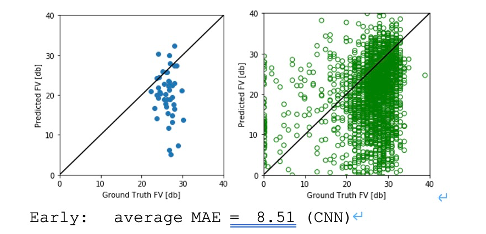
 
## ⭕️ ⚠️ ‼️ 新資料預測改放置 PCGA_data_review_0927-newTest-early-mid-late-2023_09_02.ipynb 中執行！‼️ ⚠️ ⭕️
## ⭕️ ⚠️ ‼️ 這裡 Assignment-2-LSW-20220914-PCGA.ipynb 主要是訓練模型 ‼️ ⚠️ ⭕️



    2023-04-12
    New dataset incoming!
    /home/u3148947/data/PACG_data_20221005/2023_new_test_14/


    2023-02-18
    re-write the FV2Map (8x8) image code to a Function, then share to 文鎰 let he retrain model by original 8x8 fv map not just the Interpolation/extrapolation image.
    
    1. so let recall what we done at last month.
    2. Find the FV2Map code cell and code review.
    3. design a proper Function for reuse. 
    
    
    
    
    

    2022-11-16
    Re check the metrics, should set man_val=40 for PSNR, SSIM.
    

    2022-10-06
    new tain PACG + POAG, and with fixed val list. to compare pix2pix and keypoints reuslts.f
    
    img_list.txt
    1342399_L_merged.jpg
    1310627_R_merged.jpg
    4475746_R_merged.jpg
    0268212_merged.jpg
    1935572_L_merged.jpg
    1545959_merged.jpg
    3602493_merged.jpg
    3407174_merged.jpg
    0849116_L_merged.jpg
    5012674_merged.jpg
    2907064_L_merged.jpg
    4154541_merged.jpg
    3310379_merged.jpg
    3001867_merged.jpg
    1935572_merged.jpg
    4154541_L_merged.jpg
    2815145_L_merged.jpg
    3806920_merged.jpg
    3602493_L_merged.jpg
    3321454_L_merged.jpg
    2815145_merged.jpg
    3167782_merged.jpg
    2216002_R_merged.jpg
    2987599_merged.jpg
    2216002_merged.jpg
    2376139_R_merged.jpg
    2099276_merged.jpg
    
    create NEW CSV for taining and fixed val split. [FV_image_value_1005_train.csv , FV_image_value_1005_val.csv ]
    
    2022-10-07
    add image output of FV value for compare.
    
    2022-10-05
    kick-off 

In [1]:
# ⚠️ 

# 2022-0927 
    new 76 tatal FV_val, we should retrain the model and see.

## 2022-09-14

    well, we come here again for testing regression model for value/point from image.
    

## 2022-09-14 2
    Seems fine, let's modify it to work with PCGA
    
    
    CSV formate with 14 value
    
    filename	x1	y1	x2	y2	x3	y3	x4	y4	x5	y5	x6	y6	x7	y7	x8	y8	x9	y9	x10	y10	x11	y11	x12	y12	x13	y13	x14	y14
00000.jpg	51	51	127	60	169	65	203	52	68	77	85	75	110	82	160	87	171	79	193	84	156	144	92	174	140	180	168	179
00001.jpg	21	20	36	18	57	19	80	25	23	27	34	26	40	28	59	30	68	30	78	33	43	46	31	61	45	66	60	65
00002.jpg	23	116	39	83	47	57	56	19	36	115	40	96	47	87	59	60	59	41	62	31	91	86	106	122	115	100	121	81


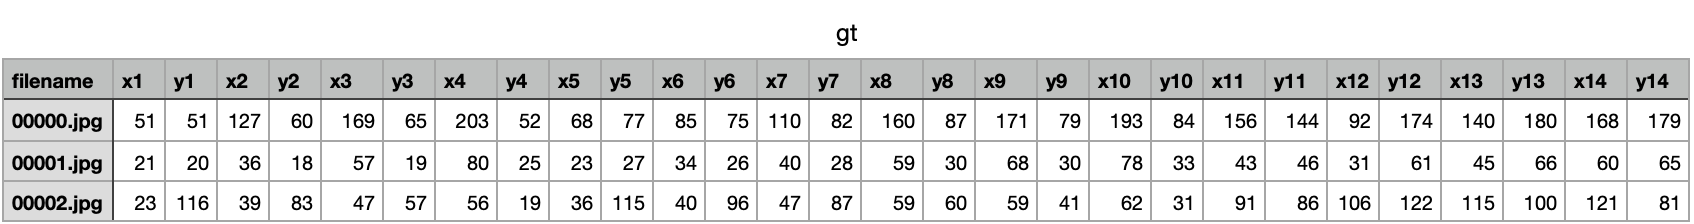


    * Create same from of the csv. DONE
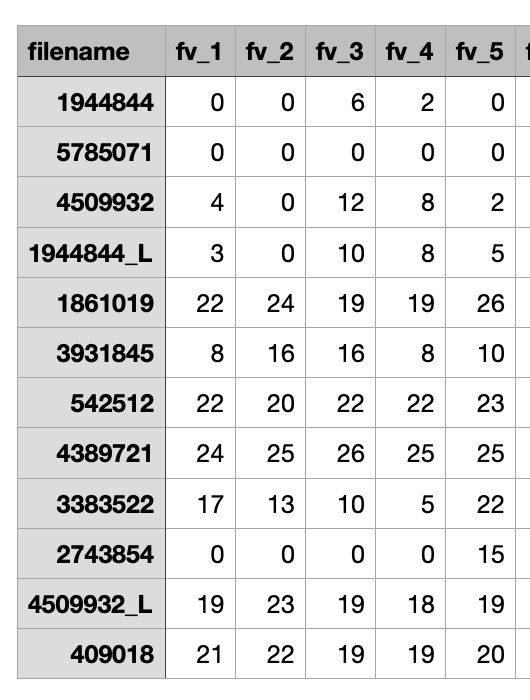
    
    

## 2022-09-15
    * add model Visualization
    * add grandent activation map (X)
    

## 2023-04-10
todo:
    1. ex, augmentation add scale, translation, rotation,
    2. change the models
    3. An image feature vector is a dense 1-D tensor that represents a whole image, Unlike image classification, it discards the classification learned by the publisher model.
    4. TFDS + Augment

## keypoints regression



### Load and preprocess data

Script `get_data.py` unpacks data — images and labelled points. 6000 images are located in `images` folder and keypoint coordinates are in `gt.csv` file. Run the cell below to unpack data.

In [2]:
# from get_data import unpack
# unpack('facial-keypoints-data.zip')

Now you have to read `gt.csv` file and images from `images` dir. File `gt.csv` contains header and ground truth points for every image in `images` folder. It has 29 columns. First column is a filename and next 28 columns are `x` and `y` coordinates for 14 facepoints. We will make following preprocessing:
1. Scale all images to resolution $100 \times 100$ pixels.
2. Scale all coordinates to range $[-0.5; 0.5]$. To obtain that, divide all x's by width (or number of columns) of image, and divide all y's by height (or number of rows) of image and subtract 0.5 from all values.

Function `load_imgs_and_keypoint` should return a tuple of two numpy arrays: `imgs` of shape `(N, 100, 100, 3)`, where `N` is the number of images and `points` of shape `(N, 28)`.

In [3]:
# To enable interactivity you need to use the notebook backend of matplotlib.

# for jupyter-notebook
# %matplotlib notebook 

# for jupyter-lab
# %matplotlib widget

import os
# set log level should be before import tf, to skip "TF_ENABLE_AUTO_MIXED_PRECISION has no effect"
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# INFO messages are not printed.
# This must be run before loading other modules.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [4]:
### Useful routines for preparing data
import numpy as np
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize
import csv, cv2
# import os
import skimage


import tensorflow as tf # replace all keras layers

from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle

import glob
import pandas as pd

from tqdm import tqdm, trange
# import seaborn as sns # LR時sns.set(style='darkgrid')會改變matplotlib的預設繪圖模式例如隔線、透明邊界等 ！＠# Remove this seting sns的風格無法控制 使用matplotlib本身的功能#
from datetime import datetime

In [5]:
print(f'Q tf{tf.__version__}')
print(f'Q cv2{cv2.__version__}')
print(f'Q np{np.__version__}')
print(f'Q pd{pd.__version__}')

Q tf2.13.0
Q cv24.8.1
Q np1.22.2
Q pd1.5.2


In [6]:
# # https://stackoverflow.com/questions/74868664/resourceexhaustederror-only-when-fine-tuning-a-efficientnetv2l-in-tensorflow
# # EfficientNet-V2-XL is a huge model (~833MB). it's normal to face ResourceExhaustedError. 
"""NOT work face the erroe then loading the tf.hub wieght!
"""

# tf.config.optimizer.set_jit(True) # (2)
# tf.keras.mixed_precision.set_global_policy("mixed_float16") # (1)

# physical_devices = tf.config.list_physical_devices('GPU') 
# for pd in physical_devices:
#     tf.config.experimental.set_memory_growth(pd, True) # (3)





"""https://stackoverflow.com/questions/60456843/resourceexhaustederror-while-using-efficientnet-in-keras
0
All the papers seem be using TPUs to run the efficientNets. I have a feeling there is something else 
that is making it use far more memory. I agree it isn't intuitive since there is less training params 
in efficientNets. However, it does seem you need to actually be using TPUs to do it. So basically this 
would require using some cloud service that gives you access to TPUs ect...
"""

"https://stackoverflow.com/questions/60456843/resourceexhaustederror-while-using-efficientnet-in-keras\n0\nAll the papers seem be using TPUs to run the efficientNets. I have a feeling there is something else \nthat is making it use far more memory. I agree it isn't intuitive since there is less training params \nin efficientNets. However, it does seem you need to actually be using TPUs to do it. So basically this \nwould require using some cloud service that gives you access to TPUs ect...\n"

In [7]:
# matplotlib displays color in BGR format, we are converting that to RGB
def plot_rgb_img(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img) #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
#     plt.imshow(img ,cmap='gray') #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [8]:
# take 3000 image to memory take 10mins, we should write it into tf.data 

In [9]:
# tf.data autotune
AUTOTUNE = tf.data.experimental.AUTOTUNE

img_size = 512 #1024 # 224 #500 #50 # 224 for A+DAS test

BATCH_SIZE = 8 #16 32 oom with bone tainable

In [10]:
%%time

#num_imgs = 2 #300 #3000 # take [3000:2*3000]  leave head-3000

# def load_imgs_and_keypoints(dirname='PCGA-points'):
#     # Write your code for loading images and points here
    
#     points_dict={}
#     with open("./FV_image_value_0927.csv", 'r') as csvfile:
#         csvreader = csv.reader(csvfile)
#         count=0
#         for row in csvreader:
#             if count==0:
#                 count+=1
#                 continue
#             points_dict[row[0]]= [int(x) for x in row[1:]]
#     print("Dict created")
    
    
#     folder = "/home/u3148947/data/PACG_0927/PACG_fovea_centered_fundus_crop/"
#     images = []
#     points = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
#         print(filename, os.path.join(folder,filename))
#         img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
#         cols,rows,_ = img.shape                                                          # org image 
#         if img is not None:
#             images.append(skimage.transform.resize(img,(img_size,img_size)))             # resize image
#             filename = os.path.splitext(filename)[0]                                     # without ".jpg"
#             point = points_dict[filename]
#             print("  check---", point, img.shape)
            
# #             for i in range(52):                                                        # fv do need rescal
# #                 """ convert xy to [-0.5, 0.5]
# #                     why?
# #                 """
# #                 print("  check---", "p14#", i)
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i] = point[2*i]/cols - 0.5
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i+1] = point[2*i+1]/rows - 0.5

#             print("  check---", point)
#             points.append(point)
      
#     images = np.array(images)
#     points = np.array(points)
# #     points = sort_points(points)
#     print(images.shape,points.shape)
    
#     return images, points

# imgs, points = load_imgs_and_keypoints()



# 2023-02-18 BK
# def load_imgs_and_keypoints(CSV_name, dirname='PCGA-points'):
#     # Write your code for loading images and points here
#     # sources [10-05]
#     FV_img = "POACG_crop"                          #視野
#     FV_val = "POACG_FV_vaule"                    #視野值
#     FD_img = "PACG_fovea_centered_fundus_crop"                 #眼底
#     FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

#     data_Dir = "~/data/PACG_data_20221005/"
#     data_Dir = "/home/u3148947/data/PACG_data_20221005/"

#     points_dict={}
#     with open(CSV_name, 'r') as csvfile:
#         csvreader = csv.reader(csvfile)
#         count=0
#         for row in csvreader:
#             if count==0:
#                 count+=1
#                 continue
#             points_dict[row[0]]= [int(x) for x in row[1:]]
#     print("Dict created")
# #     print(points_dict['0268212'])
# #     print(points_dict.keys())
#     filename_list = [name + ".jpg" for name in points_dict.keys()]
    
#     folder = "/home/u3148947/data/PACG_data_20221005/POACG_crop"
#     images = []
#     points = []
# #     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
#     for filename in filename_list:                                                       # name from list to make sure all is fixed
#         #print("  check---", filename, os.path.join(folder,filename))
#         img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
#         #print("  check---", "img read")
#         cols,rows,_ = img.shape                                                          # org image 
        
#         if img is not None:
#             images.append(skimage.transform.resize(img,(img_size,img_size)))             # resize image
#             #print("  check---", "image append")
#             filename = os.path.splitext(filename)[0]                                     # without ".jpg"
#             #print("  check---", "filename rm .jpg")
#             point = points_dict[filename]
#             #print("  check---", point, img.shape)
            
# #             for i in range(52):                                                        # fv do need rescal
# #                 """ convert xy to [-0.5, 0.5]
# #                     why?
# #                 """
# #                 print("  check---", "p14#", i)
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i] = point[2*i]/cols - 0.5
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i+1] = point[2*i+1]/rows - 0.5

#             #print("  check---", point)
#             points.append(point)
      
#     images = np.array(images)
#     points = np.array(points)
# #     points = sort_points(points)
#     print(images.shape,points.shape)
    
#     return images, points

# # NoFixedShuffle
# # imgs, points = load_imgs_and_keypoints("FV_image_value_1005.csv")

# # FixedShuffle
# imgs_train, points_train = load_imgs_and_keypoints("FV_image_value_1005_train.csv")
# imgs_val, points_val = load_imgs_and_keypoints("FV_image_value_1005_val.csv")


def check_input_range(input):
    print(f'shape:{input.shape}\ndtype:{input.dtype}\nvmax:{np.max(input)}\nvmin:{np.min(input)}\n')
    

def load_imgs_and_keypoints(CSV_name, dirname='PCGA-points'):
    # Write your code for loading images and points here
    # sources [10-05]
    FV_img = "POACG_crop"                          #視野
    FV_val = "POACG_FV_vaule"                    #視野值
    FD_img = "PACG_fovea_centered_fundus_crop"                 #眼底
    FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

    data_Dir = "~/data/PACG_data_20221005/"
    data_Dir = "/home/u3148947/data/PACG_data_20221005/"

    points_dict={}
    with open(CSV_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
    print(f"[{CSV_name}]\t Dict creating.... may take a while.")
#     print(points_dict['0268212'])
#     print(points_dict.keys())
    filename_list = [name + ".jpg" for name in points_dict.keys()]
    
    folder = "/home/u3148947/data/PACG_data_20221005/POACG_crop"
    images = []
    points = []
    filename_arr = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
    for filename in tqdm(filename_list):                                                       # name from list to make sure all is fixed
        #print("  check---", filename, os.path.join(folder,filename))
        img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
        check_input_range(img) # here now [0-255]
        #print("  check---", "img read")
        cols,rows,_ = img.shape                                                          # org image 
        
        if img is not None:
            images.append(skimage.transform.resize(img,(img_size,img_size)))                              # resize image [0-1] not sure why??
#             images.append(cv2.resize(img,(img_size,img_size), interpolation = cv2.INTER_AREA))             # resize image [0-255]
            
            check_input_range(images[-1]) # here now [0-1] <- WTF !!!
            
            #print("  check---", "image append")
            filename = os.path.splitext(filename)[0]                                     # without ".jpg"
            #print("  check---", "filename rm .jpg")
            point = points_dict[filename]
            #print("  check---", point, img.shape)
            
#             for i in range(52):                                                        # fv do need rescal
#                 """ convert xy to [-0.5, 0.5]
#                     why?
#                 """
#                 print("  check---", "p14#", i)
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i] = point[2*i]/cols - 0.5
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i+1] = point[2*i+1]/rows - 0.5

            #print("  check---", point)
            points.append(point)
            filename_arr.append(filename)
            
      
    images = np.array(images).astype(np.float32)
    points = np.array(points)
    filename_arr = np.array(filename_arr)
#     points = sort_points(points)
    print(images.shape,points.shape)
    
    return images, points, filename_arr

# NoFixedShuffle
# imgs, points = load_imgs_and_keypoints("FV_image_value_1005.csv")

# FixedShuffle
imgs_train, points_train, filename_train = load_imgs_and_keypoints("FV_image_value_1005_train.csv")
imgs_val, points_val, filename_val = load_imgs_and_keypoints("FV_image_value_1005_val.csv")




[FV_image_value_1005_train.csv]	 Dict creating.... may take a while.


  0%|          | 1/244 [00:00<00:30,  7.95it/s]

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999723255967
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  1%|          | 3/244 [00:00<00:29,  8.14it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  2%|▏         | 5/244 [00:00<00:28,  8.47it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  3%|▎         | 7/244 [00:00<00:27,  8.52it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  4%|▎         | 9/244 [00:01<00:27,  8.61it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  5%|▍         | 11/244 [00:01<00:27,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999722573372
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  5%|▌         | 13/244 [00:01<00:26,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999723255967
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999723938563
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  6%|▌         | 15/244 [00:01<00:26,  8.55it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  7%|▋         | 17/244 [00:01<00:26,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  8%|▊         | 19/244 [00:02<00:26,  8.61it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999723938563
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  9%|▊         | 21/244 [00:02<00:25,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



  9%|▉         | 23/244 [00:02<00:25,  8.62it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 10%|█         | 25/244 [00:02<00:25,  8.64it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 11%|█         | 27/244 [00:03<00:25,  8.61it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 12%|█▏        | 29/244 [00:03<00:25,  8.55it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 13%|█▎        | 31/244 [00:03<00:24,  8.55it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 14%|█▎        | 33/244 [00:03<00:24,  8.56it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 14%|█▍        | 35/244 [00:04<00:24,  8.56it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 15%|█▌        | 37/244 [00:04<00:24,  8.52it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 16%|█▌        | 39/244 [00:04<00:23,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 17%|█▋        | 41/244 [00:04<00:23,  8.64it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 18%|█▊        | 43/244 [00:05<00:23,  8.57it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 18%|█▊        | 45/244 [00:05<00:23,  8.51it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 19%|█▉        | 47/244 [00:05<00:22,  8.58it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 20%|██        | 49/244 [00:05<00:22,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 21%|██        | 51/244 [00:05<00:22,  8.61it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 22%|██▏       | 53/244 [00:06<00:22,  8.62it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 23%|██▎       | 55/244 [00:06<00:21,  8.66it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 23%|██▎       | 57/244 [00:06<00:21,  8.61it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 24%|██▍       | 59/244 [00:06<00:21,  8.62it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 25%|██▌       | 61/244 [00:07<00:21,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999723255968
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 26%|██▌       | 63/244 [00:07<00:21,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 27%|██▋       | 65/244 [00:07<00:20,  8.57it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.999999972257337
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 27%|██▋       | 67/244 [00:07<00:20,  8.58it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 28%|██▊       | 69/244 [00:08<00:20,  8.57it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 29%|██▉       | 71/244 [00:08<00:20,  8.62it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 30%|██▉       | 73/244 [00:08<00:19,  8.58it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 31%|███       | 75/244 [00:08<00:19,  8.58it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 32%|███▏      | 77/244 [00:08<00:19,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 32%|███▏      | 79/244 [00:09<00:19,  8.63it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 33%|███▎      | 81/244 [00:09<00:19,  8.57it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 34%|███▍      | 83/244 [00:09<00:18,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 35%|███▍      | 85/244 [00:09<00:18,  8.62it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 36%|███▌      | 87/244 [00:10<00:18,  8.64it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 36%|███▋      | 89/244 [00:10<00:18,  8.57it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 37%|███▋      | 91/244 [00:10<00:17,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 38%|███▊      | 93/244 [00:10<00:17,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 39%|███▉      | 95/244 [00:11<00:17,  8.61it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 40%|███▉      | 97/244 [00:11<00:17,  8.58it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 41%|████      | 99/244 [00:11<00:16,  8.64it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 41%|████▏     | 101/244 [00:11<00:16,  8.64it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 42%|████▏     | 103/244 [00:11<00:16,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 43%|████▎     | 105/244 [00:12<00:16,  8.57it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 44%|████▍     | 107/244 [00:12<00:15,  8.61it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 45%|████▍     | 109/244 [00:12<00:15,  8.63it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 45%|████▌     | 111/244 [00:12<00:15,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 46%|████▋     | 113/244 [00:13<00:15,  8.47it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 47%|████▋     | 115/244 [00:13<00:15,  8.48it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 48%|████▊     | 117/244 [00:13<00:15,  8.45it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 49%|████▉     | 119/244 [00:13<00:14,  8.47it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 50%|████▉     | 121/244 [00:14<00:14,  8.51it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 50%|█████     | 123/244 [00:14<00:14,  8.53it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 51%|█████     | 125/244 [00:14<00:14,  8.48it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 52%|█████▏    | 127/244 [00:14<00:13,  8.52it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 53%|█████▎    | 129/244 [00:15<00:13,  8.50it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 54%|█████▎    | 131/244 [00:15<00:13,  8.52it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 55%|█████▍    | 133/244 [00:15<00:13,  8.46it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 55%|█████▌    | 135/244 [00:15<00:12,  8.51it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 56%|█████▌    | 137/244 [00:15<00:12,  8.48it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 57%|█████▋    | 139/244 [00:16<00:12,  8.47it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 58%|█████▊    | 141/244 [00:16<00:12,  8.47it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 59%|█████▊    | 143/244 [00:16<00:11,  8.54it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 59%|█████▉    | 145/244 [00:16<00:11,  8.53it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 60%|██████    | 147/244 [00:17<00:11,  8.48it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 61%|██████    | 149/244 [00:17<00:11,  8.46it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 62%|██████▏   | 151/244 [00:17<00:10,  8.51it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 63%|██████▎   | 153/244 [00:17<00:10,  8.52it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 64%|██████▎   | 155/244 [00:18<00:10,  8.49it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 64%|██████▍   | 157/244 [00:18<00:10,  8.49it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 65%|██████▌   | 159/244 [00:18<00:10,  8.49it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.999999944719453
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 66%|██████▌   | 161/244 [00:18<00:09,  8.47it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 67%|██████▋   | 163/244 [00:19<00:09,  8.47it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 68%|██████▊   | 165/244 [00:19<00:09,  8.48it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 68%|██████▊   | 167/244 [00:19<00:09,  8.48it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 69%|██████▉   | 169/244 [00:19<00:08,  8.45it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 70%|███████   | 171/244 [00:19<00:08,  8.45it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 71%|███████   | 173/244 [00:20<00:08,  8.43it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999722573372
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 72%|███████▏  | 175/244 [00:20<00:08,  8.13it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 73%|███████▎  | 177/244 [00:20<00:08,  8.34it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 73%|███████▎  | 179/244 [00:20<00:07,  8.50it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 74%|███████▍  | 181/244 [00:21<00:07,  8.55it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 75%|███████▌  | 183/244 [00:21<00:07,  8.51it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 76%|███████▌  | 185/244 [00:21<00:06,  8.57it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 77%|███████▋  | 187/244 [00:21<00:06,  8.58it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 77%|███████▋  | 189/244 [00:22<00:06,  8.55it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999722573372
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 78%|███████▊  | 191/244 [00:22<00:06,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 79%|███████▉  | 193/244 [00:22<00:05,  8.62it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999445829338
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 80%|███████▉  | 195/244 [00:22<00:05,  8.57it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 81%|████████  | 197/244 [00:23<00:05,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 82%|████████▏ | 199/244 [00:23<00:05,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 82%|████████▏ | 201/244 [00:23<00:04,  8.65it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 83%|████████▎ | 203/244 [00:23<00:04,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 84%|████████▍ | 205/244 [00:23<00:04,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 85%|████████▍ | 207/244 [00:24<00:04,  8.63it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 86%|████████▌ | 209/244 [00:24<00:04,  8.63it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 86%|████████▋ | 211/244 [00:24<00:03,  8.63it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 87%|████████▋ | 213/244 [00:24<00:03,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 88%|████████▊ | 215/244 [00:25<00:03,  8.66it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999995102918879
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 89%|████████▉ | 217/244 [00:25<00:03,  8.62it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 90%|████████▉ | 219/244 [00:25<00:02,  8.61it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 91%|█████████ | 221/244 [00:25<00:02,  8.60it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 91%|█████████▏| 223/244 [00:26<00:02,  8.63it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 92%|█████████▏| 225/244 [00:26<00:02,  8.64it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 93%|█████████▎| 227/244 [00:26<00:01,  8.58it/s]

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999999317404
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 94%|█████████▍| 229/244 [00:26<00:01,  8.59it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 95%|█████████▍| 231/244 [00:26<00:01,  8.52it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 95%|█████████▌| 233/244 [00:27<00:01,  8.47it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 96%|█████████▋| 235/244 [00:27<00:01,  8.45it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999998634808
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 97%|█████████▋| 237/244 [00:27<00:00,  8.54it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 98%|█████████▊| 239/244 [00:27<00:00,  8.54it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 99%|█████████▉| 241/244 [00:28<00:00,  8.55it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



100%|█████████▉| 243/244 [00:28<00:00,  8.45it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



100%|██████████| 244/244 [00:28<00:00,  8.55it/s]


shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

(244, 512, 512, 3) (244, 52)
[FV_image_value_1005_val.csv]	 Dict creating.... may take a while.


  4%|▎         | 1/27 [00:00<00:03,  7.78it/s]

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 11%|█         | 3/27 [00:00<00:02,  8.22it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 19%|█▊        | 5/27 [00:00<00:02,  8.30it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 26%|██▌       | 7/27 [00:00<00:02,  8.13it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 33%|███▎      | 9/27 [00:01<00:02,  8.13it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 41%|████      | 11/27 [00:01<00:01,  8.32it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 48%|████▊     | 13/27 [00:01<00:01,  8.43it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 56%|█████▌    | 15/27 [00:01<00:01,  8.52it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 63%|██████▎   | 17/27 [00:02<00:01,  8.55it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 70%|███████   | 19/27 [00:02<00:00,  8.48it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 78%|███████▊  | 21/27 [00:02<00:00,  8.51it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:0.9999999723938563
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 85%|████████▌ | 23/27 [00:02<00:00,  8.54it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



 93%|█████████▎| 25/27 [00:02<00:00,  8.54it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0



100%|██████████| 27/27 [00:03<00:00,  8.39it/s]

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0

shape:(1024, 1024, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:float64
vmax:1.0
vmin:0.0



(27, 512, 512, 3) (27, 52)
CPU times: user 32.3 s, sys: 1.65 s, total: 34 s
Wall time: 32.7 s


In [11]:
imgs_train[1].shape

(512, 512, 3)

### Check image range [0-255]?

In [12]:
check_input_range(imgs_train[1])

shape:(512, 512, 3)
dtype:float32
vmax:1.0
vmin:0.0



In [13]:
check_input_range(imgs_val[1])

shape:(512, 512, 3)
dtype:float32
vmax:1.0
vmin:0.0



In [14]:
def load_imgs_and_keypoints_test(CSV_name, dirname='PCGA-points'):
    # Write your code for loading images and points here
    # sources [10-05]
    FV_img = "POACG_crop"                          #視野
    FV_val = "POACG_FV_vaule"                    #視野值
    FD_img = "PACG_fovea_centered_fundus_crop"                 #眼底
    FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

    data_Dir = "~/data/PACG_data_20221005/"
    data_Dir = "/home/u3148947/data/PACG_data_20221005/"

    points_dict={}
    with open(CSV_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
    print(f"[{CSV_name}]\t Dict created.... may take a while.")
#     print(points_dict['0268212'])
#     print(points_dict.keys())
    filename_list = [name + ".jpg" for name in points_dict.keys()]
    
    folder = "/home/u3148947/data/PACG_data_20221005/2023_new_test_14"
    images = []
    points = []
    filename_arr = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
    for filename in tqdm(filename_list):                                                       # name from list to make sure all is fixed
        #print("  check---", filename, os.path.join(folder,filename))
        img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
        #print("  check---", "img read")
        cols,rows,_ = img.shape                                                          # org image 
        
        if img is not None:
            images.append(skimage.transform.resize(img,(img_size,img_size)))                              # resize image [0-1] not sure why??
#             images.append(cv2.resize(img,(img_size,img_size), interpolation = cv2.INTER_AREA))             # resize image [0-255]
            
            #print("  check---", "image append")
            filename = os.path.splitext(filename)[0]                                     # without ".jpg"
            #print("  check---", "filename rm .jpg")
            point = points_dict[filename]
            #print("  check---", point, img.shape)
            
#             for i in range(52):                                                        # fv do need rescal
#                 """ convert xy to [-0.5, 0.5]
#                     why?
#                 """
#                 print("  check---", "p14#", i)
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i] = point[2*i]/cols - 0.5
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i+1] = point[2*i+1]/rows - 0.5

            #print("  check---", point)
            points.append(point)
            filename_arr.append(filename)
            
      
    images = np.array(images).astype(np.float32)
    points = np.array(points)
    filename_arr = np.array(filename_arr)
#     points = sort_points(points)
    print(images.shape,points.shape)
    
    return images, points, filename_arr


# FixedShuffle
imgs_test, points_test, filename_test = load_imgs_and_keypoints_test("FV_image_value_2023_new_test14.csv")



[FV_image_value_2023_new_test14.csv]	 Dict created.... may take a while.


100%|██████████| 14/14 [00:01<00:00,  8.79it/s]

(14, 512, 512, 3) (14, 52)


#### Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
就轉uint8 或皈依到01兩種方式才能繪圖

In [15]:
check_input_range(imgs_train[0])

shape:(512, 512, 3)
dtype:float32
vmax:1.0
vmin:0.0



In [16]:
check_input_range(imgs_test[0])

shape:(512, 512, 3)
dtype:float32
vmax:1.0
vmin:0.0



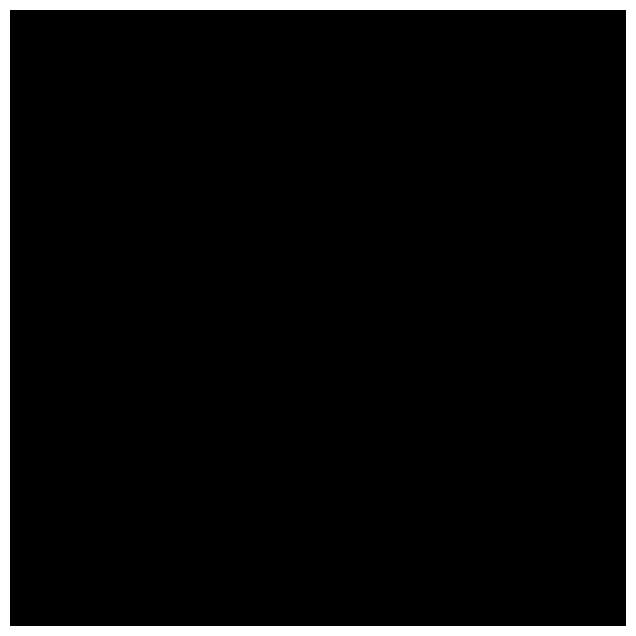

In [17]:
plot_rgb_img(imgs_train[0].astype('uint8'))

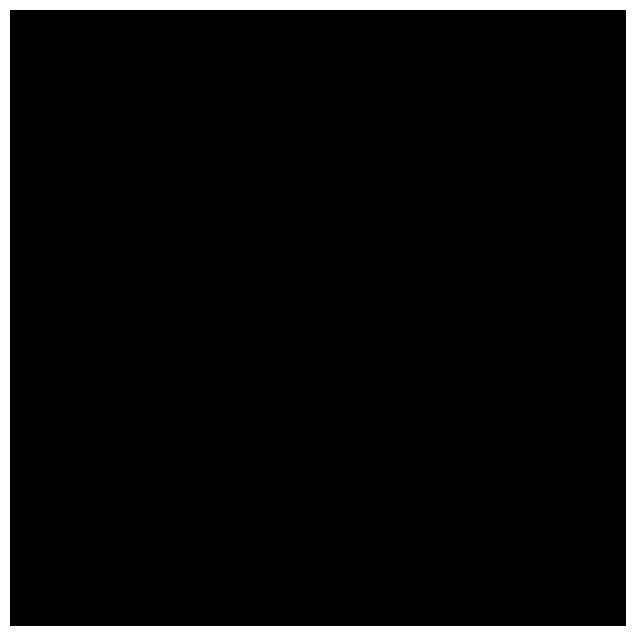

In [18]:
plot_rgb_img(imgs_test[0].astype('uint8'))

In [19]:
points_test[0]

array([30, 29, 29, 29, 32, 29, 31, 31, 30, 30, 31, 33, 36, 32, 32, 31, 30,
       29, 33, 31, 32, 32, 32, 30, 29, 29, 31,  0, 29, 32, 32, 32, 31, 28,
       30, 30, 31, 32, 30, 31, 30, 30, 30, 30, 31, 30, 30, 29, 30, 30, 27,
       29])

## tfds shuffle 
    🧩 🧩 NO we are not use tfda currently!! 🧩 🧩 YES WE USE TFDS NOW !!!!

In [20]:
# tfds shuffle 
# train_all = tf.data.Dataset.zip((imgs_train, points_train))  #tf.ds.zip is ziping tfds not the normal list/dic.
# train_all = train_all.shuffle(50, reshuffle_each_iteration=True)

# 20230410 tfds from tf.data.Dataset.from_tensors
"""
from__tensor_slices(tensors)將輸入的tensors中的每一個element按行進行劃分，然後存入dataset
from_tensors(tensors)將輸入的tensors壓縮為一個element，存入dataset

imgs_train, points_train, filename_train = load_imgs_and_keypoints("FV_image_value_1005_train.csv")
imgs_val, points_val, filename_val = load_imgs_and_keypoints("FV_image_value_1005_val.csv")
"""

# Train
tds_im_train = tf.data.Dataset.from_tensor_slices(imgs_train)
tds_pt_train = tf.data.Dataset.from_tensor_slices(points_train)
tds_fn_train = tf.data.Dataset.from_tensor_slices(filename_train)
# val
tds_im_val = tf.data.Dataset.from_tensor_slices(imgs_val)
tds_pt_val = tf.data.Dataset.from_tensor_slices(points_val)
tds_fn_val = tf.data.Dataset.from_tensor_slices(filename_val)
# # test
# tds_im_test = tf.data.Dataset.from_tensor_slices(imgs_test)
# tds_pt_test = tf.data.Dataset.from_tensor_slices(points_test)
# tds_fn_test = tf.data.Dataset.from_tensor_slices(filename_test)

In [21]:
print(tds_im_train.cardinality().numpy())

244


In [22]:
tds_im_train

<_TensorSliceDataset element_spec=TensorSpec(shape=(512, 512, 3), dtype=tf.float32, name=None)>

In [23]:
tds_im_train.take(1)

<_TakeDataset element_spec=TensorSpec(shape=(512, 512, 3), dtype=tf.float32, name=None)>

In [24]:
# Yep, have to connvert tfds to list then we can show it.
tds_im_train_list = list(tds_im_train.as_numpy_iterator())

In [25]:
tds_im_train_list[1]

array([[[0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

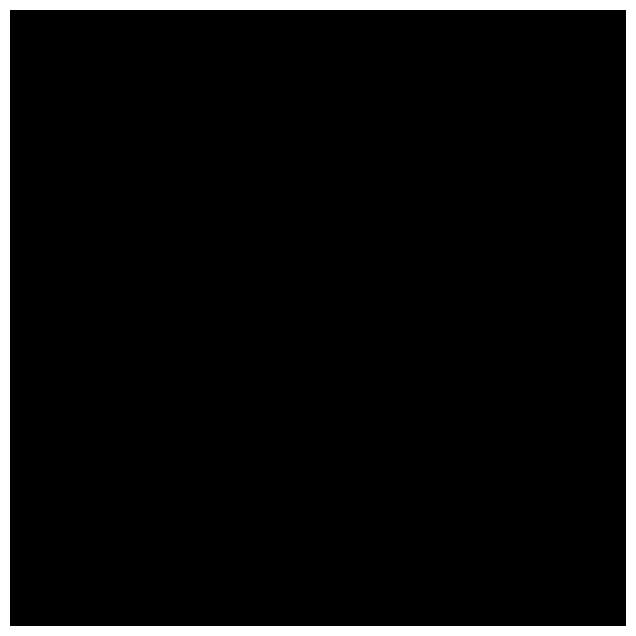

In [26]:
plot_rgb_img(tds_im_train_list[0].astype('uint8'))

In [27]:
tds_pt_train_list = list(tds_pt_train.as_numpy_iterator())

In [28]:
tds_pt_train_list[2]

array([24, 23, 26, 26, 24, 27, 26, 28, 27, 25, 25, 28, 28, 30, 29, 27, 22,
       21, 24, 28, 30, 31,  7,  9, 24, 26, 17, 26, 21, 22, 30,  0,  0, 23,
       13, 20, 17, 27, 26, 25,  1, 23, 16, 16, 27, 27, 27, 26, 20, 23, 26,
       26])

#### tds_im and tds_pt is checked ok!

### Create tds train X, Y and batch

In [29]:
tds_train_xy = tf.data.Dataset.zip((tds_im_train, tds_pt_train))
tds_val_xy = tf.data.Dataset.zip((tds_im_val, tds_pt_val))
# tds_test_xy = tf.data.Dataset.zip((tds_im_test, tds_pt_test))

In [30]:
"""    ds = ds.shuffle(ds_shuffle_buffer_size, reshuffle_each_iteration=ds_reshuffle_each_iteration) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(MULTI_BATCH_SIZE)#MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve"""

# tds_train_xy = tds_train_xy.shuffle(buffer_size=tds_im_train.cardinality().numpy(),reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
tds_val_xy = tds_val_xy.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)




#### (1) try layer aug test

In [31]:
"""tf.keras.layers.RandomRotation(0.05, fill_mode="constant")
By default, random rotations are only applied during training. At inference time, the layer does nothing. 
If you need to apply random rotations at inference time, set training to True when calling the layer.
360度(角度) = 2PI (弧度)
一圓 = 2PI 約(6.2832弧)
(一個弧 = 57.2958角度) 
0.2 == [-20% * 2pi, 20% * 2pi]  弧
    0.05 約正負18角度
"""
"""tf.keras.layers.RandomTranslation(height_factor=0.05, width_factor=0.05, fill_mode='constant')
1024 * 0.05 = 51.2 pixel 正負 上下左右位移
"""
"""tf.keras.layers.RandomZoom(
"""
"""tf.keras.layers.RandomBrightness(factor, value_range=(0, 255), only for newer tf version not this tf2.6!
Note that different brightness adjustment factors will be apply to each the images in the batch.
Float or a list/tuple of 2 floats between -1.0 and 1.0. The factor is used to determine the lower bound and upper bound of 
the brightness adjustment. 
A float value will be chosen randomly between the limits. When -1.0 is chosen, the output image will be black, and when 1.0 is chosen, 
the image will be fully white.
"""
data_augmentation = tf.keras.Sequential([
  #layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomTranslation(height_factor=0.05, width_factor=0.05, fill_mode='constant'),
    tf.keras.layers.RandomRotation(0.05, fill_mode="constant"),
    tf.keras.layers.RandomZoom(height_factor=0.05, width_factor=0.05, fill_mode='constant'),
    tf.keras.layers.RandomContrast(.9),
    #tf.keras.layers.RandomBrightness(0.1, value_range=(0, 255)),

])


# augmented_tds_train_xy = tds_train_xy.batch(BATCH_SIZE).map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

# 2026-06-12
augmented_tds_train_xy = tds_train_xy.batch(BATCH_SIZE).cache(f"PACG_tfds_cache/{img_size}")


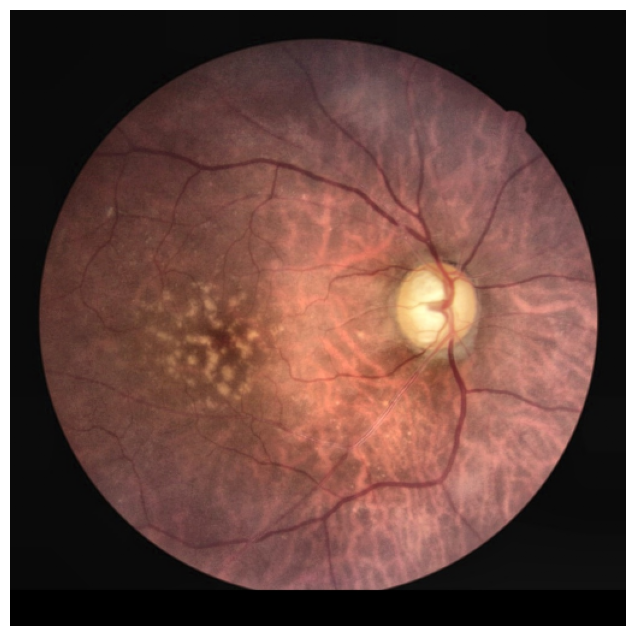

In [32]:
temp_aug_tds_xy_list= list(augmented_tds_train_xy.as_numpy_iterator())
# take batch in #
x,y = temp_aug_tds_xy_list[0]
plot_rgb_img(x[0])

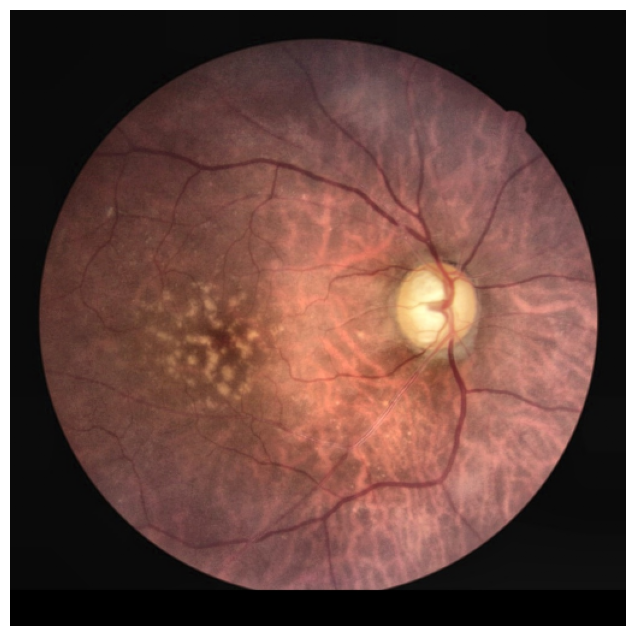

In [33]:
temp_aug_tds_xy_list= list(augmented_tds_train_xy.as_numpy_iterator())
# take batch in #
x,y = temp_aug_tds_xy_list[0]
plot_rgb_img(x[0])

#### (2) try add Augmentation to the tfds

In [34]:
# # the GPT help code #
# def augment_image(image, rotation_prob=0.5, flip_prob=0.5, zoom_prob=0.5):
#     """Make sure the image is single or batch, if batch need to it iteration for all images.
#         or just use tf.layers. to to the batch processing."""
    
# #     tf.image.adjust_saturation(image, 3)
# #     tf.image.adjust_brightness(image, 0.4)
    
    
# #     # Rotate the image randomly with probability rotation_prob
# #     if tf.random.uniform([], minval=0, maxval=1) < rotation_prob:
# #         image = tf.keras.preprocessing.image.random_rotation(image, 15, row_axis=0, col_axis=1, channel_axis=2)

# #     # Flip the image randomly horizontally or vertically with probability flip_prob
# #     if tf.random.uniform([], minval=0, maxval=1) < flip_prob:
# #         image = tf.image.flip_left_right(image)

#     # Zoom the image randomly by up to 20% with probability zoom_prob
#     if tf.random.uniform([], minval=0, maxval=1) < zoom_prob:
# #         zoom_range = (0.8, 1.2)
#         crop_size = [BATCH_SIZE, img_size - 100, img_size - 100, 3]
#         image = tf.image.random_crop(image, crop_size)
#         image = tf.image.resize(image, [img_size, img_size])

#     return image


In [35]:
# augmented_tds_train_xy = (tds_train_xy.shuffle(buffer_size=tds_im_train.cardinality().numpy(),reshuffle_each_iteration=True)
#                                     .batch(BATCH_SIZE)
#                                     .map(lambda x, y: (augment_image(x, rotation_prob=0.5, flip_prob=0.5, zoom_prob=0.5), y))
#                                     .prefetch(buffer_size=AUTOTUNE))

# augmented_tds_train_xy = tds_train_xy.batch(BATCH_SIZE).map(lambda x, y: (augment_image(x, rotation_prob=0.5, flip_prob=0.5, zoom_prob=1), y), num_parallel_calls=AUTOTUNE)


In [36]:
augmented_tds_train_xy.cardinality().numpy()

31

In [37]:
augmented_tds_train_xy.element_spec

(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 52), dtype=tf.int64, name=None))

In [38]:
tf.data.DatasetSpec.from_value(augmented_tds_train_xy)


DatasetSpec((TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 52), dtype=tf.int64, name=None)), TensorShape([]))

## Add cache for OOM

In [39]:
# in above section

In [40]:
# Augment the images in the dataset with specified probabilities
# augmented_tds_train_xy = tds_train_xy.map(lambda x, y: (augment_image(x, rotation_prob=0.5, flip_prob=0.5, zoom_prob=0.5), y))


## list(tf.ds) just for show the image of ds

In [41]:
temp_aug_tds_xy_list= list(augmented_tds_train_xy.as_numpy_iterator())
print("batchs: ", len(temp_aug_tds_xy_list))

batchs:  31


In [42]:
np.asarray(temp_aug_tds_xy_list, dtype=object).shape

(31, 2)

In [43]:
np.shape(temp_aug_tds_xy_list)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(31, 2)

In [44]:
temp_aug_tds_xy_list[0][0].shape # seem only one image not the 32 in batch

(8, 512, 512, 3)

In [45]:
temp_aug_tds_xy_list[0][1].shape # however, FV has batch 32

(8, 52)

In [46]:
# take batch in #
x,y = temp_aug_tds_xy_list[0]

In [47]:
x.dtype

dtype('float32')

In [48]:
y.dtype

dtype('int64')

In [49]:
x.shape

(8, 512, 512, 3)

In [50]:
y.shape

(8, 52)

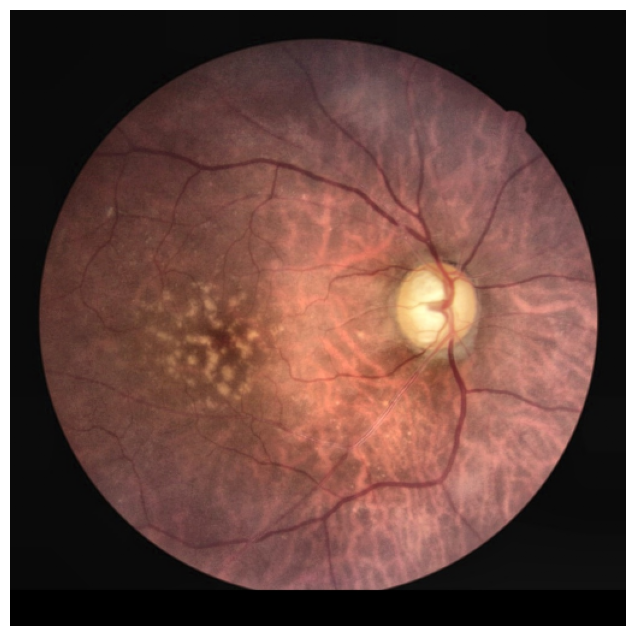

In [51]:
plot_rgb_img(x[0])

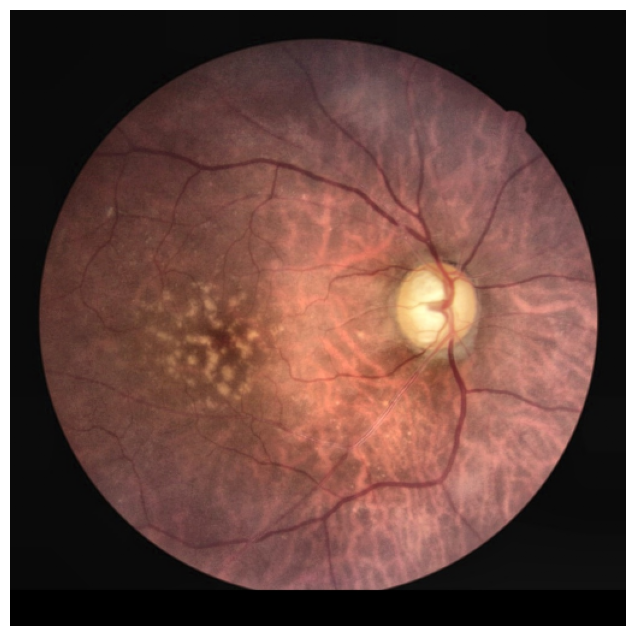

In [52]:
plot_rgb_img(temp_aug_tds_xy_list[0][0][0]) # just only one image in batch not the 32

In [53]:
y

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  3,  0,  0,  0, 25, 25,
         0, 12,  0,  4,  0,  0, 27, 30, 23, 20,  0,  4,  0, 26, 24, 18,
         0,  0, 22, 22],
       [27, 21, 27, 26, 28, 28, 27, 29, 29, 25, 30, 29, 26, 27, 29, 30,
        27, 26, 28, 18, 30, 30, 28, 28, 29, 25, 25,  0, 30, 32, 32, 30,
        27, 26, 26, 28, 29, 30, 31, 29, 27, 23, 28, 29, 29, 28, 29, 27,
        29, 26, 27, 27],
       [24, 23, 26, 26, 24, 27, 26, 28, 27, 25, 25, 28, 28, 30, 29, 27,
        22, 21, 24, 28, 30, 31,  7,  9, 24, 26, 17, 26, 21, 22, 30,  0,
         0, 23, 13, 20, 17, 27, 26, 25,  1, 23, 16, 16, 27, 27, 27, 26,
        20, 23, 26, 26],
       [ 0, 14, 13, 13,  0,  0,  0, 22, 26, 28,  0,  0,  0,  0, 22, 23,
        26, 28,  0,  0,  0, 26, 27, 27, 10, 26,  0,  0,  0, 28, 28, 26,
         0, 26,  3,  3, 21, 25, 27, 26, 27, 24, 17, 24, 26, 26, 29, 28,
        24, 23, 27, 27],
       [21, 19, 23, 20, 25, 23, 23, 

#### Checking

In [54]:
!ls /home/u3148947/data/PACG_data_20221005/POACG_crop/1084274jpg

ls: cannot access '/home/u3148947/data/PACG_data_20221005/POACG_crop/1084274jpg': No such file or directory


In [55]:
!ls -la /home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0409018.jpg

-rw-r--r-- 1 u3148947 TRI108216 199625 Sep  8  2022 /home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0409018.jpg


In [56]:
# check point normaization
0/94 - 0.5

-0.5

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  0,  0,  3,  0,  0,  0, 25, 25,  0, 12,
        0,  4,  0,  0, 27, 30, 23, 20,  0,  4,  0, 26, 24, 18,  0,  0, 22,
       22])

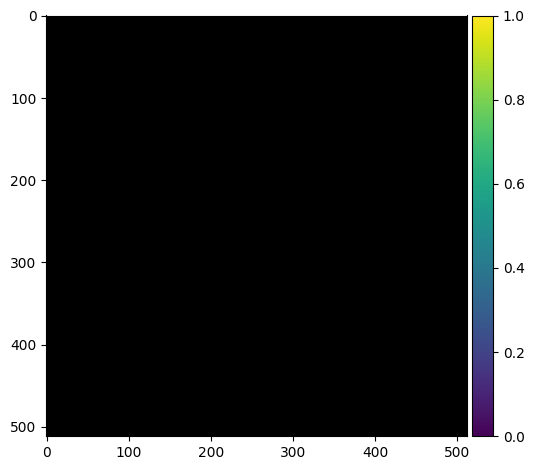

In [57]:
# Example of data

from skimage.io import imshow as skimshow

# PACG image
skimshow(imgs_train[0].astype('uint8'))
# PACG fv
points_train[0]

### Visualize data

Let's prepare a function to visualize points on image. Such function obtains two arguments: an image and a vector of points' coordinates and draws points on image (just like first image in this notebook).

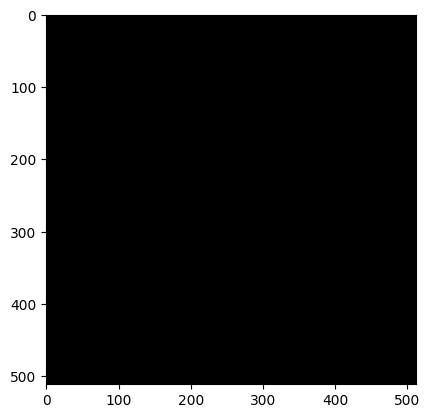

In [58]:
def visualize_points(img, points):
    plt.figure()
    plt.imshow(img)
    cols,rows,_ = img.shape
    patches=[]
    r=0.4
    fig = plt.gcf()
    ax = fig.gca()
    for i in range(14):
        ax.add_artist((Circle(((points[2*i]+0.5)*cols, (points[2*i+1]+0.5)*rows), r, color='r')))
    
# visualize_points(imgs[1], points[1])
visualize_points(imgs_train[1].astype('uint8'), points_train[1])

In [59]:
def visualize_points1(img, points,j):
    plt.figure()
    plt.imshow(img)
    cols,rows,_ = img.shape
    patches=[]
    r=0.4
    fig = plt.gcf()
    ax = fig.gca()
    for i in range(j,j+1):
        ax.add_artist((Circle(((points[2*i]+0.5)*cols, (points[2*i+1]+0.5)*rows), r, color='r')))
        


### Train/val split

Run the following code to obtain train/validation split for training neural network.

In [60]:
# # comment ! IF use fixed val_list

# from sklearn.model_selection import train_test_split
# imgs_train, imgs_val, points_train, points_val = train_test_split(imgs, points, random_state=42, test_size=0.1)

### Simple data augmentation

For better training we will use simple data augmentation — flipping an image and points. Implement function flip_img which flips an image and its' points. Make sure that points are flipped correctly! For instance, points on right eye now should be points on left eye (i.e. you have to mirror coordinates and swap corresponding points on the left and right sides of the face). VIsualize an example of original and flipped image.

For correct NN training, the augmented photos should have the facial keypoints listed in the same order. The 14 keypoints are present in the original dataset in the below order. When the image is flipped, we need to invert the x-coordinate of the point, as well as place in on the opposite side of the face. 

0: left eyebrow, outer

1: left eyebrow, inner

2: right eyebrow, inner

3: right eyebrow, outer

4: left eye, outer

5: left eye, center

6: left eye, inner

7: right eye, inner

8: right eye, center

9: right eye, outer

10: nose center

11: mouth, left

12: mouth, center 

13: mouth, right

In [61]:
len(imgs_train)

244

In [62]:
len(imgs_val)

27

### this x.y location flip is not working for FV-value, SO WE SKIP THIS AUG.

    array([17, 13, 10,  5, 22, 25, 21, 17, 18,  8, 16, 23, 23, 11,  2, 18, 20,
       21, 18, 20, 25,  0,  7,  0, 22, 29, 24, 26, 28, 28, 29, 27,  0, 25,
       26, 29, 29, 29, 28, 26, 25, 24, 25, 26, 26, 25, 28, 30, 28, 26, 26,
       24])
       
       to
       
       array([-21.,  17., -22.,  25., -10.,   5., -17.,  13., -18.,  20., -20.,
        21.,  -2.,  18., -23.,  11., -16.,  23., -18.,   8., -25.,   0.,
       -24.,  26., -22.,  29.,  -7.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])


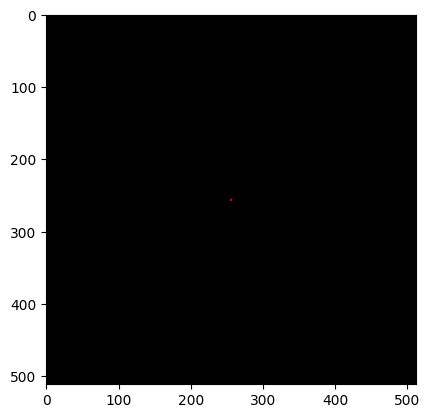

In [63]:
def flip_img(img, points):
    img_flip = img[:, ::-1]
    points_flip = np.zeros(points.shape)
    flip_indices = [3,2,1,0,9,8,7,6,5,4,10,13,12,11]
    for i in range(14):
        points_flip[2*i] = -points[2*flip_indices[i]]
        points_flip[2*i+1] = points[2*flip_indices[i]+1]
    return img_flip, points_flip

# f_img, f_points = flip_img(imgs[6], points[6])
f_img, f_points = flip_img(imgs_train[6], points_train[6])
visualize_points(f_img.astype('uint8'), f_points)

In [64]:
f_points

array([-11.,   6.,   0.,   7.,   0.,   0.,   0.,   0., -16.,  18., -21.,
        19., -25.,  22., -19.,  18.,  -2.,  18., -20.,  16., -26.,  29.,
       -16.,   0., -24.,  20., -28.,  26.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

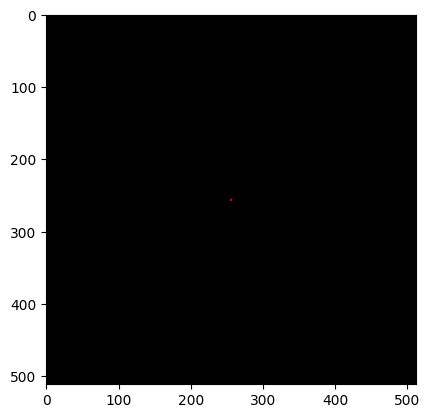

In [65]:
visualize_points(imgs_train[6].astype('uint8'), points_train[6])

In [66]:
points_train[6]

array([ 0,  0,  0,  0,  0,  7, 11,  6, 20, 16,  2, 18, 19, 18, 25, 22, 21,
       19, 16, 18, 26, 29, 28, 26, 24, 20, 16,  0, 27, 30, 28, 28, 24, 23,
       14, 24, 26, 28, 29, 28, 23, 14, 22, 26, 25, 23, 18, 17, 24, 25, 21,
        9])

Time to augment our training sample. Apply flip to every image in training sample. As a result you should obtain two arrays: `aug_imgs_train` and `aug_points_train` which contain original images and points along with flipped ones.

In [67]:
aug_imgs_train = []
aug_points_train = []

for i in range(imgs_train.shape[0]):
    img_flip, points_flip = flip_img(imgs_train[i],points_train[i])
    aug_imgs_train.append(imgs_train[i])
    aug_imgs_train.append(img_flip)
    aug_points_train.append(points_train[i])
    aug_points_train.append(points_flip)

aug_imgs_train = np.array(aug_imgs_train)
aug_points_train = np.array(aug_points_train)
print(imgs_train.shape, points_train.shape)
print(aug_imgs_train.shape, aug_points_train.shape)

(244, 512, 512, 3) (244, 52)
(488, 512, 512, 3) (488, 52)


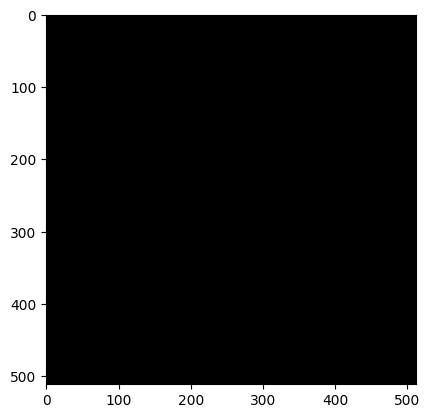

In [68]:
visualize_points1(aug_imgs_train[5].astype('uint8'), aug_points_train[5],1)

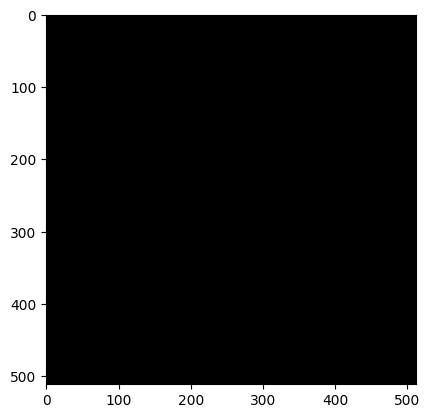

In [69]:
visualize_points1(aug_imgs_train[4].astype('uint8'), aug_points_train[4],1)

#### Learning rate

In [70]:
# Sets up a timestamped log directory.
log_dir = 'PACG/train_log/' + datetime.now().strftime("%Y%m%d-%H%M%S")

CPU times: user 262 ms, sys: 14.9 ms, total: 277 ms
Wall time: 257 ms


Text(0, 0, '0.0000009867')

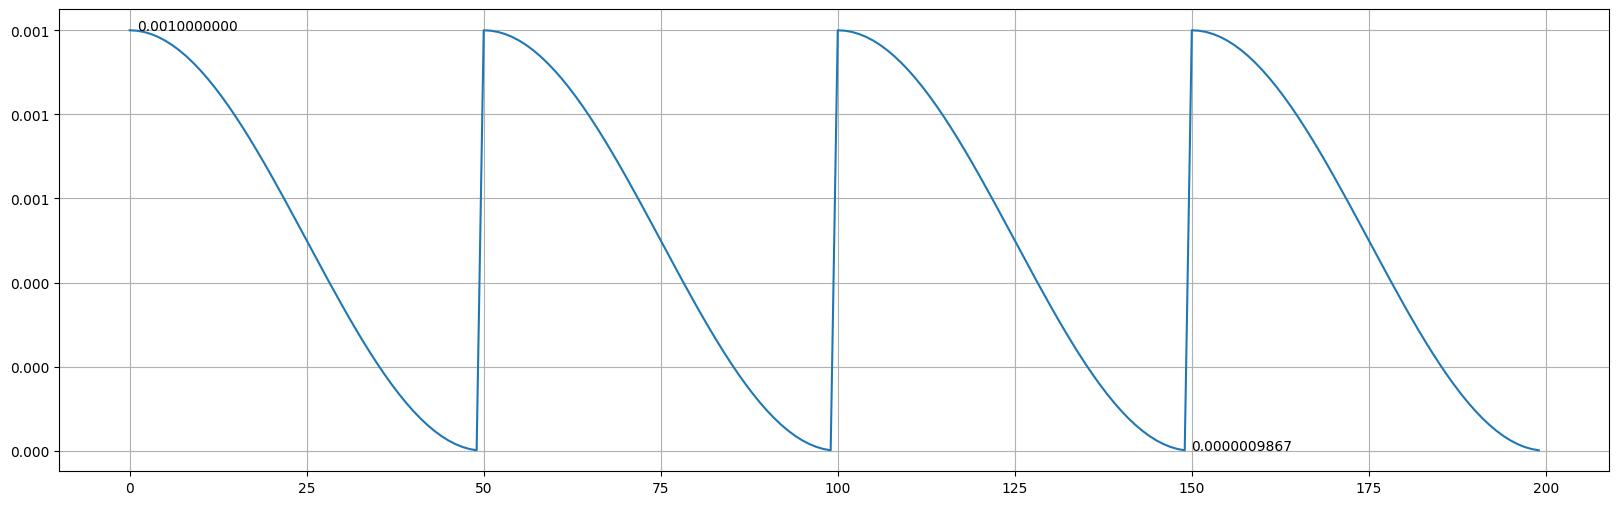

In [71]:
%%time
"""
cosine_decay_restarts是cosine_decay的cycle版本。
first_decay_steps是指第一次完全下降的step數，
t_mul是指每一次循環的步數都將乘以t_mul倍，
m_mul指每一次循環重新開始時的初始lr是上一次循環初始值的m_mul倍。
alpha
"""

from matplotlib.ticker import FormatStrFormatter



ep_num = 1000



def CosineDecayCLRWarmUpLSW_2(epoch):
    
#     #step_size = 25 # currently best for foot pp
#     max_lr = 1e-4 #1e-2 # currently best for foot pp
#     base_lr = 1e-6# 1e-6 1e-7

#     # warm up
#     lr_init_ep = 1e-3 # 1e-3 = 0.001
#     lr_ramp_ep = 10
#     lr_sus_ep  = 0
#     #lr_decay   = 0.8


    initial_learning_rate = 1e-3 # 1e-2 = 0.02
    first_decay_steps = 50


    lr_decayed_fn = (
      tf.keras.experimental.CosineDecayRestarts(
          initial_learning_rate,
          first_decay_steps,
          t_mul=1,
          m_mul=1,
          alpha = 0.0000001,
          name="CCosineDecayRestarts"))
    
#     # warm up
#     if epoch < lr_ramp_ep:
#         lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr    
#     else:
#         lr = lr_decayed_fn(epoch-lr_ramp_ep)
#     return lr
    return lr_decayed_fn(epoch)



rng = [i for i in range(200)]
y = [CosineDecayCLRWarmUpLSW_2(x) for x in rng]
# print(y)

# sns.set(style='darkgrid') # Remove this seting sns的風格無法控制 使用matplotlib本身的功能#
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))# for too small loss
ax.grid() # Enabling grid lines
plt.plot(rng, y)
plt.annotate(f'{y[0]:.10f}', xy=(0.05, 0.001), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate(f'{y[-1]:.10f}', xy=(0.73, 0), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

In [72]:
np.max(y)

0.001

In [73]:
np.min(y)

9.867356e-07

CPU times: user 175 ms, sys: 2.18 ms, total: 178 ms
Wall time: 164 ms


Text(0, 0, '0.0000009867')

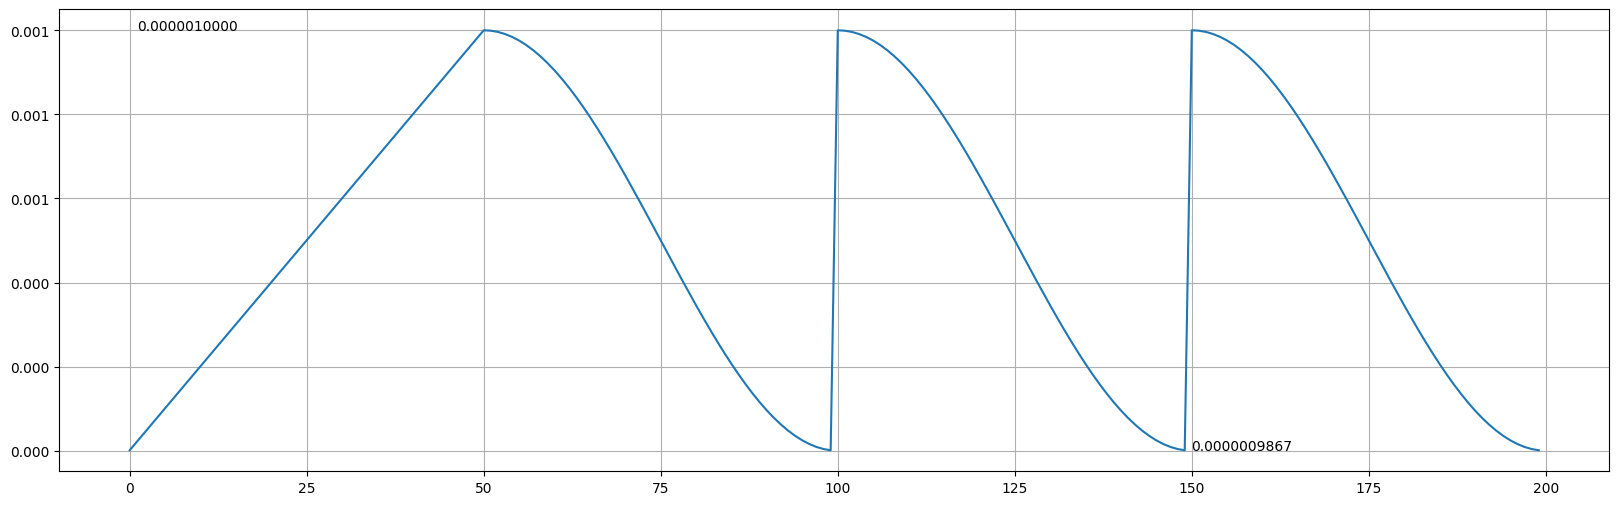

In [74]:
%%time
"""
cosine_decay_restarts是cosine_decay的cycle版本。
first_decay_steps是指第一次完全下降的step數，
t_mul是指每一次循環的步數都將乘以t_mul倍，
m_mul指每一次循環重新開始時的初始lr是上一次循環初始值的m_mul倍。
alpha
"""

from matplotlib.ticker import FormatStrFormatter



ep_num = 1000



def CosineDecayCLRWarmUpLSW_3_warmup(epoch):
    
    #step_size = 25 # currently best for foot pp
    max_lr = 1e-3 #1e-2 # currently best for foot pp
    base_lr = 1e-6# 1e-6 1e-7

    # warm up
    lr_init_ep = 1e-3 # 1e-3 = 0.001
    lr_ramp_ep = 50
    lr_sus_ep  = 0
    #lr_decay   = 0.8


    initial_learning_rate = 1e-3 # 1e-2 = 0.02
    first_decay_steps = 50


    lr_decayed_fn = (
      tf.keras.experimental.CosineDecayRestarts(
          initial_learning_rate,
          first_decay_steps,
          t_mul=1,
          m_mul=1,
          alpha = 0.0000001,
          name="CCosineDecayRestarts"))
    
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr    
    else:
        lr = lr_decayed_fn(epoch-lr_ramp_ep)
    return lr
#     return lr_decayed_fn(epoch)



rng = [i for i in range(200)]
y = [CosineDecayCLRWarmUpLSW_3_warmup(x) for x in rng]
# print(y)

# sns.set(style='darkgrid') # Remove this seting sns的風格無法控制 使用matplotlib本身的功能#
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))# for too small loss
ax.grid() # Enabling grid lines
plt.plot(rng, y)
plt.annotate(f'{y[0]:.10f}', xy=(0.05, 0.001), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate(f'{y[-1]:.10f}', xy=(0.73, 0), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

In [75]:
# y

In [76]:
y[0]

1e-06

In [77]:
np.max(y)

0.0010000000474974513

In [78]:
np.min(y)

9.867355856840732e-07

In [79]:
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=5, min_lr=0.001)


In [80]:
# # 取得目前的風格
# sns.axes_style()

In [81]:
# # 還原成初始風格
# sns.reset_orig()
# .reset_defaults()

In [82]:
# Callback for printing the LR at the end of each epoch.
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
#     def on_epoch_end(self, epoch, logs=None):
#         print('\n[{}] Learning rate for epoch {} is {}'.format(
#             datetime.now().strftime("%Y%m%d-%H%M-%S"), 
#             epoch + 1,
#             self.model.optimizer.lr.numpy()))
        print('\n[{}] Learning rate for epoch {} is {}'.format(
        datetime.now().strftime("%Y%m%d-%H%M-%S"), 
        epoch + 1,
        model.optimizer._decayed_lr(tf.float32).numpy()))
    
        # log to tensorboard logdir #
        """_decayed_lr this fun is dispatched!"""
        tf.summary.scalar('learning rate', data=model.optimizer._decayed_lr(tf.float32).numpy(), step=epoch)
        
file_writer = tf.summary.create_file_writer(log_dir + "/lr")
file_writer.set_as_default()

### Network architecture and training

Now let's define neural network regressor. It will have 28 outputs, 2 numbers per point. The precise architecture is up to you. We recommend to add 2-3 (`Conv2D` + `MaxPooling2D`) pairs, then `Flatten` and 2-3 `Dense` layers. Don't forget about ReLU activations. We also recommend to add `Dropout` to every `Dense` layer (with p from 0.2 to 0.5) to prevent overfitting.


In [83]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.layers.advanced_activations import LeakyReLU
# from keras.initializers import glorot_uniform


# chage to tf.keras.layers. and tf.keras.layers.advanced_activations. tf.keras.initializers.

# model = tf.keras.Sequential(name="KPR-model101")

# model.add(tf.keras.layers.Conv2D(16, (3,3), input_shape=(img_size, img_size, 3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(32, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(64, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))  

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

# model.add(tf.keras.layers.Dropout(0.5)) 

# model.add(tf.keras.layers.Dense(64,kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0))

# model.add(tf.keras.layers.Dense(52,kernel_initializer=tf.keras.initializers.glorot_uniform())) #28 -> 52


In [84]:
# model = tf.keras.Sequential(name="KPR-model102")

# model.add(tf.keras.layers.Conv2D(16, (3,3), input_shape=(img_size, img_size, 3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(32, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(64, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))  

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512,kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

# model.add(tf.keras.layers.Dropout(0.5)) 

# model.add(tf.keras.layers.Dense(256,kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0))

# model.add(tf.keras.layers.Dense(52,kernel_initializer=tf.keras.initializers.glorot_uniform())) #28 -> 52

In [85]:
# NUM_KEYPOINTS = 52
# IMG_SIZE = img_size

# def get_model():
#     """mobilenet_v2
#     Node: 'mean_squared_error/SquaredDifference'
#     Incompatible shapes: [8,10,10,52] vs. [8,52]"""
#     # Load the pre-trained weights of MobileNetV2 and freeze the weights
#     backbone = tf.keras.applications.MobileNetV2(
#         weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
#     )
#     backbone.trainable = False

#     inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
#     x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
#     x = backbone(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
#     )(x)
#     outputs = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
#     )(x)

#     return tf.keras.Model(inputs, outputs, name="keypoint_detector")

# model = get_model()




# # # 0408 somehow make input as 224 will output same as 1 1 52 but cannot learn not thing
# # def get_model():
# #     # Load the pre-trained weights of MobileNetV2 and freeze the weights
# #     backbone = tf.keras.applications.MobileNetV2(
# #         weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
# #     )
# #     backbone.trainable = False

# #     inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
# #     x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
# #     x = backbone(x)
# #     x = tf.keras.layers.Dropout(0.3)(x)
# #     x = tf.keras.layers.SeparableConv2D(
# #         NUM_KEYPOINTS, kernel_size=24, strides=1, activation="relu"
# #     )(x)
# #     outputs = tf.keras.layers.SeparableConv2D(
# #         NUM_KEYPOINTS, kernel_size=24, strides=1, activation="sigmoid"
# #     )(x)

# #     return tf.keras.Model(inputs, outputs, name="keypoint_detector")


# def get_model():
#     # Load the pre-trained weights of MobileNetV2 and freeze the weights
#     backbone = tf.keras.applications.DenseNet201(
#         weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
#     )
#     backbone.trainable = False

#     inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
#     x = tf.keras.applications.densenet.preprocess_input(inputs)
#     x = backbone(x)
    
#     # Keep this block have little better lean.
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
#     )(x)
#     outputs = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
#     )(x)
    
#     # For fix the final output shape is (32, 26, 26, 52) not same as (batch, 52)
#     outputs = tf.keras.layers.Flatten()(outputs)
#     #"""
#     #Faltten seems enough to pass to outpu dense
#     outputs = tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
#     outputs = tf.keras.layers.LeakyReLU(alpha=0.1)(outputs)
#     #"""

#     outputs = tf.keras.layers.Dense(NUM_KEYPOINTS,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    
#     return tf.keras.Model(inputs, outputs, name="KPR-DeseNet200-kerasApp")

# model = get_model()

In [86]:
# """Desnenet-002
# remove the Dropout SeparableConv2D SeparableConv2D and dense after the Flatten layer.
# """
# def get_model():
#     # Load the pre-trained weights of MobileNetV2 and freeze the weights
#     backbone = tf.keras.applications.DenseNet201(
#         weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
#     )
#     backbone.trainable = False

#     inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
#     x = tf.keras.applications.densenet.preprocess_input(inputs)
#     x = backbone(x)
    
#     # Keep this block have little better lean.
# #     x = tf.keras.layers.Dropout(0.3)(x)
# #     x = tf.keras.layers.SeparableConv2D(
# #         NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
# #     )(x)
# #     outputs = tf.keras.layers.SeparableConv2D(
# #         NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
# #     )(x)
    
    
#     # For fix the final output shape is (32, 26, 26, 52) not same as (batch, 52)
#     outputs = tf.keras.layers.Flatten()(x)
#     """
#     Faltten seems enough to pass to outpu dense
#     #outputs = tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
#     #outputs = tf.keras.layers.LeakyReLU(alpha=0.1)(outputs)
#     """
#     outputs = tf.keras.layers.Dense(NUM_KEYPOINTS,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    
#     return tf.keras.Model(inputs, outputs, name="KPR-DeseNet200-kerasApp-002")

# model = get_model()

In [87]:
# 20230410 #
"""
What if not to use classification output of model but the only to get feature vectors from images.
"""



'\nWhat if not to use classification output of model but the only to get feature vectors from images.\n'

### 2023-06-12 backbone.trainable = True

In [88]:
# NUM_KEYPOINTS = 52
# IMG_SIZE = img_size

# def get_model():
#     # Load the pre-trained weights of MobileNetV2 and freeze the weights
#     backbone = tf.keras.applications.DenseNet201(
#         weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
#     )
#     backbone.trainable = True # 20230612

#     inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
#     x = tf.keras.applications.densenet.preprocess_input(inputs)
#     x = backbone(x)
    
#     # Keep this block have little better lean.
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
#     )(x)
#     outputs = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
#     )(x)
    
#     # For fix the final output shape is (32, 26, 26, 52) not same as (batch, 52)
#     outputs = tf.keras.layers.Flatten()(outputs)
#     #"""
#     #Faltten seems enough to pass to outpu dense (is it breaking the orderering of 52 value?)
#     outputs = tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
#     outputs = tf.keras.layers.LeakyReLU(alpha=0.1)(outputs)
#     #"""

#     outputs = tf.keras.layers.Dense(NUM_KEYPOINTS,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    
#     return tf.keras.Model(inputs, outputs, name="KPR-DeseNet200-kerasApp")

# model = get_model()

## 2023-09-02 

    TF HUB
    
    

In [89]:
# import tensorflow_hub as hub

In [90]:
# model_name = "efficientnetv2-xl-21k" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

# model_handle_map = {
#   "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
#   "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
#   "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
#   "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
#   "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
#   "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
#   "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
#   "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
#   "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
#   "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
#   "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
#   "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
#   "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
#   "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
#   "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
#   "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
#   "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
#   "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
#   "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
#   "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
#   "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
#   "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
#   "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
#   "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
#   "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
#   "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
#   "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
#   "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
#   "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
#   "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
#   "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
#   "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
#   "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
#   "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
#   "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
#   "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
#   "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
#   "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
#   "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
#   "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
#   "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
#   "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
#   "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
#   "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
#   "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
#   "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
#   "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
#   "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
#   "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
#   "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
# }

# model_image_size_map = {
#   "efficientnetv2-s": 384,
#   "efficientnetv2-m": 480,
#   "efficientnetv2-l": 480,
#   "efficientnetv2-b0": 224,
#   "efficientnetv2-b1": 240,
#   "efficientnetv2-b2": 260,
#   "efficientnetv2-b3": 300,
#   "efficientnetv2-s-21k": 384,
#   "efficientnetv2-m-21k": 480,
#   "efficientnetv2-l-21k": 480,
#   "efficientnetv2-xl-21k": 512,
#   "efficientnetv2-b0-21k": 224,
#   "efficientnetv2-b1-21k": 240,
#   "efficientnetv2-b2-21k": 260,
#   "efficientnetv2-b3-21k": 300,
#   "efficientnetv2-s-21k-ft1k": 384,
#   "efficientnetv2-m-21k-ft1k": 480,
#   "efficientnetv2-l-21k-ft1k": 480,
#   "efficientnetv2-xl-21k-ft1k": 512,
#   "efficientnetv2-b0-21k-ft1k": 224,
#   "efficientnetv2-b1-21k-ft1k": 240,
#   "efficientnetv2-b2-21k-ft1k": 260,
#   "efficientnetv2-b3-21k-ft1k": 300, 
#   "efficientnet_b0": 224,
#   "efficientnet_b1": 240,
#   "efficientnet_b2": 260,
#   "efficientnet_b3": 300,
#   "efficientnet_b4": 380,
#   "efficientnet_b5": 456,
#   "efficientnet_b6": 528,
#   "efficientnet_b7": 600,
#   "inception_v3": 299,
#   "inception_resnet_v2": 299,
#   "nasnet_large": 331,
#   "pnasnet_large": 331,
# }

# model_handle = model_handle_map.get(model_name)
# pixels = model_image_size_map.get(model_name, 224)

# print(f"Selected model: {model_name} : {model_handle}")

# IMAGE_SIZE = (pixels, pixels)
# print(f"Input size {IMAGE_SIZE}")

# # BATCH_SIZE = 16 # we have set BATCH_SIZE = 8, already.

In [91]:
# NUM_KEYPOINTS = 52
# IMG_SIZE = img_size

# do_fine_tuning = False
# # do_fine_tuning = True


# print("Building model with", model_handle)
# model = tf.keras.Sequential([
#     # Explicitly define the input shape so the model can be properly
#     # loaded by the TFLiteConverter
#     tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
#     hub.KerasLayer(model_handle, trainable=do_fine_tuning),
#     tf.keras.layers.Dropout(rate=0.2),
#     tf.keras.layers.Dense(NUM_KEYPOINTS,
#                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
# ], name="efnv2xl-fine_tune")
# model.build((None,)+IMAGE_SIZE+(3,))
# model.summary()

## 2023-06-26

* 重訓一個 sequence model for GradCAM
* EfficientNetV2B0

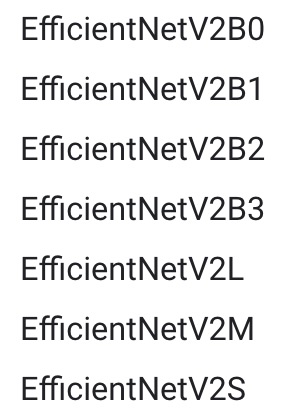

* 2023-11-08 但此efnv2B0_fine_tune模型性能略差，再重訓等級較高的v2版本，如B4
*

In [92]:
NUM_KEYPOINTS = 52
IMG_SIZE = (img_size, img_size) 

# do_fine_tuning = False   
do_fine_tuning = True


IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
                                               input_shape=IMG_SHAPE,
                                               include_top=False,
                                               include_preprocessing=True, # include_preprocessing在(False)停用預處理的情況下，EfficientNetV2 模型期望其輸入是值在 [-1, 1] 範圍內的像素的浮點張量。
                                                                           # include_preprocessing在(True)，模型期望其輸入是值在 [0-255]
                                               weights='imagenet')

base_model.trainable = do_fine_tuning

# SHIT we should add linear activation function for Regression model!!!

* layers.Dense(1) : A linear Dense single-output layer.
* so, no any activaction function is the linear output!!
* if use tf.keras.activations.linear(    x) : It just a Linear activation function (pass-through).

In [93]:
gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
outputs = tf.keras.layers.Dense(NUM_KEYPOINTS)(gap2d) # no any activaction function is the linear output!!

model = tf.keras.Model(base_model.input, outputs, name='EFNv2B0-PACG-FV52-normalize01only-finetune')

In [94]:
# model Visualization

# from tf.keras.utils import plot_model
# tf.keras.utils.plot_model(model, to_file='KPR-model-kerasApp_1005.png')

In [95]:
model.summary()

Model: "EFNv2B0-PACG-FV52-normalize01only-finetune"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 512, 512, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 512, 512, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 256, 256, 32)        

    Building model with https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
    Model: "efnv2xl-fine_tune"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     keras_layer (KerasLayer)    (None, 1280)              207615832 

     dropout (Dropout)           (None, 1280)              0         

     dense (Dense)               (None, 52)                66612     

    =================================================================
    Total params: 207,682,444
    Trainable params: 206,905,420
    Non-trainable params: 777,024
    _________________________________________________________________


    Model: "KPR-model-kerasApp"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_6 (InputLayer)         [(None, 1024, 1024, 3)]   0         
    _________________________________________________________________
    tf.math.truediv_4 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.nn.bias_add_2 (TFOpLambda (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.math.truediv_5 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    densenet201 (Functional)     (None, 32, 32, 1920)      18321984  
    _________________________________________________________________
    dropout_6 (Dropout)          (None, 32, 32, 1920)      0         
    _________________________________________________________________
    separable_conv2d_4 (Separabl (None, 28, 28, 52)        147892    
    _________________________________________________________________
    separable_conv2d_5 (Separabl (None, 26, 26, 52)        3224      
    =================================================================
    Total params: 18,473,100
    Trainable params: 151,116
    Non-trainable params: 18,321,984
    _________________________________________________________________



    Model: "KPR-model-kerasApp"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_2 (InputLayer)         [(None, 1024, 1024, 3)]   0         
    _________________________________________________________________
    tf.math.truediv (TFOpLambda) (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.nn.bias_add (TFOpLambda)  (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.math.truediv_1 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    densenet201 (Functional)     (None, 32, 32, 1920)      18321984  
    _________________________________________________________________
    dropout_4 (Dropout)          (None, 32, 32, 1920)      0         
    _________________________________________________________________
    separable_conv2d (SeparableC (None, 28, 28, 52)        147892    
    _________________________________________________________________
    separable_conv2d_1 (Separabl (None, 26, 26, 52)        3224      
    _________________________________________________________________
    flatten_1 (Flatten)          (None, 35152)             0         
    _________________________________________________________________
    dense_3 (Dense)              (None, 128)               4499584   
    _________________________________________________________________
    leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
    _________________________________________________________________
    dense_4 (Dense)              (None, 52)                6708      
    =================================================================
    Total params: 22,979,392
    Trainable params: 4,657,408
    Non-trainable params: 18,321,984
    _________________________________________________________________


    Model: "KPR-model101"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_12 (Conv2D)           (None, 1024, 1024, 16)    448       
    _________________________________________________________________
    leaky_re_lu_20 (LeakyReLU)   (None, 1024, 1024, 16)    0         
    _________________________________________________________________
    max_pooling2d_12 (MaxPooling (None, 512, 512, 16)      0         
    _________________________________________________________________
    dropout_25 (Dropout)         (None, 512, 512, 16)      0         
    _________________________________________________________________
    conv2d_13 (Conv2D)           (None, 512, 512, 32)      4640      
    _________________________________________________________________
    leaky_re_lu_21 (LeakyReLU)   (None, 512, 512, 32)      0         
    _________________________________________________________________
    max_pooling2d_13 (MaxPooling (None, 256, 256, 32)      0         
    _________________________________________________________________
    dropout_26 (Dropout)         (None, 256, 256, 32)      0         
    _________________________________________________________________
    conv2d_14 (Conv2D)           (None, 256, 256, 64)      18496     
    _________________________________________________________________
    leaky_re_lu_22 (LeakyReLU)   (None, 256, 256, 64)      0         
    _________________________________________________________________
    max_pooling2d_14 (MaxPooling (None, 128, 128, 64)      0         
    _________________________________________________________________
    dropout_27 (Dropout)         (None, 128, 128, 64)      0         
    _________________________________________________________________
    flatten_4 (Flatten)          (None, 1048576)           0         
    _________________________________________________________________
    dense_14 (Dense)             (None, 128)               134217856 
    _________________________________________________________________
    leaky_re_lu_23 (LeakyReLU)   (None, 128)               0         
    _________________________________________________________________
    dropout_28 (Dropout)         (None, 128)               0         
    _________________________________________________________________
    dense_15 (Dense)             (None, 64)                8256      
    _________________________________________________________________
    leaky_re_lu_24 (LeakyReLU)   (None, 64)                0         
    _________________________________________________________________
    dense_16 (Dense)             (None, 52)                3380      
    =================================================================
    Total params: 134,253,076
    Trainable params: 134,253,076
    Non-trainable params: 0
    _________________________________________________________________

Time to train! Since we are training a regressor, make sure that you use mean squared error (mse) as loss. Feel free to experiment with optimization method (SGD, Adam, etc.) and its' parameters.

In [96]:
# ModelCheckpoint can be used for saving model during training.
# Saved models are useful for finetuning your model 
# See keras documentation for more info
# from tf.keras.callbacks import ModelCheckpoint
# from tf.keras.optimizers import SGD, Adam

# change to
# tf.keras.callbacks.ModelCheckpoint
# tf.keras.optimizers.SGD
# tf.keras.optimizers.Adam

# Choose optimizer, compile model and run training
# model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(), metrics=['mean_squared_error', 'mean_absolute_error', tf.keras.metrics.RootMeanSquaredError()])
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mean_squared_error', 'mean_absolute_error', tf.keras.metrics.RootMeanSquaredError()])


In [97]:

EPOCHS = 200 #20 #200

# best_model_path #
"""
best_my_model_1006_bs32_p0_e200_FixedShuffle: 20221116 seem is the best try.

example path: 
    best_model = f'ZhuYin/best_model/Zhuyin_encoder_cleanGT_nNet_ckpt/' + model_name + "_" + str(img_size) + 'x' + str(img_size) + '_' + str(MULTI_BATCH_SIZE) + '_{epoch:04}' # + {epoch} for save every best ckpt models
"""

#best_my_model_1006_bs32_p200_e200_lr_FixedShuffle_tdsNoAug
#best_my_model_1006_bs32_p200_e200_lr_FixedShuffle_tdsAug
# best_my_model_1006_bs32_p200_e200_lr_FixedShuffle_tdsAug_densenet002

# best_model = "best_my_model_20230612_bs32_reduce_lr_densenet/saved_weight" #"best_my_model_1006_bs2_p0_e200_FixedShuffle/kpg_ckpt" #"best_my_model_1006_bs32_p0_e200_FixedShuffle/kpg_ckpt" 
# best_model = "best_my_model_20230902_bs8_reduce_lr_efnv2xl/saved_weight"
# best_model = "best_my_model_20230902_bs8_reduce_lr_efnv2xl_fine_tune/saved_weight"

# heatmap best #
# best_model = "best_my_model_20231026_bs8_reduce_lr_efnv2B0_fine_tune/saved_weight"
# heatmap best + CDR3_preWarmUp #
best_model = "best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight"


# save weights only #
# save_best_model = tf.keras.callbacks.ModelCheckpoint(filepath=best_model, monitor='val_loss', save_weights_only=True, save_best_only=True, mode='auto', verbose=1)

# save to SavedModel for better reload mode #
"""[TODO] SavedModel reload model that predicting results sometime is wrong!"""
save_best_model = tf.keras.callbacks.ModelCheckpoint(filepath=best_model, monitor='val_loss', save_weights_only=False, save_best_only=True, mode='auto', verbose=1)


early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# lr_schedul = tf.keras.callbacks.LearningRateScheduler(CosineDecayCLRWarmUpLSW_2)
lr_schedul = tf.keras.callbacks.LearningRateScheduler(CosineDecayCLRWarmUpLSW_3_warmup) # 增加前置ｗａｒｍｕｐ

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-12)

callbacks=[early_stop, 
           save_best_model, 
           tensorboard_callback, 
           lr_schedul, # CosineDeacyRestart 
#            reduce_lr,  # ReduceLROnPlateau
#            PrintLR(), # teake 4~5 sec per epoch!!!! # do not use with ReduceLROnPlateau(it will print lr itself)
          ] # evl_img_callback],

# callbacks=callbacks

## Train with np dataset

In [98]:
# %%time

# hist = model.fit(
#     #aug_imgs_train, aug_points_train,          # note that: x,y flip is not work for FV-value 
#     imgs_train, points_train,
#     batch_size=BATCH_SIZE,
#     epochs=1000,#EPOCHS,
#     validation_data=(imgs_val, points_val),
#     shuffle=True, # This argument is ignored when x is a generator or an object of tf.data.Dataset.
#     verbose=1,
#     callbacks=callbacks,
# )

## Train with tfds dataset
`donot forget to batch the ds to bHWC.`

* 2023-04?? TFds train ok but result not good
* 2023-06-12 densenet + tf.ds(no aug) + trainable=True

In [99]:
%%time

hist = model.fit(
    #aug_imgs_train, aug_points_train,          # note that: x,y flip is not work for FV-value 
    augmented_tds_train_xy, # tds_train_xy,     # tds_train_xy or augmented_tds_train_xy
    #batch_size=BATCH_SIZE,                     # tfds do not use this again.
    epochs=1000,#EPOCHS,
    validation_data=tds_val_xy,
    shuffle=True, # This argument is ignored when x is a generator or an object of tf.data.Dataset.
    verbose=2,
    callbacks=callbacks,
)

Epoch 1/1000


2023-11-10 16:11:10.151501: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1014] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEFNv2B0-PACG-FV52-normalize01only-finetune/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 1: val_loss improved from inf to 630.50696, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 92s - loss: 522.8967 - mean_squared_error: 522.8967 - mean_absolute_error: 20.3877 - root_mean_squared_error: 22.8669 - val_loss: 630.5070 - val_mean_squared_error: 630.5070 - val_mean_absolute_error: 23.9125 - val_root_mean_squared_error: 25.1099 - lr: 1.0000e-06 - 92s/epoch - 3s/step
Epoch 2/1000

Epoch 2: val_loss did not improve from 630.50696
31/31 - 30s - loss: 520.0670 - mean_squared_error: 520.0670 - mean_absolute_error: 20.3288 - root_mean_squared_error: 22.8050 - val_loss: 631.0757 - val_mean_squared_error: 631.0757 - val_mean_absolute_error: 23.9223 - val_root_mean_squared_error: 25.1212 - lr: 2.0980e-05 - 30s/epoch - 977ms/step
Epoch 3/1000

Epoch 3: val_loss improved from 630.50696 to 596.07312, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 23s - loss: 509.2211 - mean_squared_error: 509.2211 - mean_absolute_error: 20.1177 - root_mean_squared_error: 22.5659 - val_loss: 596.0731 - val_mean_squared_error: 596.0731 - val_mean_absolute_error: 23.2384 - val_root_mean_squared_error: 24.4146 - lr: 4.0960e-05 - 23s/epoch - 748ms/step
Epoch 4/1000

Epoch 4: val_loss improved from 596.07312 to 522.30365, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 472.1598 - mean_squared_error: 472.1598 - mean_absolute_error: 19.4229 - root_mean_squared_error: 21.7292 - val_loss: 522.3036 - val_mean_squared_error: 522.3036 - val_mean_absolute_error: 21.7279 - val_root_mean_squared_error: 22.8540 - lr: 6.0940e-05 - 24s/epoch - 780ms/step
Epoch 5/1000

Epoch 5: val_loss improved from 522.30365 to 479.95160, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 23s - loss: 405.1255 - mean_squared_error: 405.1255 - mean_absolute_error: 18.0904 - root_mean_squared_error: 20.1277 - val_loss: 479.9516 - val_mean_squared_error: 479.9516 - val_mean_absolute_error: 20.8149 - val_root_mean_squared_error: 21.9078 - lr: 8.0920e-05 - 23s/epoch - 758ms/step
Epoch 6/1000

Epoch 6: val_loss improved from 479.95160 to 430.83667, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 331.6362 - mean_squared_error: 331.6362 - mean_absolute_error: 16.4903 - root_mean_squared_error: 18.2109 - val_loss: 430.8367 - val_mean_squared_error: 430.8367 - val_mean_absolute_error: 19.7349 - val_root_mean_squared_error: 20.7566 - lr: 1.0090e-04 - 24s/epoch - 772ms/step
Epoch 7/1000

Epoch 7: val_loss improved from 430.83667 to 381.89301, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 262.2957 - mean_squared_error: 262.2957 - mean_absolute_error: 14.7574 - root_mean_squared_error: 16.1955 - val_loss: 381.8930 - val_mean_squared_error: 381.8930 - val_mean_absolute_error: 18.5603 - val_root_mean_squared_error: 19.5421 - lr: 1.2088e-04 - 24s/epoch - 765ms/step
Epoch 8/1000

Epoch 8: val_loss improved from 381.89301 to 318.62057, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 205.1200 - mean_squared_error: 205.1200 - mean_absolute_error: 13.1345 - root_mean_squared_error: 14.3220 - val_loss: 318.6206 - val_mean_squared_error: 318.6206 - val_mean_absolute_error: 16.9105 - val_root_mean_squared_error: 17.8499 - lr: 1.4086e-04 - 24s/epoch - 782ms/step
Epoch 9/1000

Epoch 9: val_loss improved from 318.62057 to 212.95363, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 156.1675 - mean_squared_error: 156.1675 - mean_absolute_error: 11.3771 - root_mean_squared_error: 12.4967 - val_loss: 212.9536 - val_mean_squared_error: 212.9536 - val_mean_absolute_error: 13.8152 - val_root_mean_squared_error: 14.5929 - lr: 1.6084e-04 - 24s/epoch - 759ms/step
Epoch 10/1000

Epoch 10: val_loss did not improve from 212.95363
31/31 - 2s - loss: 120.7066 - mean_squared_error: 120.7066 - mean_absolute_error: 9.8511 - root_mean_squared_error: 10.9867 - val_loss: 289.9159 - val_mean_squared_error: 289.9159 - val_mean_absolute_error: 16.1586 - val_root_mean_squared_error: 17.0269 - lr: 1.8082e-04 - 2s/epoch - 75ms/step
Epoch 11/1000

Epoch 11: val_loss improved from 212.95363 to 189.97731, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 95.7408 - mean_squared_error: 95.7408 - mean_absolute_error: 8.6679 - root_mean_squared_error: 9.7847 - val_loss: 189.9773 - val_mean_squared_error: 189.9773 - val_mean_absolute_error: 12.8882 - val_root_mean_squared_error: 13.7832 - lr: 2.0080e-04 - 24s/epoch - 774ms/step
Epoch 12/1000

Epoch 12: val_loss improved from 189.97731 to 171.27403, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 81.7363 - mean_squared_error: 81.7363 - mean_absolute_error: 7.6990 - root_mean_squared_error: 9.0408 - val_loss: 171.2740 - val_mean_squared_error: 171.2740 - val_mean_absolute_error: 12.3902 - val_root_mean_squared_error: 13.0872 - lr: 2.2078e-04 - 24s/epoch - 772ms/step
Epoch 13/1000

Epoch 13: val_loss improved from 171.27403 to 88.42201, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 25s - loss: 72.6343 - mean_squared_error: 72.6343 - mean_absolute_error: 7.0444 - root_mean_squared_error: 8.5226 - val_loss: 88.4220 - val_mean_squared_error: 88.4220 - val_mean_absolute_error: 8.6050 - val_root_mean_squared_error: 9.4033 - lr: 2.4076e-04 - 25s/epoch - 793ms/step
Epoch 14/1000

Epoch 14: val_loss did not improve from 88.42201
31/31 - 2s - loss: 65.0394 - mean_squared_error: 65.0394 - mean_absolute_error: 6.4682 - root_mean_squared_error: 8.0647 - val_loss: 142.2303 - val_mean_squared_error: 142.2303 - val_mean_absolute_error: 11.0624 - val_root_mean_squared_error: 11.9260 - lr: 2.6074e-04 - 2s/epoch - 75ms/step
Epoch 15/1000

Epoch 15: val_loss improved from 88.42201 to 60.93079, saving model to best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight
INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 62.8302 - mean_squared_error: 62.8302 - mean_absolute_error: 6.2815 - root_mean_squared_error: 7.9265 - val_loss: 60.9308 - val_mean_squared_error: 60.9308 - val_mean_absolute_error: 6.4845 - val_root_mean_squared_error: 7.8058 - lr: 2.8072e-04 - 24s/epoch - 770ms/step
Epoch 16/1000

Epoch 16: val_loss did not improve from 60.93079
31/31 - 2s - loss: 62.1985 - mean_squared_error: 62.1985 - mean_absolute_error: 6.1169 - root_mean_squared_error: 7.8866 - val_loss: 87.7023 - val_mean_squared_error: 87.7023 - val_mean_absolute_error: 8.3498 - val_root_mean_squared_error: 9.3649 - lr: 3.0070e-04 - 2s/epoch - 76ms/step
Epoch 17/1000

Epoch 17: val_loss did not improve from 60.93079
31/31 - 2s - loss: 61.7803 - mean_squared_error: 61.7803 - mean_absolute_error: 6.0901 - root_mean_squared_error: 7.8600 - val_loss: 112.4235 - val_mean_squared_error: 112.4235 - val_mean_absolute_error: 9.8509 - val_root_mean_squared_error: 10.6030 - lr: 3.2068e-04 - 2s/epoch - 74ms/step
Epoch

INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 36.5850 - mean_squared_error: 36.5850 - mean_absolute_error: 4.3016 - root_mean_squared_error: 6.0486 - val_loss: 52.1184 - val_mean_squared_error: 52.1184 - val_mean_absolute_error: 5.3887 - val_root_mean_squared_error: 7.2193 - lr: 9.9606e-04 - 24s/epoch - 766ms/step
Epoch 54/1000

Epoch 54: val_loss did not improve from 52.11837
31/31 - 2s - loss: 35.4990 - mean_squared_error: 35.4990 - mean_absolute_error: 4.3708 - root_mean_squared_error: 5.9581 - val_loss: 130.0448 - val_mean_squared_error: 130.0448 - val_mean_absolute_error: 9.7765 - val_root_mean_squared_error: 11.4037 - lr: 9.9114e-04 - 2s/epoch - 76ms/step
Epoch 55/1000

Epoch 55: val_loss did not improve from 52.11837
31/31 - 2s - loss: 34.3081 - mean_squared_error: 34.3081 - mean_absolute_error: 4.1874 - root_mean_squared_error: 5.8573 - val_loss: 96.0860 - val_mean_squared_error: 96.0860 - val_mean_absolute_error: 7.9713 - val_root_mean_squared_error: 9.8023 - lr: 9.8429e-04 - 2s/epoch - 75ms/step
Epoch

INFO:tensorflow:Assets written to: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight/assets


31/31 - 24s - loss: 33.2261 - mean_squared_error: 33.2261 - mean_absolute_error: 4.1329 - root_mean_squared_error: 5.7642 - val_loss: 42.1697 - val_mean_squared_error: 42.1697 - val_mean_absolute_error: 4.4583 - val_root_mean_squared_error: 6.4938 - lr: 8.6448e-04 - 24s/epoch - 774ms/step
Epoch 64/1000

Epoch 64: val_loss did not improve from 42.16973
31/31 - 2s - loss: 33.6229 - mean_squared_error: 33.6229 - mean_absolute_error: 4.1588 - root_mean_squared_error: 5.7985 - val_loss: 47.9800 - val_mean_squared_error: 47.9800 - val_mean_absolute_error: 5.0359 - val_root_mean_squared_error: 6.9268 - lr: 8.4227e-04 - 2s/epoch - 76ms/step
Epoch 65/1000

Epoch 65: val_loss did not improve from 42.16973
31/31 - 2s - loss: 33.8269 - mean_squared_error: 33.8269 - mean_absolute_error: 4.1632 - root_mean_squared_error: 5.8161 - val_loss: 95.0509 - val_mean_squared_error: 95.0509 - val_mean_absolute_error: 7.7181 - val_root_mean_squared_error: 9.7494 - lr: 8.1871e-04 - 2s/epoch - 75ms/step
Epoch 66

#### 🟢 🟢 🟢 Space to rest 🟢 🟢 🟢

efnv2B0_fine_tune## Train with tfds dataset
`donot forget to batch the ds to bHWC.`

* 2023-04?? TFds train ok but result not good
* 2023-06-12 densenet + tf.ds(no aug) + trainable=True

In [100]:
Epoch 1/100
2023-11-09 16:51:13.502040: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1014] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEFNv2B0-PACG-FV52-0-255/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
                        
                    

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (786966649.py, line 2)

In [ ]:
2023-11-09
efnv2B0_fine_tune
[0-255] 無法收斂學習！！！相比0-1反而可以學到 


2023-11-10 
efnv2B0_transferlearning + reduceLR

Epoch 100/100
29/31 [===========================>..] - ETA: 0s - loss: 97.8519 - mean_squared_error: 97.8519 - mean_absolute_error: 7.9560 - root_mean_squared_error: 9.8920
Epoch 100: val_loss did not improve from 704.23309
31/31 [==============================] - 1s 30ms/step - loss: 97.9242 - mean_squared_error: 97.9242 - mean_absolute_error: 7.9668 - root_mean_squared_error: 9.8957 - val_loss: 901.7720 - val_mean_squared_error: 901.7720 - val_mean_absolute_error: 28.6664 - val_root_mean_squared_error: 30.0295 - lr: 1.9073e-09
CPU times: user 2min 2s, sys: 25.9 s, total: 2min 28s
Wall time: 2min 25s
    
    
2023-11-10 
efnv2B0_transferlearning + CosineDecayCLRWarmUpLSW_2 + ep100

31/31 [==============================] - 20s 651ms/step - loss: 97.1870 - mean_squared_error: 97.1870 - mean_absolute_error: 7.9295 - root_mean_squared_error: 9.8583 - val_loss: 790.4312 - val_mean_squared_error: 790.4312 - val_mean_absolute_error: 26.7456 - val_root_mean_squared_error: 28.1146 - lr: 1.1474e-04
INFO:tensorflow:Assets written to: best_my_model_20231026_bs8_reduce_lr_efnv2B0-0-255_transferlearning/saved_weight/assets
31/31 [==============================] - 20s 650ms/step - loss: 97.8166 - mean_squared_error: 97.8166 - mean_absolute_error: 7.9571 - root_mean_squared_error: 9.8902 - val_loss: 790.3452 - val_mean_squared_error: 790.3452 - val_mean_absolute_error: 26.7438 - val_root_mean_squared_error: 28.1131 - lr: 9.5492e-05
                                    
                                    
2023-11-10      
efnv2B0_transferlearning + CosineDecayCLRWarmUpLSW_2 + ep1000

Epoch 508: val_loss did not improve from 778.61829
31/31 - 1s - loss: 97.2882 - mean_squared_error: 97.2882 - mean_absolute_error: 7.9110 - root_mean_squared_error: 9.8635 - val_loss: 854.6499 - val_mean_squared_error: 854.6499 - val_mean_absolute_error: 27.9179 - val_root_mean_squared_error: 29.2344 - lr: 9.5241e-04 - 817ms/epoch - 26ms/step
CPU times: user 11min 2s, sys: 1min 57s, total: 12min 59s
Wall time: 12min 30s                                    
                          

2023-11-10      
efnv2B0_fine_tuneg + CosineDecayCLRWarmUpLSW_2 + ep1000

Epoch 251: val_loss did not improve from 569.25848
31/31 - 2s - loss: 6.3892 - mean_squared_error: 6.3892 - mean_absolute_error: 1.8590 - root_mean_squared_error: 2.5277 - val_loss: 73603416.0000 - val_mean_squared_error: 73603416.0000 - val_mean_absolute_error: 8066.0718 - val_root_mean_squared_error: 8579.2432 - lr: 0.0010 - 2s/epoch - 76ms/step
CPU times: user 8min 22s, sys: 1min 12s, total: 9min 35s
Wall time: 11min 49s
    
    
2023-11-10      
efnv2B0_fine_tuneg + CosineDecayCLRWarmUpLSW_2 + ep1000 + include_preprocessing=True ( 之前都是預設沒有特別加本參數來證明)

`Fine tune 反而隨著ep增加loss增加的特性`

Epoch 101: val_loss did not improve from 879.73639
31/31 - 2s - loss: 21.0359 - mean_squared_error: 21.0359 - mean_absolute_error: 3.2247 - root_mean_squared_error: 4.5865 - val_loss: 7950211.0000 - val_mean_squared_error: 7950211.0000 - val_mean_absolute_error: 2699.7114 - val_root_mean_squared_error: 2819.6118 - lr: 0.0010 - 2s/epoch - 75ms/step
CPU times: user 4min 25s, sys: 32.2 s, total: 4min 57s
Wall time: 5min 55s
    由於early_stop設ep100，因此這模型從第一步就沒有再優化！！！！

efnv2B0_fine_tuneg + CosineDecayCLRWarmUpLSW_2 + ep1000 + include_preprocessing=False ( 之前都是預設沒有特別加本參數來證明)
    同上，由於early_stop設ep100，因此這模型從第一步就沒有再優化！！！！
    
    
efnv2B0_fine_tuneg + CosineDecayCLRWarmUpLSW_2 + ep1000 + include_preprocessing=False ( 之前都是預設沒有特別加本參數來證明) + skimge[0-1]input

    1. 有戲
    Epoch 130: val_loss did not improve from 45.88230
    31/31 - 2s - loss: 14.7389 - mean_squared_error: 14.7389 - mean_absolute_error: 2.7130 - root_mean_squared_error: 3.8391 - val_loss: 59.3281 - val_mean_squared_error: 59.3281 - val_mean_absolute_error: 5.9733 - val_root_mean_squared_error: 7.7025 - lr: 3.7566e-04 - 2s/epoch - 75ms/step
    CPU times: user 6min 13s, sys: 39.9 s, total: 6min 52s
    Wall time: 8min 5s

    2. 重現測試
    Epoch 210: val_loss did not improve from 46.80484
    31/31 - 2s - loss: 11.9440 - mean_squared_error: 11.9440 - mean_absolute_error: 2.5471 - root_mean_squared_error: 3.4560 - val_loss: 60.2959 - val_mean_squared_error: 60.2959 - val_mean_absolute_error: 5.8546 - val_root_mean_squared_error: 7.7650 - lr: 9.2216e-04 - 2s/epoch - 76ms/step
    CPU times: user 9min 49s, sys: 1min 1s, total: 10min 50s
    Wall time: 12min 43s
    

    3. 重現測試 CDR3 pre warmup (44 最佳)
    Epoch 167: val_loss did not improve from 44.95695
    31/31 - 2s - loss: 15.3427 - mean_squared_error: 15.3427 - mean_absolute_error: 2.8355 - root_mean_squared_error: 3.9170 - val_loss: 49.9380 - val_mean_squared_error: 49.9380 - val_mean_absolute_error: 5.1075 - val_root_mean_squared_error: 7.0667 - lr: 7.6791e-04 - 2s/epoch - 76ms/step
    CPU times: user 13min 7s, sys: 49.8 s, total: 13min 56s
    Wall time: 15min 27s
        

    * 熱力圖最佳 01 0255配方 + CDR3 逆轉成最佳MAE了 ２０２３－１１－１０ best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune
    Epoch 163: val_loss did not improve from 42.16973
    31/31 - 2s - loss: 18.3860 - mean_squared_error: 18.3860 - mean_absolute_error: 3.0325 - root_mean_squared_error: 4.2879 - val_loss: 169.5107 - val_mean_squared_error: 169.5107 - val_mean_absolute_error: 11.3946 - val_root_mean_squared_error: 13.0196 - lr: 8.6448e-04 - 2s/epoch - 75ms/step
    CPU times: user 10min 41s, sys: 47.7 s, total: 11min 29s
    Wall time: 12min 56s
        
        
    
efnv2B0_fine_tuneg + ResuceLR + ep1000 + include_preprocessing=False ( 之前都是預設沒有特別加本參數來證明) + skimge[0-1]input

    還是CDR比較好
    Epoch 112: val_loss did not improve from 54.77908
    31/31 - 2s - loss: 65.1391 - mean_squared_error: 65.1391 - mean_absolute_error: 6.1588 - root_mean_squared_error: 8.0709 - val_loss: 67.2461 - val_mean_squared_error: 67.2461 - val_mean_absolute_error: 6.4896 - val_root_mean_squared_error: 8.2004 - lr: 9.5367e-09 - 2s/epoch - 76ms/step
    CPU times: user 5min 45s, sys: 34.5 s, total: 6min 20s
    Wall time: 7min 24s




In [ ]:
[2023-10-26]

efnv2B0_fine_tune

Epoch 100: val_loss did not improve from 51.78555
31/31 [==============================] - 3s 81ms/step - loss: 37.1044 - mean_squared_error: 37.1044 - mean_absolute_error: 4.3087 - root_mean_squared_error: 6.0913 - val_loss: 67.1250 - val_mean_squared_error: 67.1250 - val_mean_absolute_error: 6.2283 - val_root_mean_squared_error: 8.1930 - lr: 1.5259e-08
CPU times: user 7min 13s, sys: 33 s, total: 7min 46s
Wall time: 8min 40s

In [ ]:
# #因此，要釋放 vram，您可以運行以下腳本並嘗試以相同的批量大小再次運行代碼。
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

In [ ]:
# 2023-09-04
    EfficientNet-V2-X: fine_tune (will cause the OOM!)
        efn v2 xl 512x512
    

In [ ]:
# 2023-09-02  

    efn v2 xl 512x512 , 8 GPU bs8 mbs 64 (NO we do not have parallel coding!!!)
    Epoch 281: val_loss did not improve from 53.26589
    31/31 [==============================] - 6s 181ms/step - loss: 75.4680 - mean_squared_error: 75.4210 - mean_absolute_error: 6.8568 - root_mean_squared_error: 8.6845 - val_loss: 53.5019 - val_mean_squared_error: 53.4549 - val_mean_absolute_error: 5.8844 - val_root_mean_squared_error: 7.3113 - lr: 1.0000e-09
    CPU times: user 12min 38s, sys: 5min 5s, total: 17min 43s
    Wall time: 29min 10s

In [ ]:
# 2023-04-08 

Epoch 00200: val_loss did not improve from 53.06790
CPU times: user 6min 24s, sys: 2min 29s, total: 8min 53s
Wall time: 22min 29s

### Plot model

In [ ]:
# tf.keras.utils.plot_model(model, to_file='model.png')

In [ ]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
# model.load_weights('my_model_weights.h5')

## $\color{#0fb503}{your-text-here}$

## <font color=#0fb503>other color</font>

# $\color{#0fb503}{Ploting}$

In [101]:
"因為loss是用mse算出 因此兩者相同"

'因為loss是用mse算出 因此兩者相同'

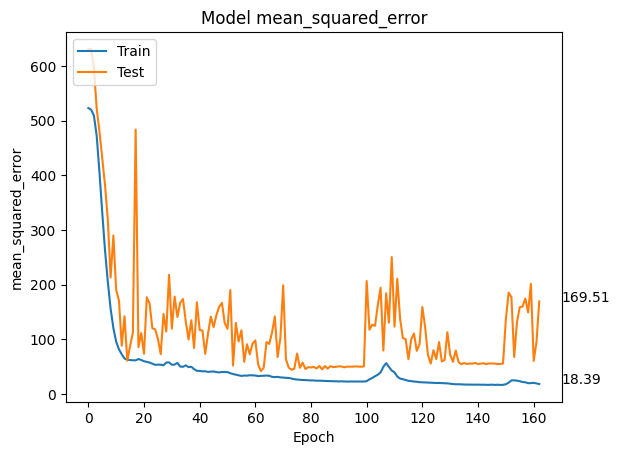

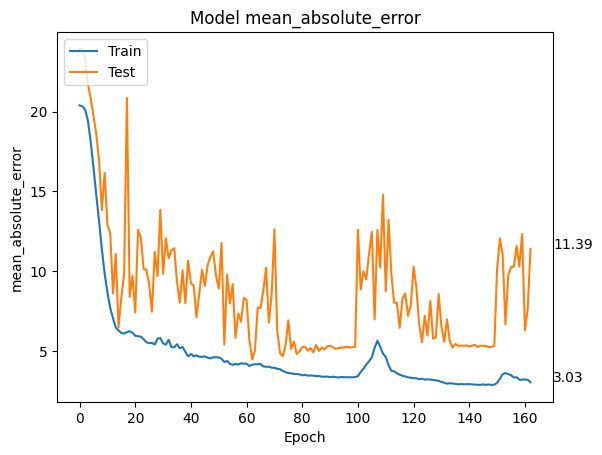

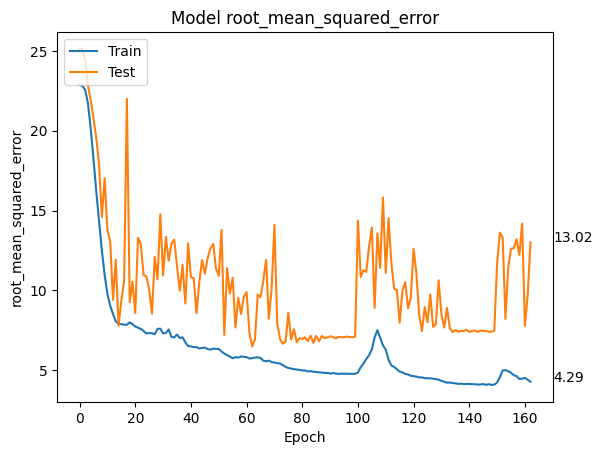

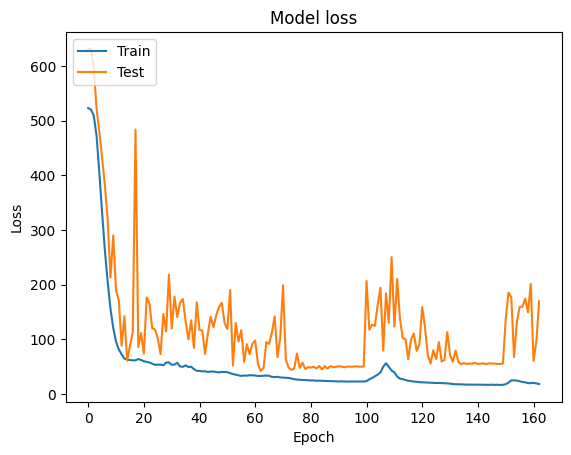

In [102]:
# train hist
history = hist

# mse
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


tr=history.history['mean_squared_error']
vr=history.history['val_mean_squared_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_mean_squared_error.jpg', dpi=150)
plt.show()


# mae
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


tr=history.history['mean_absolute_error']
vr=history.history['val_mean_absolute_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_mean_absolute_error.jpg', dpi=150)
plt.show()


# RMSE root_mean_squared_error
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

tr=history.history['root_mean_squared_error']
vr=history.history['val_root_mean_squared_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_root_mean_squared_error.jpg', dpi=150)
plt.show()


# loss = mean_squared_error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

2023-11-10 evnv2B0 [0-255] transfer learning re-train 

`efnv2B0_transferlearning + CosineDecayCLRWarmUpLSW_2 ep100`

改變LR使得MSE有下降一些了，可再增加epoch觀察：
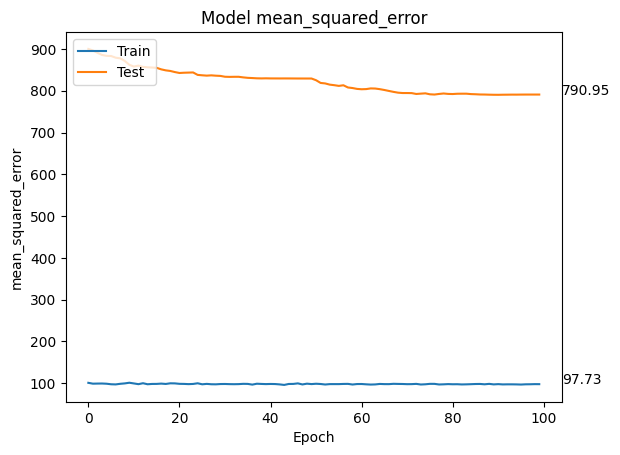


`efnv2B0_transferlearning + CosineDecayCLRWarmUpLSW_2 ep1000`

增加epoch後，發現僅是100前的局部最優，之後反而上升：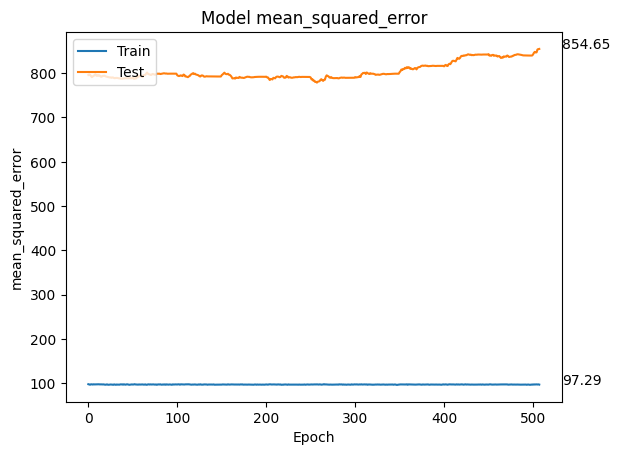



`efnv2B0_fine_tuneg + CosineDecayCLRWarmUpLSW_2 + ep1000`

改回fine tune之後，發現類似以往的狀態：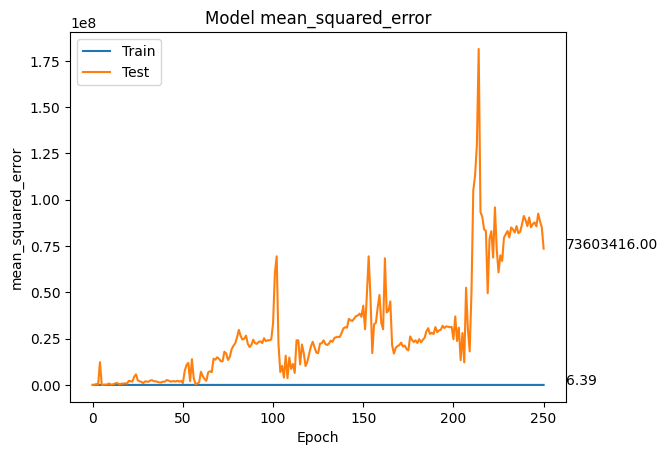


🔰⭕️ `efnv2B0_fine_tuneg + CosineDecayCLRWarmUpLSW_2 + ep1000 + include_preprocessing=False ( 之前都是預設沒有特別加本參數來證明) + skimge[0-1]input`

     ⭕️ 目前最佳結果 ⭕️ 
     
    🔰 include_preprocessing=False [-1,1] + skimage input[0,1] 🔰

有戲喔，但扣掉ep100之後，僅學習ep30就發散了：
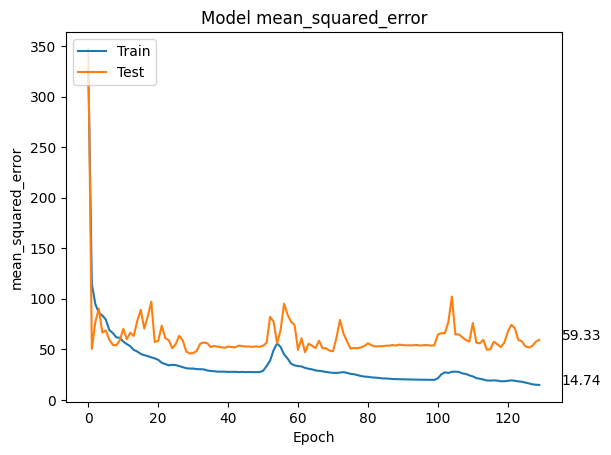



重訓一次：重現測試，兩次訓練最佳loss 45 與 46 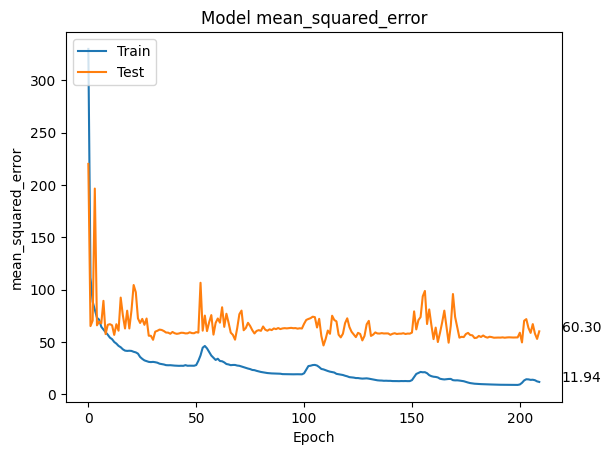

3. 重現測試 CDR3 pre warmup (44 最佳) 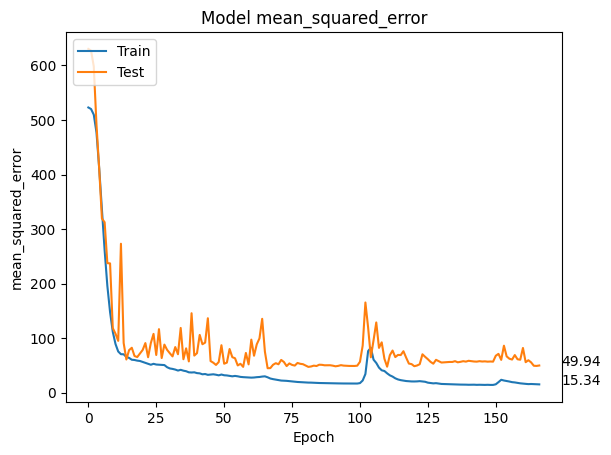



*
*



*

*

`efnv2B0_fine_tuneg + ResuceLR + ep1000 + include_preprocessing=False ( 之前都是預設沒有特別加本參數來證明) + skimge[0-1]input`

還是CDR比較好  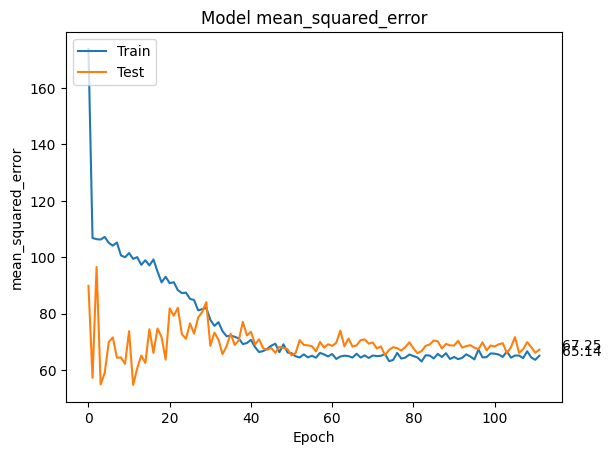







2023-11-10 evnv2B0 [0-255] transfer learning re-train also not well!!!

* https://blog.csdn.net/ytusdc/article/details/107738749 這篇整理的很好



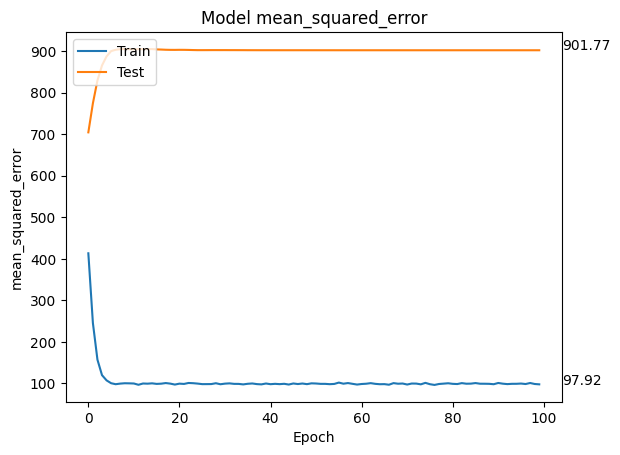

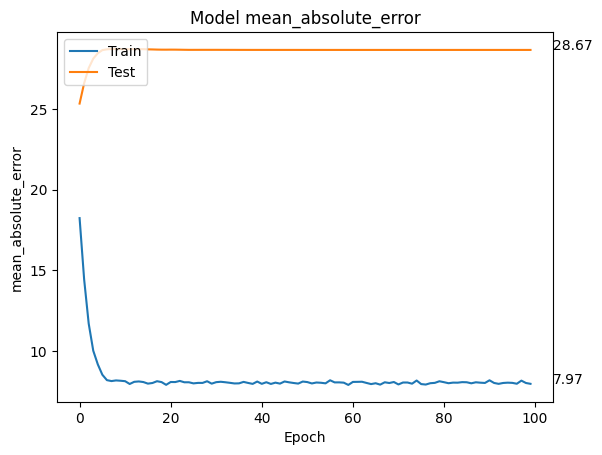

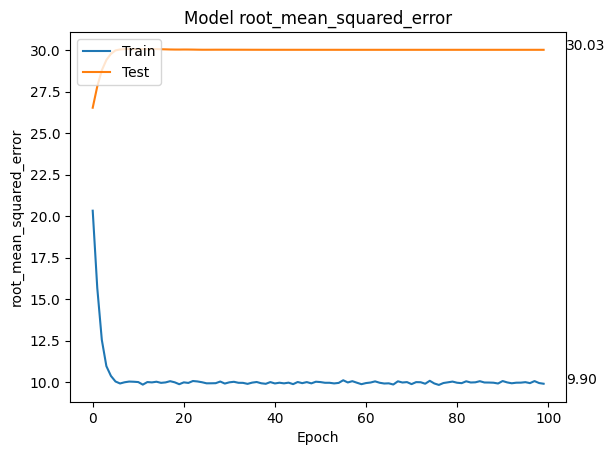


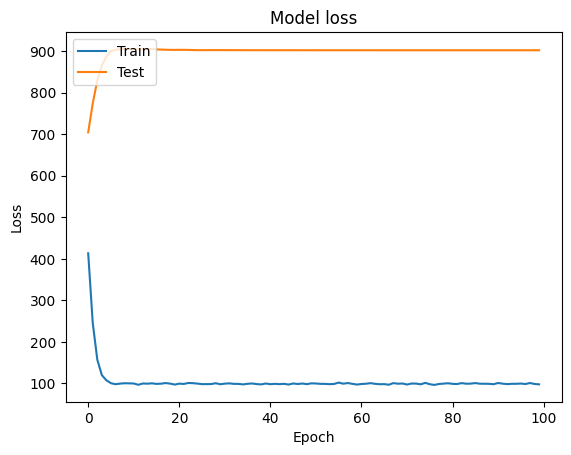

2023-11-09
evnv2B0 [0-255] fine-tune re-train not well!!!

not sure

* it seems no learn anything

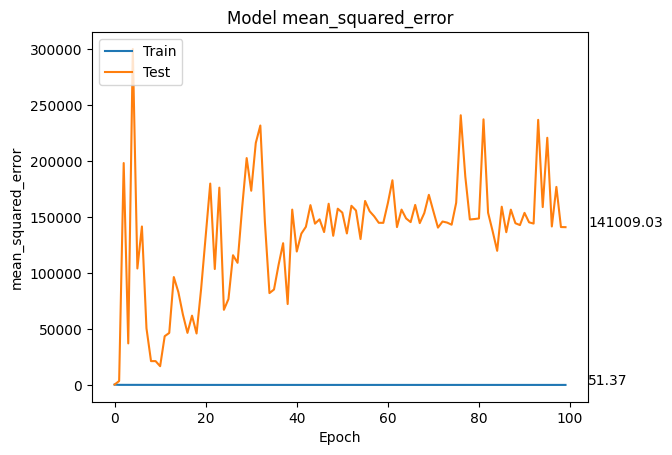


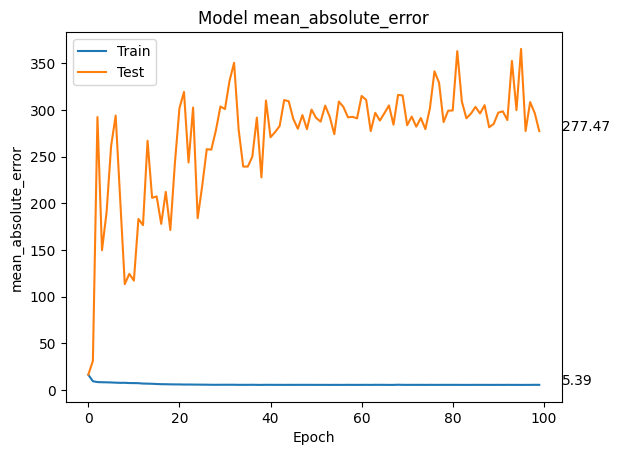


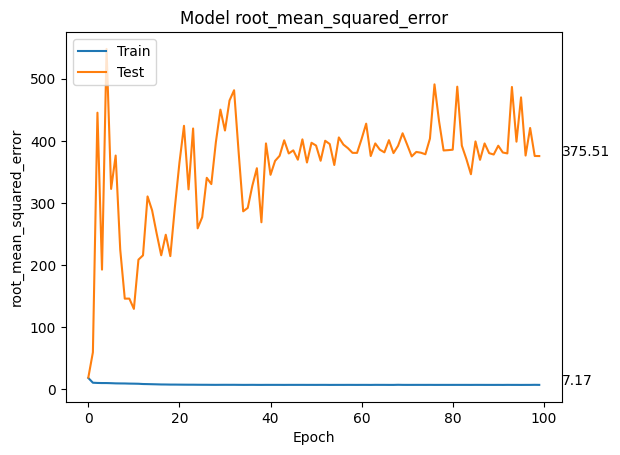

2023-04-10

2023-04-10 densenet tfds_tain_xy

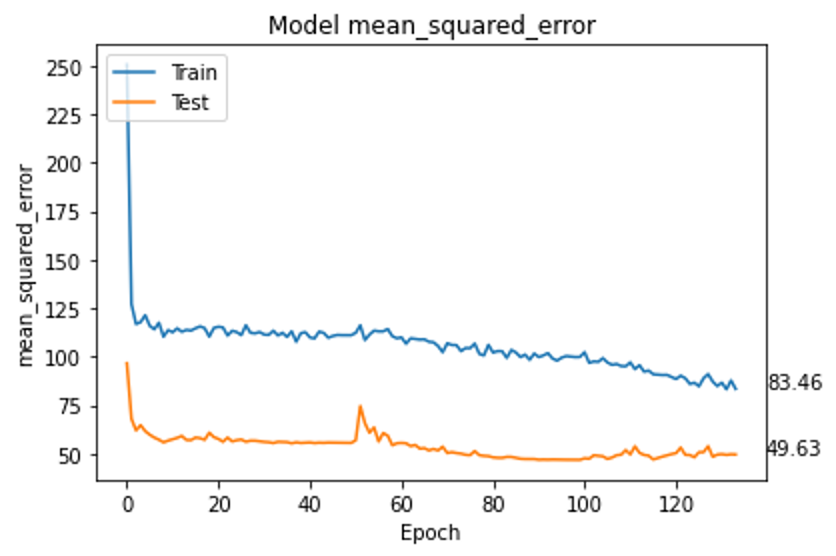
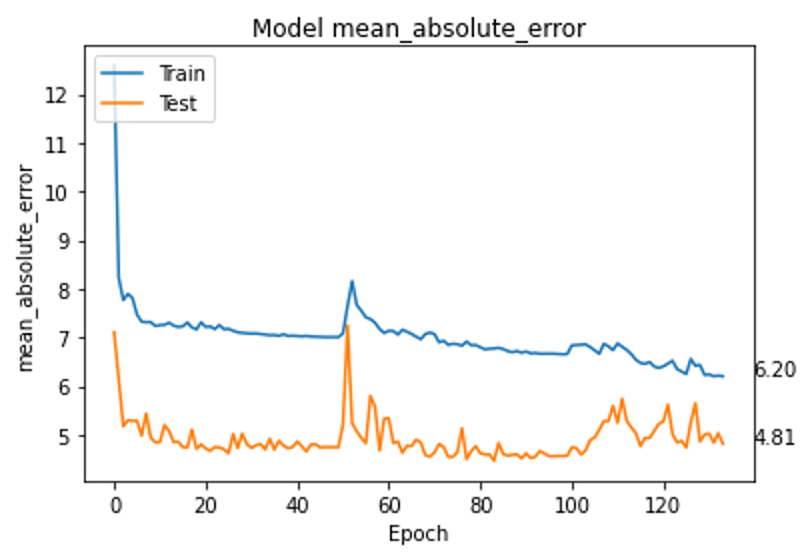
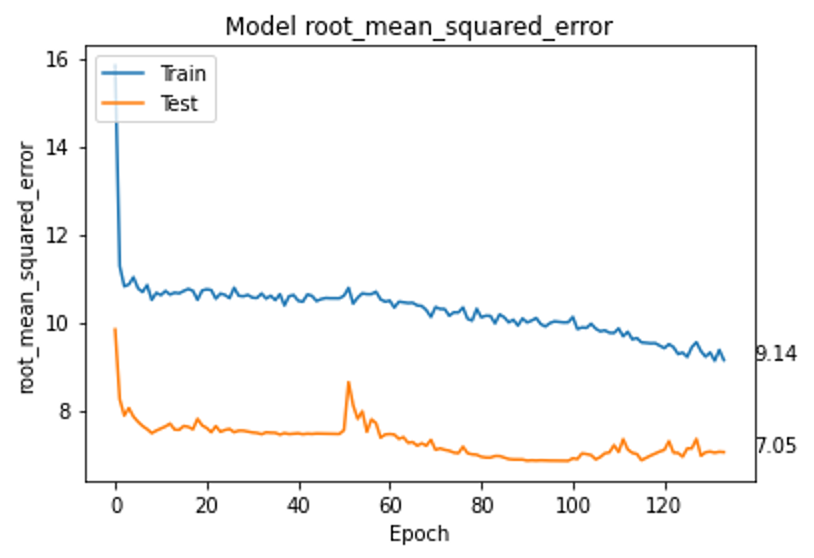

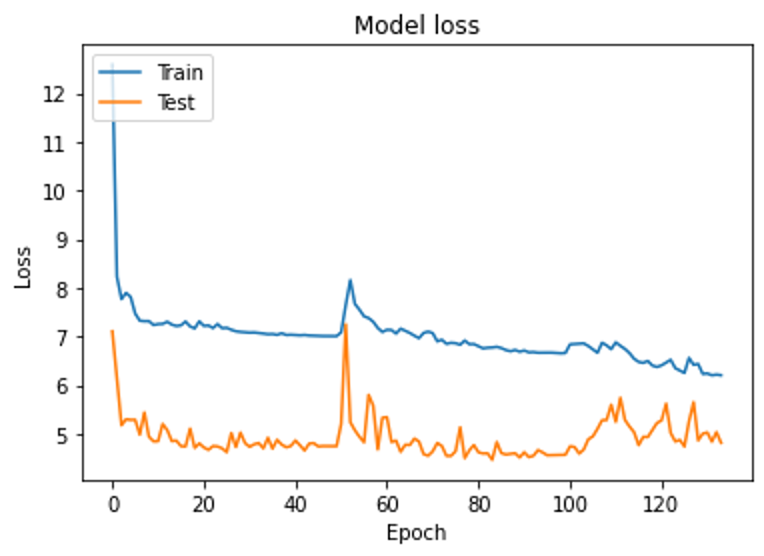

In [103]:
tr[-1]

4.287893772125244

### 2023-02-22  bs32 ep200 backbone.trainable = False save_weights_only=False
kernel_initializer=tf.keras.initializers.glorot_uniform()


Epoch 00199: val_loss did not improve from 49.87392
Epoch 200/200
8/8 [==============================] - 6s 806ms/step - loss: 8.2067 - mean_squared_error: 8.2067 - mean_absolute_error: 2.1606 - root_mean_squared_error: 2.8647 - val_loss: 122.4305 - val_mean_squared_error: 122.4305 - val_mean_absolute_error: 8.3190 - val_root_mean_squared_error: 11.0648

Epoch 00200: val_loss did not improve from 49.87392
CPU times: user 15min 53s, sys: 2min 35s, total: 18min 28s
Wall time: 31min 55s


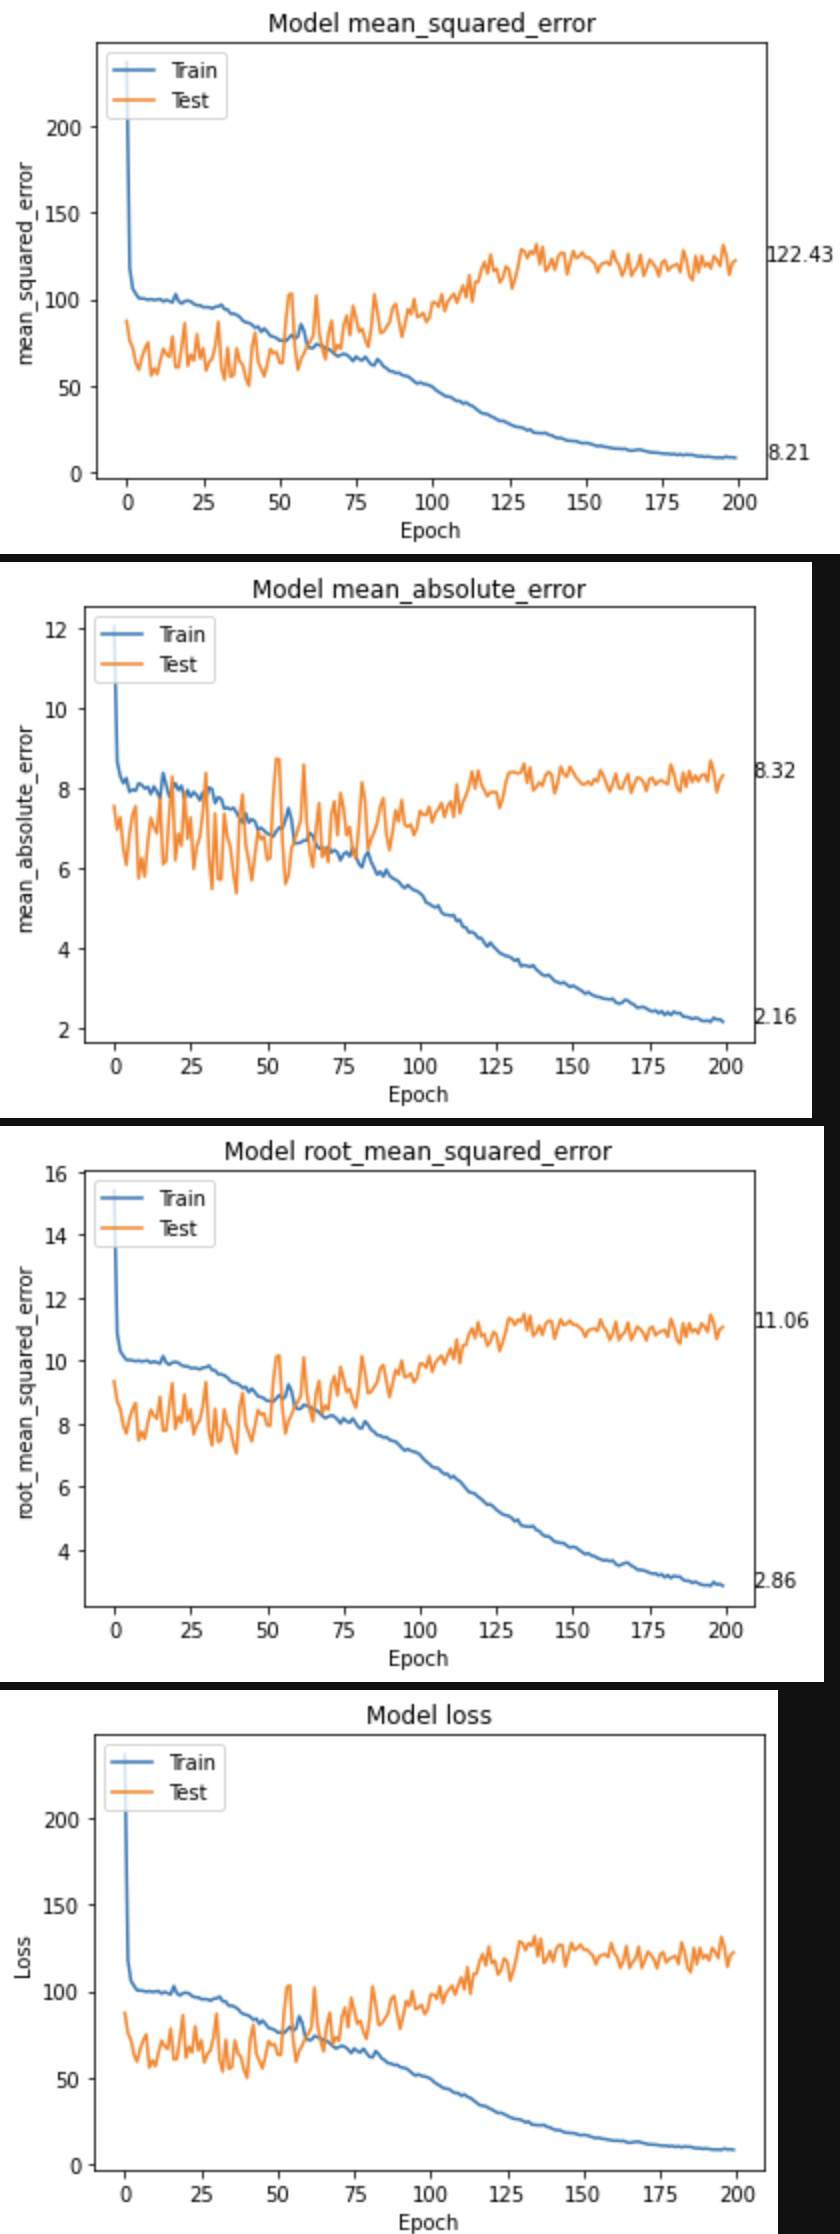

### 2023-02-22  bs2 ep200 backbone.trainable = False save_weights_only=False
kernel_initializer=tf.keras.initializers.glorot_uniform()


2023-02-22 10/05 dataset bs2 ep200

Epoch 00200: val_loss did not improve from 85.63309
CPU times: user 44min 4s, sys: 4min 25s, total: 48min 29s
Wall time: 46min 32s
    
    
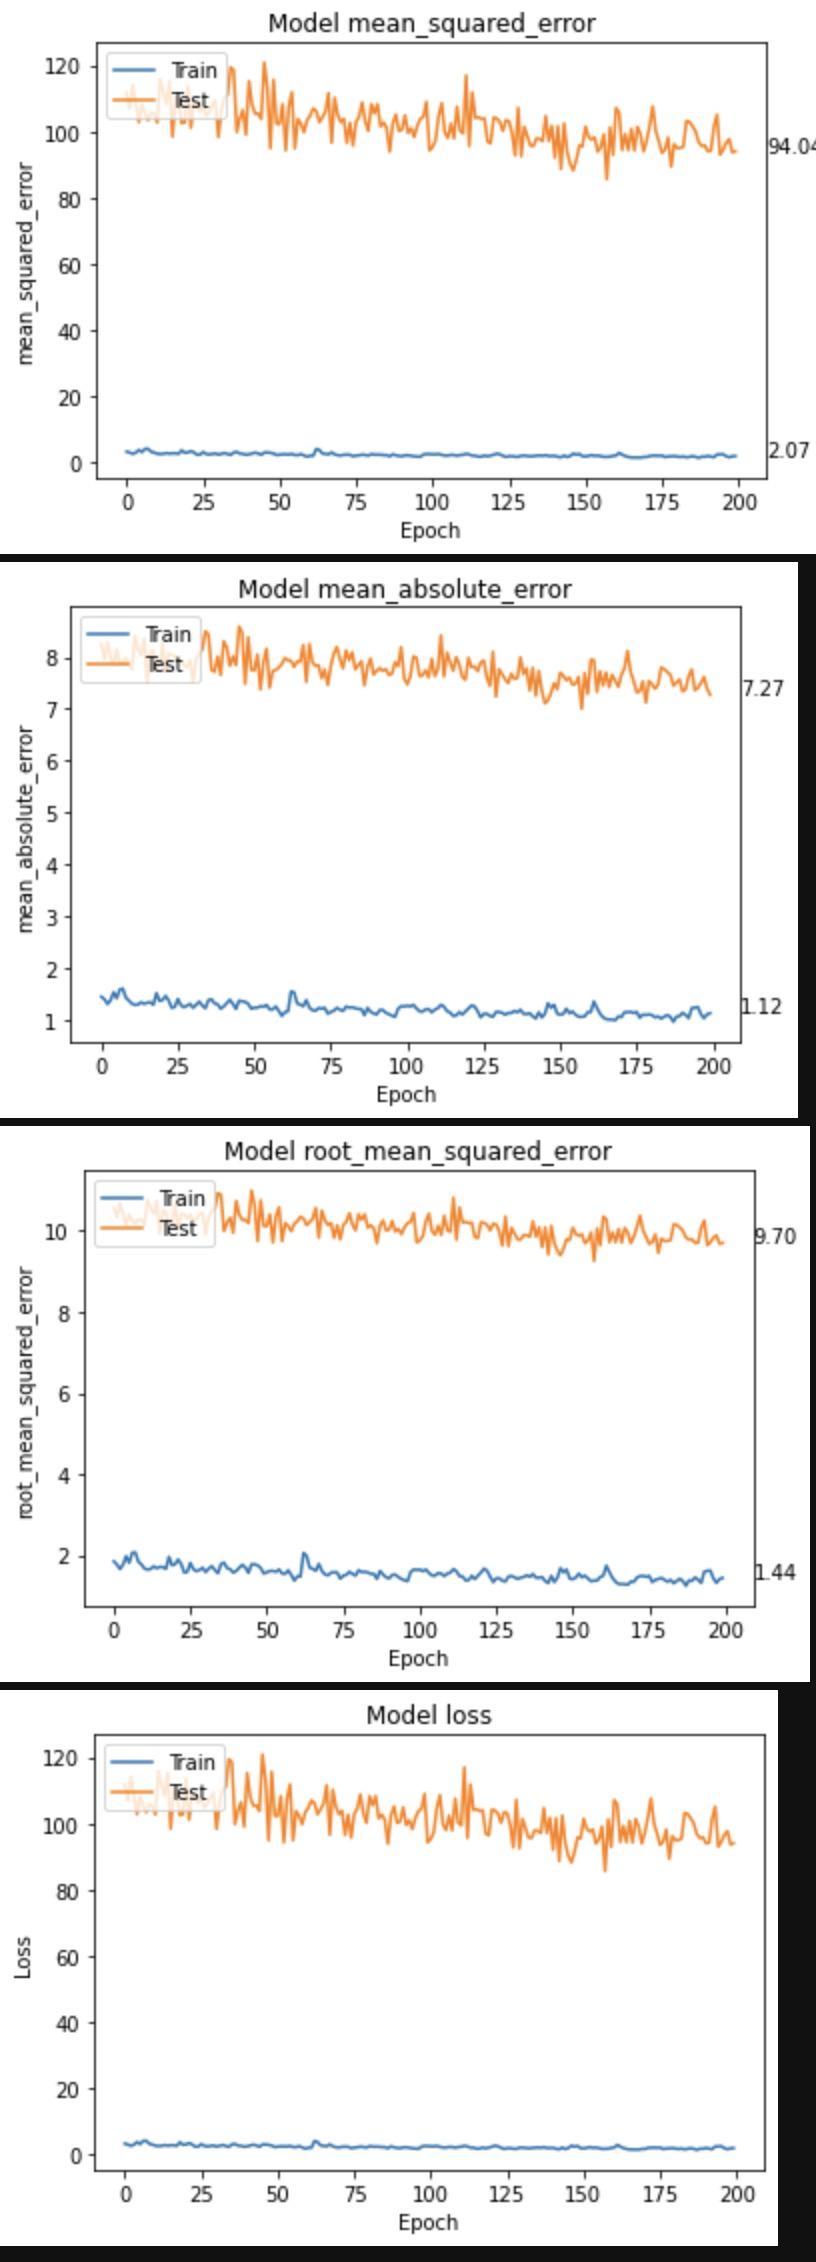

### last year not sure but seem better thean now


_1006_bs32_p0_e200_
Epoch 00199: val_loss did not improve from 55.48315
Epoch 200/200
8/8 [==============================] - 6s 802ms/step - loss: 60.3071 - mean_squared_error: 60.3071 - mean_absolute_error: 6.0912 - root_mean_squared_error: 7.7658 - val_loss: 91.1561 - val_mean_squared_error: 91.1561 - val_mean_absolute_error: 6.7619 - val_root_mean_squared_error: 9.5476
CPU times: user 6min 57s, sys: 2min 40s, total: 9min 37s
Wall time: 23min 7s
    

_1006_bs2_p0_e200_
Epoch 00199: val_loss did not improve from 51.45002
Epoch 200/200
122/122 [==============================] - 9s 71ms/step - loss: 98.8630 - mean_squared_error: 98.8630 - mean_absolute_error: 7.9771 - root_mean_squared_error: 9.9430 - val_loss: 57.9226 - val_mean_squared_error: 57.9226 - val_mean_absolute_error: 6.1787 - val_root_mean_squared_error: 7.6107
CPU times: user 28min 23s, sys: 4min 7s, total: 32min 30s
Wall time: 30min 14s 

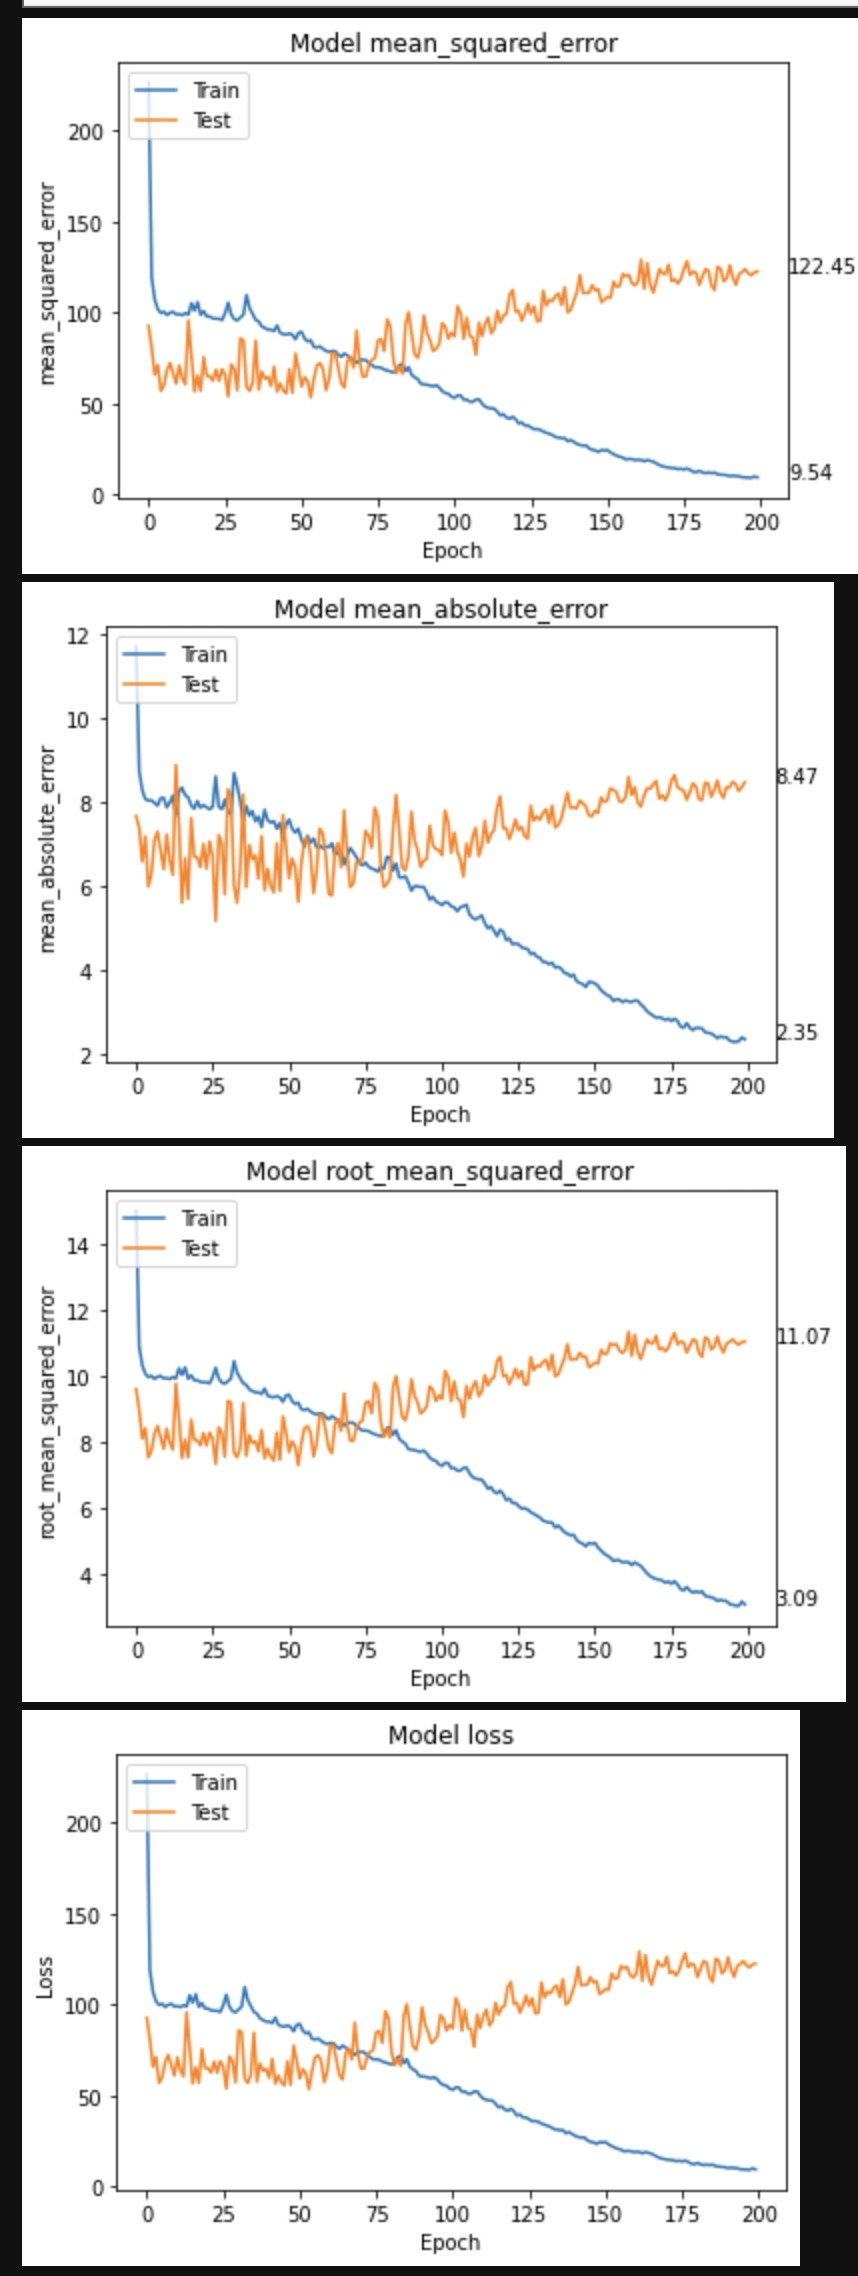





# Visualize results for PCGA

## Reload trained weight

In [104]:
%%time

# keras model reload #
#restore_model = tf.keras.models.load_model('my_model_weights.h5')


# weights model realod #
# # reload the weights not the load_model !
# model.load_weights('my_model_weights.h5')
# model.load_weights('_1006_bs32_p0_e200_my_model_weights_1006.h5')

# model.load_weights(best_model)

# Densenet v1 tds Aug mse
# model.load_weights("best_my_model_1006_bs32_p200_e200_lr_FixedShuffle_tdsAug/saved_weight")

# Densenet v1 tds NoAug mse
# model.load_weights("best_my_model_1006_bs32_p200_e200_lr_FixedShuffle_tdsNoAug/saved_weight")

# # 2023-06-12
# model.load_weights("best_my_model_20230612_bs32_reduce_lr_densenet/saved_weight")


# # 2023-09-02
# model.load_weights("best_my_model_20230902_bs8_reduce_lr_efnv2xl/saved_weight")

# 2023-10-26
# model.load_weights("best_my_model_20231026_bs8_reduce_lr_efnv2B0_fine_tune/saved_weight")


# 2023-11-09
# model.load_weights("best_my_model_20231026_bs8_reduce_lr_efnv2B0-0-255_fine_tune/saved_weight")




# 2023-11-10
# input[0,255], resscale-layer=True [0,255]
# model.load_weights("best_my_model_20231026_bs8_reduce_lr_efnv2B0-0-255_transferlearning/saved_weight")

# input[0,1], resscale-layer[-1,1]
# model.load_weights("best_my_model_20231026_bs8_reduce_lr_efnv2B0_normalize01-11_finetune/saved_weight")

# input[0,1], resscale-layer[0-255] 熱力圖最佳 + CDR3_pre_WarmUP
model.load_weights("best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/saved_weight")






# model.load_weights("best_my_model_1006_bs32_p0_e200_FixedShuffle/kpg_ckpt")


# Saved model reload #

# # model = tf.saved_model.load(best_model)
# model = tf.keras.models.load_model(best_model)
# print("Reload best model from:\n", best_model)

CPU times: user 2.05 s, sys: 14.2 ms, total: 2.06 s
Wall time: 2.03 s


In [105]:
model.summary()

Model: "EFNv2B0-PACG-FV52-normalize01only-finetune"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 512, 512, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 512, 512, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 256, 256, 32)        

In [106]:
def reshape_FV_value_list(fv_list):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]
#     gt_ = [
#      23 21 24 18
#      24 24 25 20 23 27
#      26 27 22 25 24 26 26 23 
#      29 23 27 28  0 27 26 25 
#      25  0 28 28 29 29 29 28 
#      30 30 30 29 26 29 28 27 
#      29 27 23 27 28 27
#      25 27 24 24]
    
#     for i, idx in enumerate(rank):
#         print(f"rank: {i} {idx}")
        
#         arr_idx_1 = np.pad(sampl_arr_1[i:idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
        
#         print(arr_idx_1)
    
    tmp_arr = []
    steps = 0
    h_rows = 4
    for i, idx in enumerate(rank):
        #print(f"rank: {i} {idx}")
        
#         # 8-rows
#         if i == 0 and idx == 4:
#             arr_idx_1 = np.pad(fv_list[0:idx], ((2, 2)), 'constant',constant_values=(0))
#         if i == 1 and idx == 6:
#             arr_idx_1 = np.pad(fv_list[4:4+idx], ((1, 1)), 'constant',constant_values=(0))
#         if i == 2 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[10:10+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 3 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[18:18+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 4 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[26:26+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 5 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[34:34+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 6 and idx == 6:
#             arr_idx_1 = np.pad(fv_list[42:42+idx], ((1, 1)), 'constant',constant_values=(0))
#         if i == 7 and idx == 4:
#             arr_idx_1 = np.pad(fv_list[48:48+idx], ((2, 2)), 'constant',constant_values=(0))


        # 8-rows in onece, half-rows = 4
        arr_idx_1 = np.pad(fv_list[steps : steps + idx], ((h_rows - int(idx/2), h_rows - int(idx/2))), 'constant', constant_values=(40))
        
        steps += idx
            
        tmp_arr.append(arr_idx_1)    
        
        #print(arr_idx_1)
    #print(tmp_arr)
    return np.vstack(tmp_arr)

def reshape_FV_value_to_org_list(fv_list):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]

    
    tmp_arr = []
    steps = 0
    h_rows = 4
    for i, idx in enumerate(rank):
        #print(f"rank: {i} {idx}")
        
        # 8-rows in onece, half-rows = 4
        arr_idx_1 = fv_list[steps : steps + idx]
        
        steps += idx
            
        tmp_arr.append(arr_idx_1)    
        
        #print(arr_idx_1)
    #print(tmp_arr)
    return tmp_arr

### Predict single image

單張讀取有問題 用imgs_test or imgs_val正常pred

In [107]:
%%time

s_folder="/home/u3148947/data/PACG_data_20221005/POACG_crop"
s_filename="1342399.jpg"#"0268212.jpg"
single_image = cv2.cvtColor(cv2.imread(os.path.join(s_folder,s_filename)), cv2.COLOR_BGR2RGB)

single_image = cv2.resize(single_image, (img_size,img_size)) # to 512
check_input_range(single_image)

single_image =tf.expand_dims(single_image, axis=0)
check_input_range(single_image[0])

single_pred = model.predict(single_image) 

shape:(512, 512, 3)
dtype:uint8
vmax:255
vmin:0

shape:(512, 512, 3)
dtype:<dtype: 'uint8'>
vmax:255
vmin:0

1/1 [==============================] - 5s 5s/step
CPU times: user 4.43 s, sys: 127 ms, total: 4.55 s
Wall time: 5.05 s


In [108]:
len(single_pred[0])

52

In [109]:
single_pred[0]

array([1464.8427 , 1366.3927 , 1331.3643 , 1357.466  , 1337.9684 ,
       1382.0573 , 1411.8325 , 1376.3768 , 1434.9911 , 1511.1116 ,
       1298.07   , 1394.7506 , 1386.4685 , 1408.7642 , 1431.2964 ,
       1348.3888 , 1438.9192 , 1405.9183 , 1220.8636 , 1207.1029 ,
       1384.5922 , 1382.1532 , 1276.3839 , 1343.1425 , 1342.2535 ,
       1217.07   ,  740.30457,  446.39764,  809.2211 , 1054.1019 ,
       1014.32654,  884.37067,  346.94247,  887.54443,  735.90204,
        634.6643 ,  705.94525,  809.004  ,  809.7971 ,  759.6187 ,
        708.8084 ,  780.49097,  709.8607 ,  701.2685 ,  695.8789 ,
        719.88776,  735.3396 ,  725.93353,  708.589  ,  680.83826,
        677.55414,  731.3884 ], dtype=float32)

In [110]:
rsingle_pred_eshape_fv = reshape_FV_value_list(single_pred[0])

In [111]:
rsingle_pred_eshape_fv

array([[  40.     ,   40.     , 1464.8427 , 1366.3927 , 1331.3643 ,
        1357.466  ,   40.     ,   40.     ],
       [  40.     , 1337.9684 , 1382.0573 , 1411.8325 , 1376.3768 ,
        1434.9911 , 1511.1116 ,   40.     ],
       [1298.07   , 1394.7506 , 1386.4685 , 1408.7642 , 1431.2964 ,
        1348.3888 , 1438.9192 , 1405.9183 ],
       [1220.8636 , 1207.1029 , 1384.5922 , 1382.1532 , 1276.3839 ,
        1343.1425 , 1342.2535 , 1217.07   ],
       [ 740.30457,  446.39764,  809.2211 , 1054.1019 , 1014.32654,
         884.37067,  346.94247,  887.54443],
       [ 735.90204,  634.6643 ,  705.94525,  809.004  ,  809.7971 ,
         759.6187 ,  708.8084 ,  780.49097],
       [  40.     ,  709.8607 ,  701.2685 ,  695.8789 ,  719.88776,
         735.3396 ,  725.93353,   40.     ],
       [  40.     ,   40.     ,  708.589  ,  680.83826,  677.55414,
         731.3884 ,   40.     ,   40.     ]], dtype=float32)

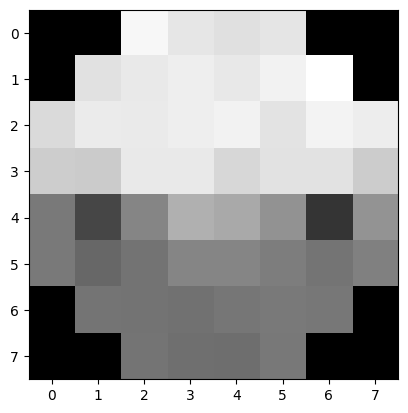

In [112]:
# plt.imshow(rsingle_pred_eshape_fv, interpolation='nearest', cmap="gray")
plt.imshow(rsingle_pred_eshape_fv, cmap="gray")
plt.show()

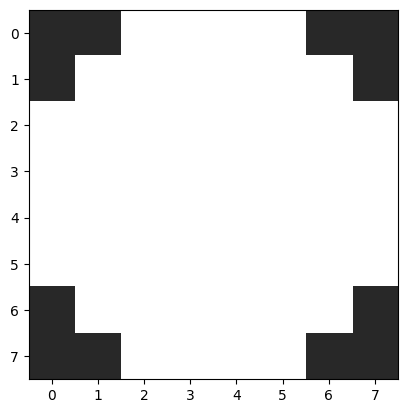

In [113]:
plt.imshow(rsingle_pred_eshape_fv, cmap="gray", vmin=0, vmax=255)
plt.show()

### Re - Save best model to tf.saved_model.save() formate
    for DAS env.

In [114]:
# re_save_saved = 'best_my_model_1006_bs32_p0_e200_FixedShuffle_saved/sms'
# tf.saved_model.save(model, re_save_saved)
# print("re-save to saved mode!", re_save_saved)

### Predict validation images

In [115]:
%%time
"""Take 40*2 sec for first run"""
# keras model (wheight)
val_points_pred = model.predict(imgs_val) # imgs_train imgs_val

# TF Saved_Mpdel
# val_points_pred = model(imgs_val) # imgs_train imgs_val

1/1 [==============================] - 9s 9s/step
CPU times: user 7.68 s, sys: 1.14 s, total: 8.82 s
Wall time: 9.23 s


In [116]:
# pred FV
val_points_pred[0]

array([20.173597, 20.51268 , 20.479477, 18.97714 , 22.852386, 23.47967 ,
       23.167583, 23.105314, 22.56886 , 21.21342 , 23.75574 , 24.843454,
       24.426321, 25.770027, 25.590391, 23.994127, 23.452314, 20.570011,
       24.824842, 20.820429, 26.323282, 27.877253, 26.42822 , 25.707943,
       23.674582, 21.69364 , 24.380903,  6.044448, 26.832506, 28.873077,
       28.088326, 25.522427, 19.88778 , 21.07837 , 24.319805, 24.702696,
       25.850147, 26.334373, 25.872978, 23.672712, 23.301264, 20.160366,
       25.030628, 25.955301, 25.38189 , 24.380142, 23.710754, 21.115833,
       24.157782, 24.329369, 23.429   , 21.643934], dtype=float32)

In [117]:
# GT FV
points_val[0]

array([ 3,  8, 18, 10, 24, 23,  3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26,
       23, 25, 14, 28, 30, 29, 28, 25, 20, 29,  0, 10, 31, 31, 29, 28, 23,
       27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25,
       24])

### Predict train images

In [118]:
%%time
train_points_pred = model.predict(imgs_train) # imgs_train imgs_val

8/8 [==============================] - 12s 1s/step
CPU times: user 10.4 s, sys: 2.36 s, total: 12.8 s
Wall time: 13.1 s


## 💹 Predict new test 14 images 💹

In [119]:
%%time
test_points_pred = model.predict(imgs_test)

1/1 [==============================] - 1s 1s/step
CPU times: user 801 ms, sys: 204 ms, total: 1 s
Wall time: 1.15 s


## Restore FV-value back to FV_img (gray scale map) 
    [2022-09-29]
    FV list rows number
    
    4
    6
    8
    8
    8
    8
    6
    4

    * reshape 52 to [8, 8] pad zeros [OK]
    * reshape [8,8] to [640, 640] and pad with Interpolation [NO, better keep it as it is. even for pix2pix training.]
    * plot as gray image [OK]

In [120]:
# check one fv_value
print(f"52 value: \n\t{points_val[0]}")
print(f"shape 1: \n\t{points_val[0].shape}")
print(f"length 1: \n\t{len(points_val[0])}")
# points_val[0]

52 value: 
	[ 3  8 18 10 24 23  3 21 22 23 20 26 26 26 24 24 26 23 25 14 28 30 29 28
 25 20 29  0 10 31 31 29 28 23 27 30 31 30 31 30 29 26 23 27 27 29 29 25
 28 27 25 24]
shape 1: 
	(52,)
length 1: 
	52


In [121]:
np.__version__

'1.22.2'

In [122]:
# points_val[0].reshape(8,8)

In [123]:
# np.reshape(points_val[0], (8,8))

In [124]:
# check how to pad zero to row

sampl_arr_1 = points_val[0]
print(sampl_arr_1[:4])

sampl_arr_1 = np.pad(sampl_arr_1[:4], ((2, 2)), 'constant',constant_values=(0))
print(sampl_arr_1)

[ 3  8 18 10]
[ 0  0  3  8 18 10  0  0]


In [125]:
# def reshape_FV_value_list(fv_list):
#     rank = [
#         4,
#         6,
#         8,
#         8,
#         8,
#         8,
#         6,
#         4]
# #     gt_ = [
# #      23 21 24 18
# #      24 24 25 20 23 27
# #      26 27 22 25 24 26 26 23 
# #      29 23 27 28  0 27 26 25 
# #      25  0 28 28 29 29 29 28 
# #      30 30 30 29 26 29 28 27 
# #      29 27 23 27 28 27
# #      25 27 24 24]
    
# #     for i, idx in enumerate(rank):
# #         print(f"rank: {i} {idx}")
        
# #         arr_idx_1 = np.pad(sampl_arr_1[i:idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
        
# #         print(arr_idx_1)
    
#     tmp_arr = []
#     steps = 0
#     h_rows = 4
#     for i, idx in enumerate(rank):
#         #print(f"rank: {i} {idx}")
        
# #         # 8-rows
# #         if i == 0 and idx == 4:
# #             arr_idx_1 = np.pad(fv_list[0:idx], ((2, 2)), 'constant',constant_values=(0))
# #         if i == 1 and idx == 6:
# #             arr_idx_1 = np.pad(fv_list[4:4+idx], ((1, 1)), 'constant',constant_values=(0))
# #         if i == 2 and idx == 8:
# #             arr_idx_1 = np.pad(fv_list[10:10+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
# #         if i == 3 and idx == 8:
# #             arr_idx_1 = np.pad(fv_list[18:18+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
# #         if i == 4 and idx == 8:
# #             arr_idx_1 = np.pad(fv_list[26:26+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
# #         if i == 5 and idx == 8:
# #             arr_idx_1 = np.pad(fv_list[34:34+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
# #         if i == 6 and idx == 6:
# #             arr_idx_1 = np.pad(fv_list[42:42+idx], ((1, 1)), 'constant',constant_values=(0))
# #         if i == 7 and idx == 4:
# #             arr_idx_1 = np.pad(fv_list[48:48+idx], ((2, 2)), 'constant',constant_values=(0))


#         # 8-rows in onece, half-rows = 4
#         arr_idx_1 = np.pad(fv_list[steps : steps + idx], ((h_rows - int(idx/2), h_rows - int(idx/2))), 'constant', constant_values=(40))
        
#         steps += idx
            
#         tmp_arr.append(arr_idx_1)    
        
#         #print(arr_idx_1)
#     #print(tmp_arr)
#     return np.vstack(tmp_arr)

# def reshape_FV_value_to_org_list(fv_list):
#     rank = [
#         4,
#         6,
#         8,
#         8,
#         8,
#         8,
#         6,
#         4]

    
#     tmp_arr = []
#     steps = 0
#     h_rows = 4
#     for i, idx in enumerate(rank):
#         #print(f"rank: {i} {idx}")
        
#         # 8-rows in onece, half-rows = 4
#         arr_idx_1 = fv_list[steps : steps + idx]
        
#         steps += idx
            
#         tmp_arr.append(arr_idx_1)    
        
#         #print(arr_idx_1)
#     #print(tmp_arr)
#     return tmp_arr

In [126]:
reshape_fv = reshape_FV_value_list(points_val[0])

In [127]:
points_val[0]

array([ 3,  8, 18, 10, 24, 23,  3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26,
       23, 25, 14, 28, 30, 29, 28, 25, 20, 29,  0, 10, 31, 31, 29, 28, 23,
       27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25,
       24])

In [128]:
reshape_fv

array([[40, 40,  3,  8, 18, 10, 40, 40],
       [40, 24, 23,  3, 21, 22, 23, 40],
       [20, 26, 26, 26, 24, 24, 26, 23],
       [25, 14, 28, 30, 29, 28, 25, 20],
       [29,  0, 10, 31, 31, 29, 28, 23],
       [27, 30, 31, 30, 31, 30, 29, 26],
       [40, 23, 27, 27, 29, 29, 25, 40],
       [40, 40, 28, 27, 25, 24, 40, 40]])

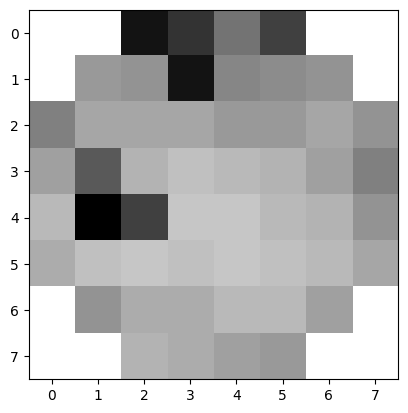

In [129]:
# if pading with 255 (white), then set the scale limit to 0~40
plt.imshow(reshape_fv, interpolation='nearest', cmap="gray", vmin=0, vmax=40)
plt.show()

In [130]:
reshape_fv_pred = reshape_FV_value_list(val_points_pred[0])

In [131]:
reshape_fv_pred

array([[40.      , 40.      , 20.173597, 20.51268 , 20.479477, 18.97714 ,
        40.      , 40.      ],
       [40.      , 22.852386, 23.47967 , 23.167583, 23.105314, 22.56886 ,
        21.21342 , 40.      ],
       [23.75574 , 24.843454, 24.426321, 25.770027, 25.590391, 23.994127,
        23.452314, 20.570011],
       [24.824842, 20.820429, 26.323282, 27.877253, 26.42822 , 25.707943,
        23.674582, 21.69364 ],
       [24.380903,  6.044448, 26.832506, 28.873077, 28.088326, 25.522427,
        19.88778 , 21.07837 ],
       [24.319805, 24.702696, 25.850147, 26.334373, 25.872978, 23.672712,
        23.301264, 20.160366],
       [40.      , 25.030628, 25.955301, 25.38189 , 24.380142, 23.710754,
        21.115833, 40.      ],
       [40.      , 40.      , 24.157782, 24.329369, 23.429   , 21.643934,
        40.      , 40.      ]], dtype=float32)

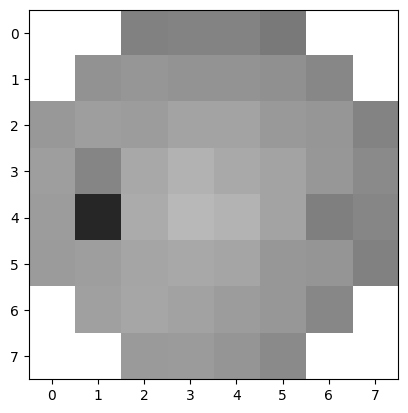

In [132]:
# if pading with 255 (white), then set the scale limit to 0~40
plt.imshow(reshape_fv_pred, interpolation='nearest', cmap="gray", vmin=0, vmax=40)
plt.show()

### Check val_FV_value_list name is in the right ordered


In [133]:
""" read in list
imgs_train, points_train 
imgs_val, points_val
"""

def get_points_dict(CSV_name):
    points_dict={}
    with open(CSV_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
            
    return points_dict     
            
val_points_dict = get_points_dict("FV_image_value_1005_val.csv")


print(val_points_dict.keys())
print()
print(list(val_points_dict.items())[0])

print("val length: ", len(val_points_dict))

dict_keys(['3602493_L', '2099276', '3602493', '1545959', '3167782', '2216002_R', '5012674', '2907064_L', '3310379', '2815145_L', '0268212', '1935572', '1310627_R', '1342399_L', '4154541_L', '3407174', '3806920', '2987599', '0849116_L', '4475746_R', '2216002', '4154541', '3321454_L', '2815145', '2376139_R', '3001867', '1935572_L'])

('3602493_L', [3, 8, 18, 10, 24, 23, 3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26, 23, 25, 14, 28, 30, 29, 28, 25, 20, 29, 0, 10, 31, 31, 29, 28, 23, 27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25, 24])
val length:  27


In [134]:
# check from train/val read in #
points_val[0]

array([ 3,  8, 18, 10, 24, 23,  3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26,
       23, 25, 14, 28, 30, 29, 28, 25, 20, 29,  0, 10, 31, 31, 29, 28, 23,
       27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25,
       24])

In [135]:
# the order in CSV and val_point is correct #
print("check read from CSV [0]:\n", val_points_dict['3602493_L'], type(val_points_dict['3602493_L'])) # list object
print("check read from val [0]:\n", points_val[0], type(points_val[0]))                               # np.ndarray



check read from CSV [0]:
 [3, 8, 18, 10, 24, 23, 3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26, 23, 25, 14, 28, 30, 29, 28, 25, 20, 29, 0, 10, 31, 31, 29, 28, 23, 27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25, 24] <class 'list'>
check read from val [0]:
 [ 3  8 18 10 24 23  3 21 22 23 20 26 26 26 24 24 26 23 25 14 28 30 29 28
 25 20 29  0 10 31 31 29 28 23 27 30 31 30 31 30 29 26 23 27 27 29 29 25
 28 27 25 24] <class 'numpy.ndarray'>


### Also check val_points_pred

In [136]:
print("check read from prd [0]:\n", val_points_pred[0], type(val_points_pred[0]))        


check read from prd [0]:
 [20.173597 20.51268  20.479477 18.97714  22.852386 23.47967  23.167583
 23.105314 22.56886  21.21342  23.75574  24.843454 24.426321 25.770027
 25.590391 23.994127 23.452314 20.570011 24.824842 20.820429 26.323282
 27.877253 26.42822  25.707943 23.674582 21.69364  24.380903  6.044448
 26.832506 28.873077 28.088326 25.522427 19.88778  21.07837  24.319805
 24.702696 25.850147 26.334373 25.872978 23.672712 23.301264 20.160366
 25.030628 25.955301 25.38189  24.380142 23.710754 21.115833 24.157782
 24.329369 23.429    21.643934] <class 'numpy.ndarray'>


In [137]:
reshape_fv = reshape_FV_value_to_org_list(points_val[0])
reshape_fv_pred = reshape_FV_value_to_org_list(val_points_pred[0])

print("check read from val [0]:\n", reshape_fv)
print("check read from prd [0]:\n", reshape_fv_pred)

check read from val [0]:
 [array([ 3,  8, 18, 10]), array([24, 23,  3, 21, 22, 23]), array([20, 26, 26, 26, 24, 24, 26, 23]), array([25, 14, 28, 30, 29, 28, 25, 20]), array([29,  0, 10, 31, 31, 29, 28, 23]), array([27, 30, 31, 30, 31, 30, 29, 26]), array([23, 27, 27, 29, 29, 25]), array([28, 27, 25, 24])]
check read from prd [0]:
 [array([20.173597, 20.51268 , 20.479477, 18.97714 ], dtype=float32), array([22.852386, 23.47967 , 23.167583, 23.105314, 22.56886 , 21.21342 ],
      dtype=float32), array([23.75574 , 24.843454, 24.426321, 25.770027, 25.590391, 23.994127,
       23.452314, 20.570011], dtype=float32), array([24.824842, 20.820429, 26.323282, 27.877253, 26.42822 , 25.707943,
       23.674582, 21.69364 ], dtype=float32), array([24.380903,  6.044448, 26.832506, 28.873077, 28.088326, 25.522427,
       19.88778 , 21.07837 ], dtype=float32), array([24.319805, 24.702696, 25.850147, 26.334373, 25.872978, 23.672712,
       23.301264, 20.160366], dtype=float32), array([25.030628, 25.95530

In [138]:
reshape_fv_pred

[array([20.173597, 20.51268 , 20.479477, 18.97714 ], dtype=float32),
 array([22.852386, 23.47967 , 23.167583, 23.105314, 22.56886 , 21.21342 ],
       dtype=float32),
 array([23.75574 , 24.843454, 24.426321, 25.770027, 25.590391, 23.994127,
        23.452314, 20.570011], dtype=float32),
 array([24.824842, 20.820429, 26.323282, 27.877253, 26.42822 , 25.707943,
        23.674582, 21.69364 ], dtype=float32),
 array([24.380903,  6.044448, 26.832506, 28.873077, 28.088326, 25.522427,
        19.88778 , 21.07837 ], dtype=float32),
 array([24.319805, 24.702696, 25.850147, 26.334373, 25.872978, 23.672712,
        23.301264, 20.160366], dtype=float32),
 array([25.030628, 25.955301, 25.38189 , 24.380142, 23.710754, 21.115833],
       dtype=float32),
 array([24.157782, 24.329369, 23.429   , 21.643934], dtype=float32)]

In [139]:
val_points_pred[0] #ndarray
# len(val_points_pred[0])

array([20.173597, 20.51268 , 20.479477, 18.97714 , 22.852386, 23.47967 ,
       23.167583, 23.105314, 22.56886 , 21.21342 , 23.75574 , 24.843454,
       24.426321, 25.770027, 25.590391, 23.994127, 23.452314, 20.570011,
       24.824842, 20.820429, 26.323282, 27.877253, 26.42822 , 25.707943,
       23.674582, 21.69364 , 24.380903,  6.044448, 26.832506, 28.873077,
       28.088326, 25.522427, 19.88778 , 21.07837 , 24.319805, 24.702696,
       25.850147, 26.334373, 25.872978, 23.672712, 23.301264, 20.160366,
       25.030628, 25.955301, 25.38189 , 24.380142, 23.710754, 21.115833,
       24.157782, 24.329369, 23.429   , 21.643934], dtype=float32)

#### Check to save val points to text

In [140]:
# try np to np.savetext
tmp_np = np.array(val_points_pred[0])
# tmp_np.shape
np.savetxt("test_np_savetext.txt", tmp_np, delimiter=',', fmt='%s') # only %s works for non-same shape arrays

In [141]:
!cat test_np_savetext.txt

20.173597
20.51268
20.479477
18.97714
22.852386
23.47967
23.167583
23.105314
22.56886
21.21342
23.75574
24.843454
24.426321
25.770027
25.590391
23.994127
23.452314
20.570011
24.824842
20.820429
26.323282
27.877253
26.42822
25.707943
23.674582
21.69364
24.380903
6.044448
26.832506
28.873077
28.088326
25.522427
19.88778
21.07837
24.319805
24.702696
25.850147
26.334373
25.872978
23.672712
23.301264
20.160366
25.030628
25.955301
25.38189
24.380142
23.710754
21.115833
24.157782
24.329369
23.429
21.643934


In [142]:
# try np to np.savetext
tmp_np = np.array(reshape_fv_pred, dtype=object)
# tmp_np.shape
np.savetxt("test_np_savetext.txt", tmp_np, delimiter=',', fmt='%s') # only %s works for non-same shape arrays

In [143]:
!cat test_np_savetext.txt

[20.173597 20.51268  20.479477 18.97714 ]
[22.852386 23.47967  23.167583 23.105314 22.56886  21.21342 ]
[23.75574  24.843454 24.426321 25.770027 25.590391 23.994127 23.452314
 20.570011]
[24.824842 20.820429 26.323282 27.877253 26.42822  25.707943 23.674582
 21.69364 ]
[24.380903  6.044448 26.832506 28.873077 28.088326 25.522427 19.88778
 21.07837 ]
[24.319805 24.702696 25.850147 26.334373 25.872978 23.672712 23.301264
 20.160366]
[25.030628 25.955301 25.38189  24.380142 23.710754 21.115833]
[24.157782 24.329369 23.429    21.643934]


In [144]:
# try list array to txt



def write_reshape_FV_value_to_txt(fv_list, filename):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]

    
    tmp_arr = []
    steps = 0
    h_rows = 4
    
    with open(filename, "w") as txt_file:
        for i, idx in enumerate(rank):
            #print(f"rank: {i} {idx}")

            # 8-rows in onece, half-rows = 4
            arr_idx_1 = fv_list[steps : steps + idx]

            steps += idx
            for value in arr_idx_1:
                txt_file.write("".join(str(value)) + ",") #tmp_arr.append(arr_idx_1)    
            txt_file.write("\n") #tmp_arr.append(arr_idx_1)  

            #print(arr_idx_1)
        #print(tmp_arr)
        #return tmp_arr



write_reshape_FV_value_to_txt(val_points_pred[0], "test_np_savetext.txt")


In [145]:
!cat test_np_savetext.txt

20.173597,20.51268,20.479477,18.97714,
22.852386,23.47967,23.167583,23.105314,22.56886,21.21342,
23.75574,24.843454,24.426321,25.770027,25.590391,23.994127,23.452314,20.570011,
24.824842,20.820429,26.323282,27.877253,26.42822,25.707943,23.674582,21.69364,
24.380903,6.044448,26.832506,28.873077,28.088326,25.522427,19.88778,21.07837,
24.319805,24.702696,25.850147,26.334373,25.872978,23.672712,23.301264,20.160366,
25.030628,25.955301,25.38189,24.380142,23.710754,21.115833,
24.157782,24.329369,23.429,21.643934,


### convert pred_FV_value to list

In [146]:
# !mkdir _1006_bs32_p0_e200

In [147]:
for item in range(len(val_points_dict)):
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
    filename = best_model.split("/")[0] + "/" + val_points_dict_list[item][0] + ".txt"
    print("check filename:", filename)
  
    # to value.txt , comment if not to rewrite the exist files
    write_reshape_FV_value_to_txt(val_points_pred[item], filename)
    print("Save val_points to txt.")

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3602493_L.txt
Save val_points to txt.
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2099276.txt
Save val_points to txt.
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3602493.txt
Save val_points to txt.
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/1545959.txt
Save val_points to txt.
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3167782.txt
Save val_points to txt.
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2216002_R.txt
Save val_points to txt.
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/5012674.txt
Save val_points to txt.
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2907064_L.txt
Save val_points to txt.
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_no

## display and save pred_FV_value to image / compute metrics and save to txt

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3602493_L_predFV.jpg
check prd_type: 24.380142 float32 29 int64
check prd_type: 24 29 uint8
MAE : 3.345698118209839
MSE : 28.1839599609375
PSNR: 17.541179417215417
SSIM: 0.7271858155727386


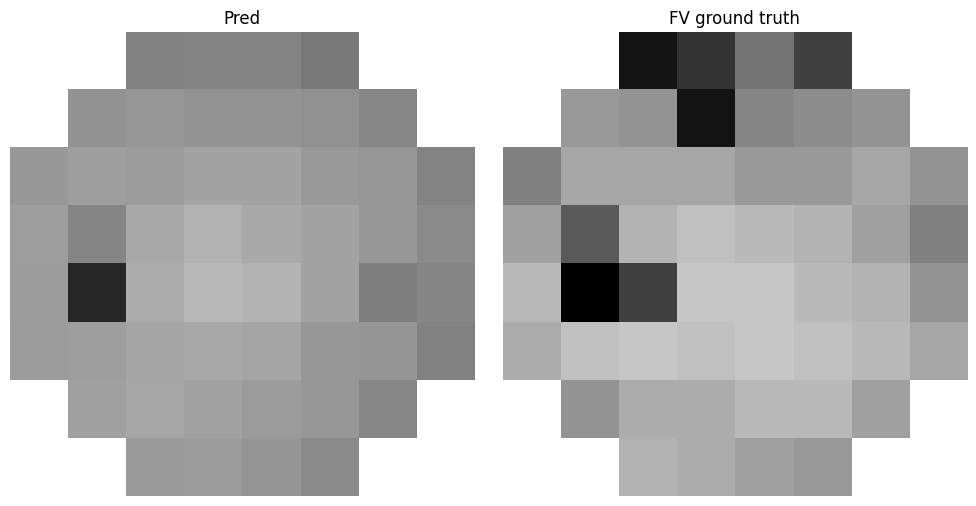

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2099276_predFV.jpg
check prd_type: 22.86304 float32 26 int64
check prd_type: 22 26 uint8
MAE : 4.960288047790527
MSE : 48.42552947998047
PSNR: 15.190455966633357
SSIM: 0.738812044262886


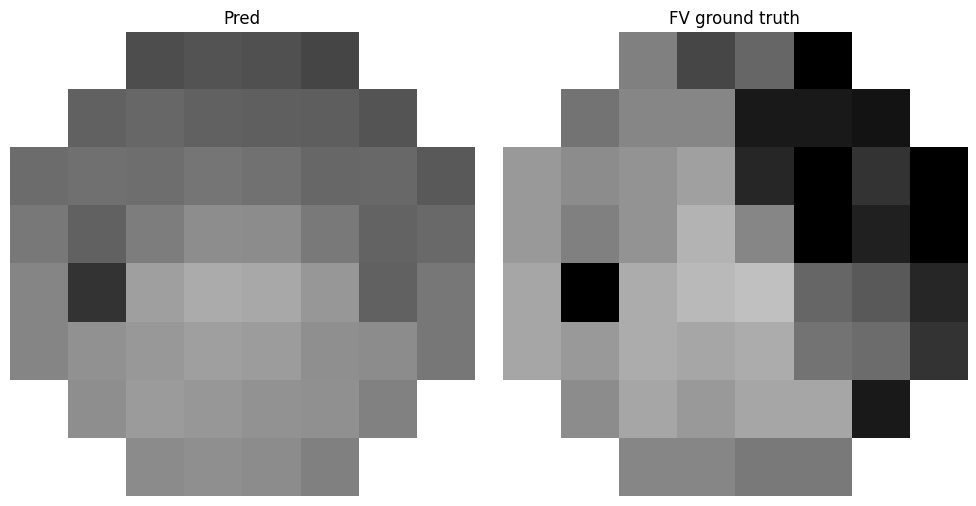

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3602493_predFV.jpg
check prd_type: 25.06796 float32 27 int64
check prd_type: 25 27 uint8
MAE : 1.90514075756073
MSE : 7.680708408355713
PSNR: 23.187187041101843
SSIM: 0.8882989436388016


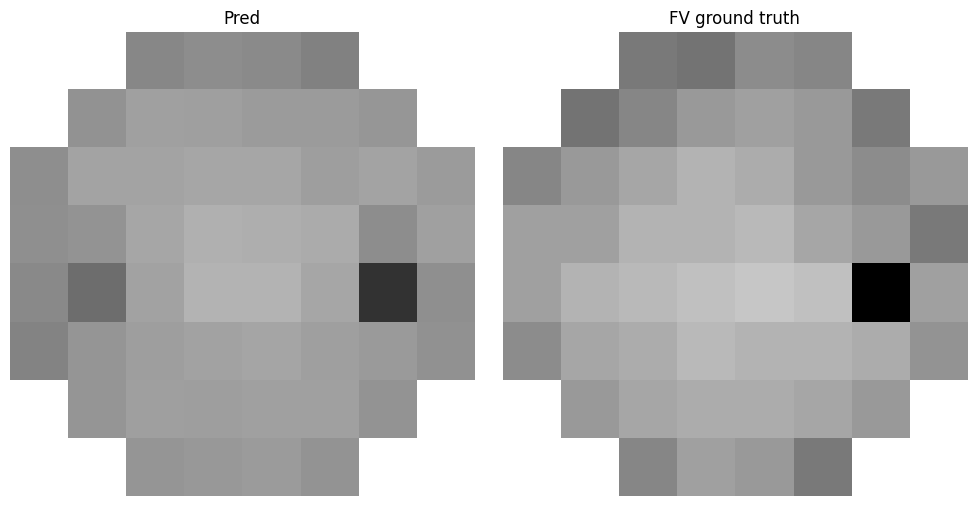

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/1545959_predFV.jpg
check prd_type: 25.940172 float32 25 int64
check prd_type: 25 25 uint8
MAE : 3.024141311645508
MSE : 14.54745101928711
PSNR: 20.413330508639923
SSIM: 0.8750202804803848


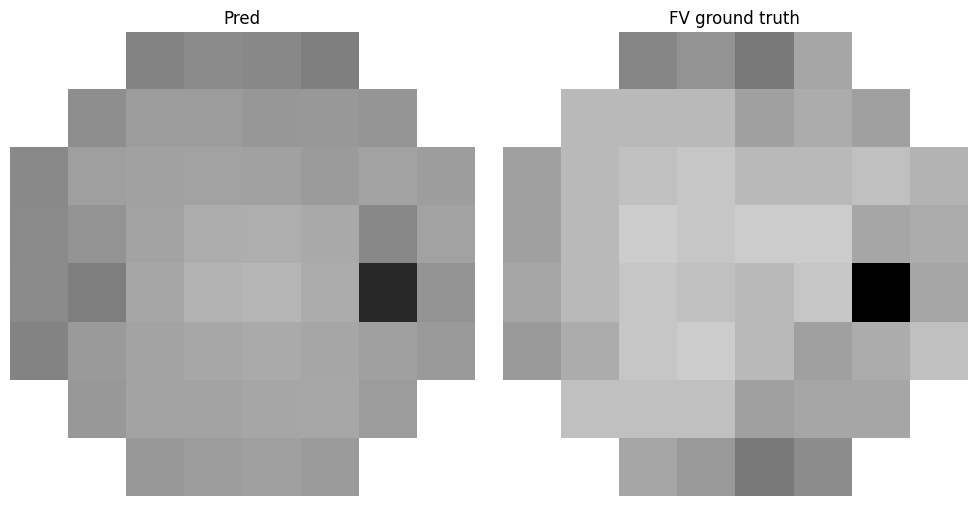

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3167782_predFV.jpg
check prd_type: 29.33054 float32 28 int64
check prd_type: 29 28 uint8
MAE : 5.193871021270752
MSE : 72.06918334960938
PSNR: 13.463704194463125
SSIM: 0.6349443197250366


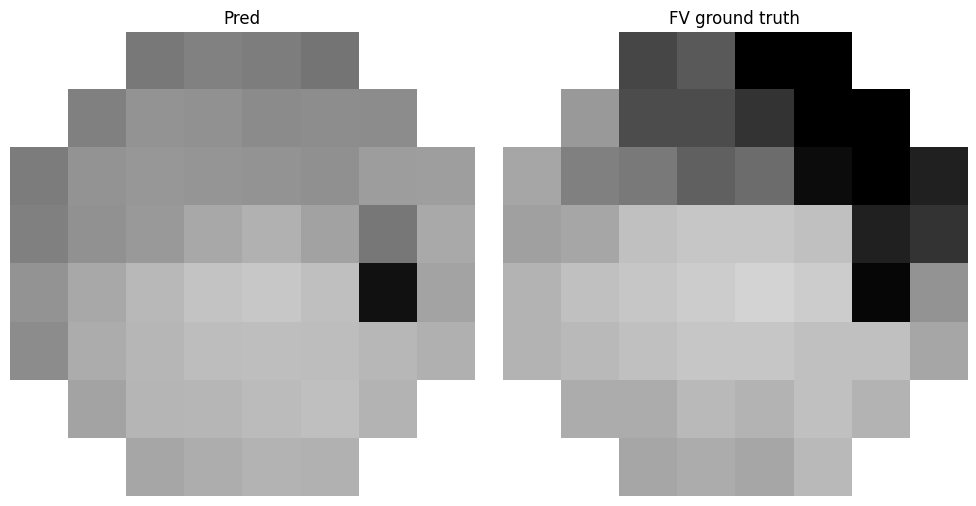

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2216002_R_predFV.jpg
check prd_type: 26.624638 float32 31 int64
check prd_type: 26 31 uint8
MAE : 3.7818198204040527
MSE : 23.194698333740234
PSNR: 18.387312552485483
SSIM: 0.7820378690958023


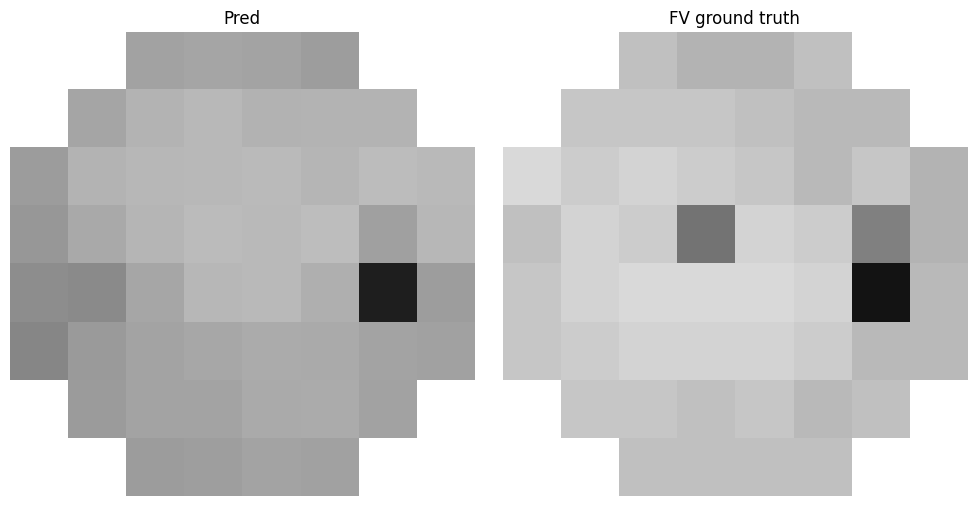

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/5012674_predFV.jpg
check prd_type: 26.519924 float32 28 int64
check prd_type: 26 28 uint8
MAE : 2.6661062240600586
MSE : 11.705223083496094
PSNR: 21.357402950794523
SSIM: 0.9133330136537552


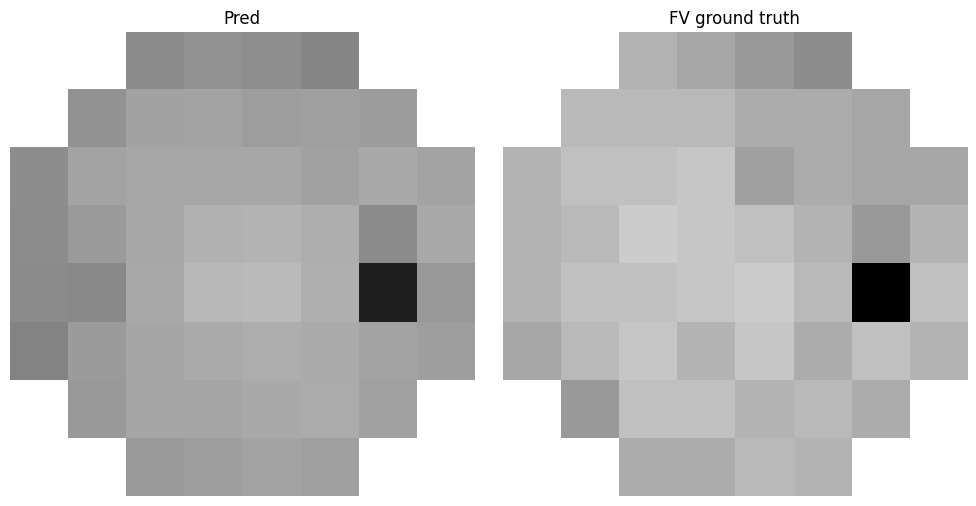

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2907064_L_predFV.jpg
check prd_type: 26.554676 float32 26 int64
check prd_type: 26 26 uint8
MAE : 1.2521216869354248
MSE : 4.97419548034668
PSNR: 25.073971281949316
SSIM: 0.8931310772895813


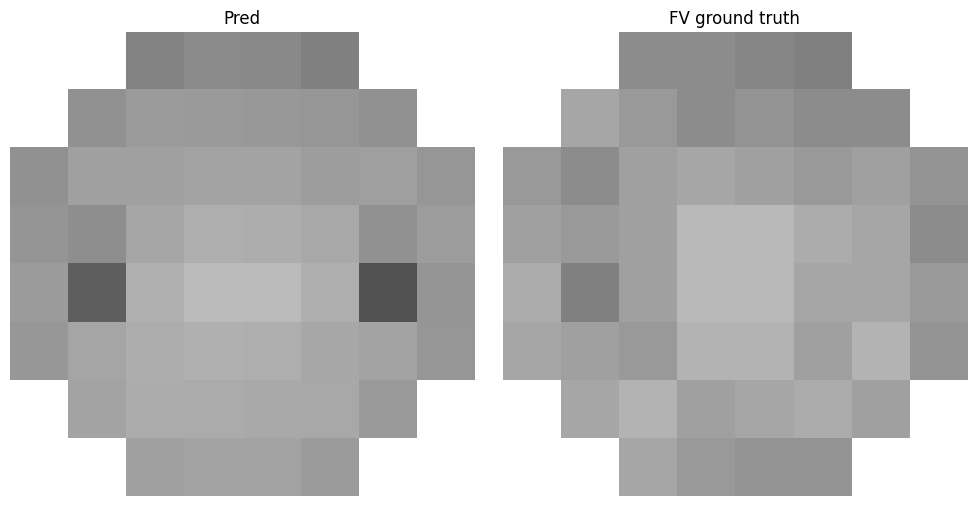

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3310379_predFV.jpg
check prd_type: 24.591345 float32 27 int64
check prd_type: 24 27 uint8
MAE : 2.507009506225586
MSE : 11.35941219329834
PSNR: 21.48764167215539
SSIM: 0.8556532114744186


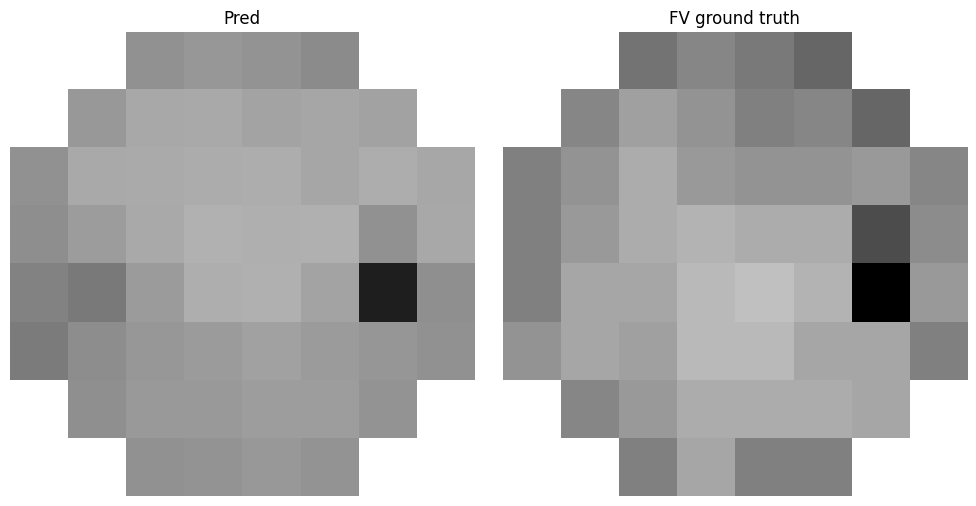

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2815145_L_predFV.jpg
check prd_type: 24.503704 float32 13 int64
check prd_type: 24 13 uint8
MAE : 4.573547840118408
MSE : 34.64167785644531
PSNR: 16.645210494344855
SSIM: 0.7240476906299591


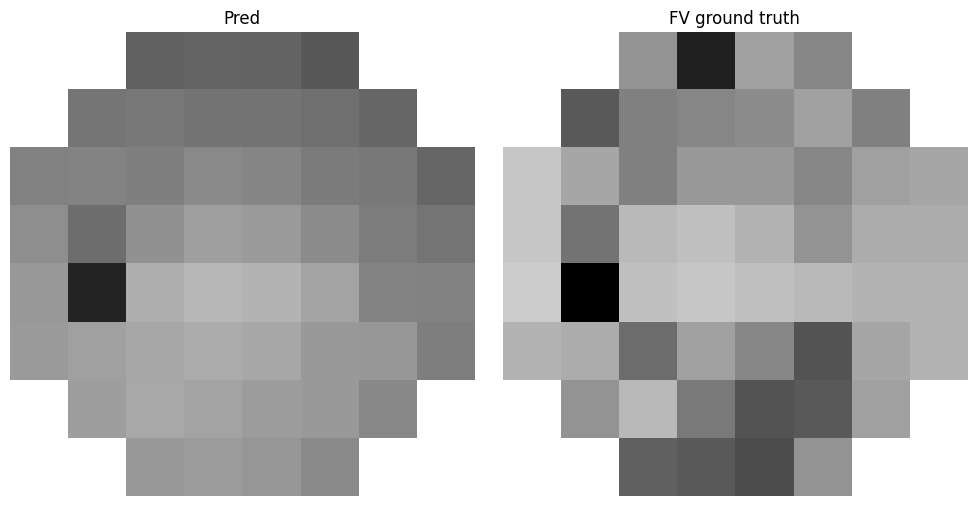

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/0268212_predFV.jpg
check prd_type: 23.488882 float32 27 int64
check prd_type: 23 27 uint8
MAE : 4.212281227111816
MSE : 32.012725830078125
PSNR: 16.987973365339442
SSIM: 0.71756312251091


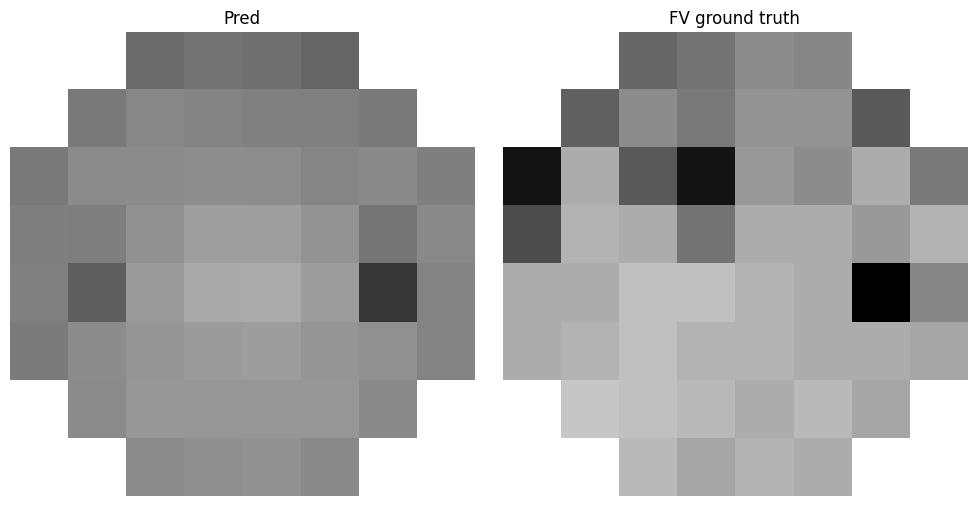

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/1935572_predFV.jpg
check prd_type: 28.969795 float32 25 int64
check prd_type: 28 25 uint8
MAE : 2.035402536392212
MSE : 7.514528274536133
PSNR: 23.282182270363894
SSIM: 0.9313933104276657


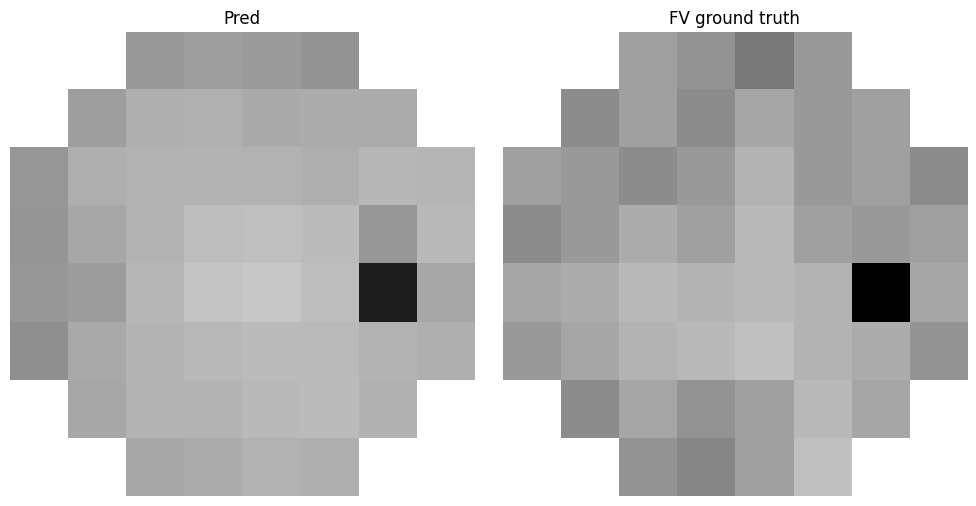

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/1310627_R_predFV.jpg
check prd_type: 25.133991 float32 25 int64
check prd_type: 25 25 uint8
MAE : 2.902578830718994
MSE : 17.534099578857422
PSNR: 19.602365118535182
SSIM: 0.838616132736206


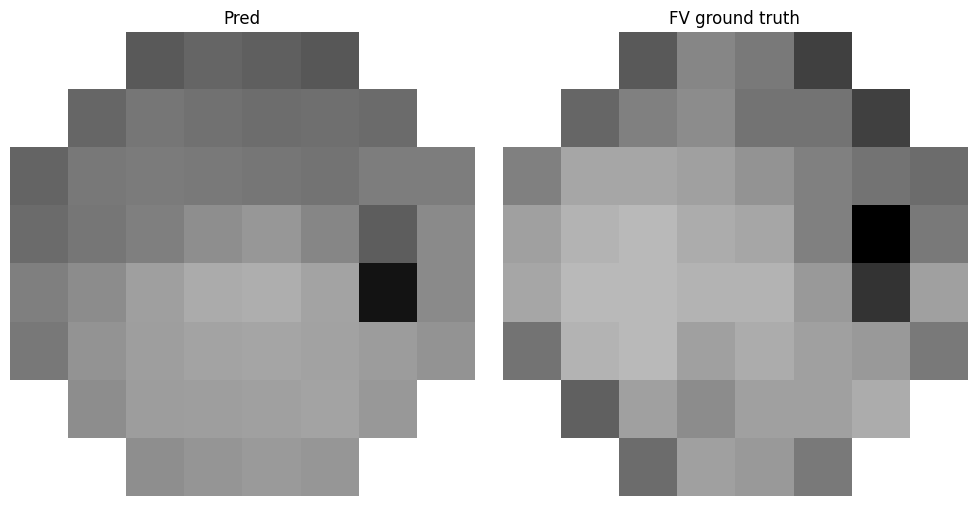

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/1342399_L_predFV.jpg
check prd_type: 22.672009 float32 24 int64
check prd_type: 22 24 uint8
MAE : 6.0580668449401855
MSE : 69.5733642578125
PSNR: 13.616769349878567
SSIM: 0.6472432017326355


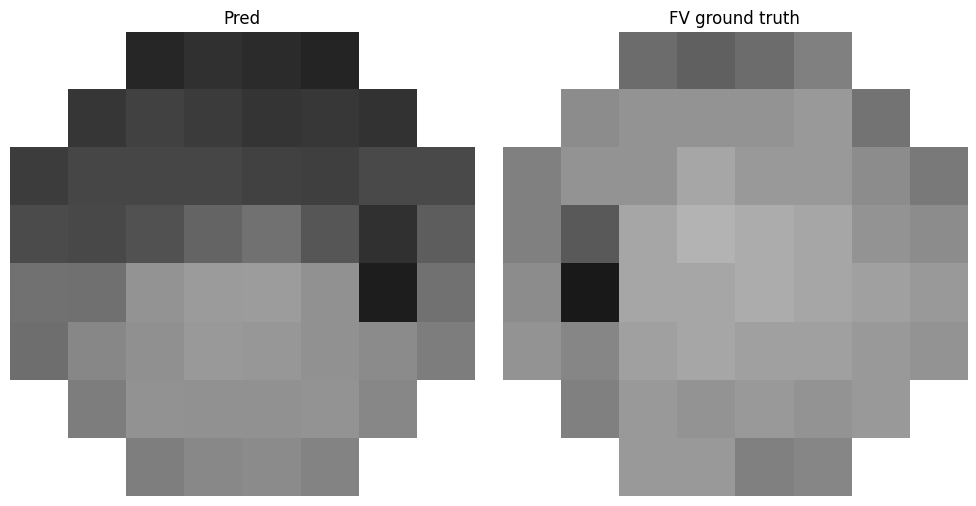

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/4154541_L_predFV.jpg
check prd_type: 23.726606 float32 17 int64
check prd_type: 23 17 uint8
MAE : 10.681225776672363
MSE : 199.58935546875
PSNR: 9.039826428174166
SSIM: 0.3964105471968651


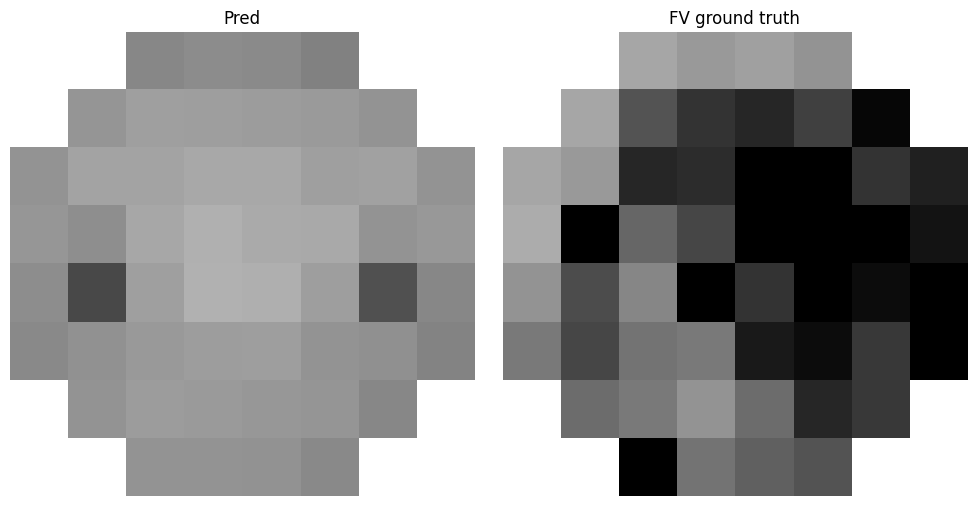

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3407174_predFV.jpg
check prd_type: 27.571148 float32 31 int64
check prd_type: 27 31 uint8
MAE : 2.6914827823638916
MSE : 15.903932571411133
PSNR: 20.026154689581315
SSIM: 0.7660740464925766


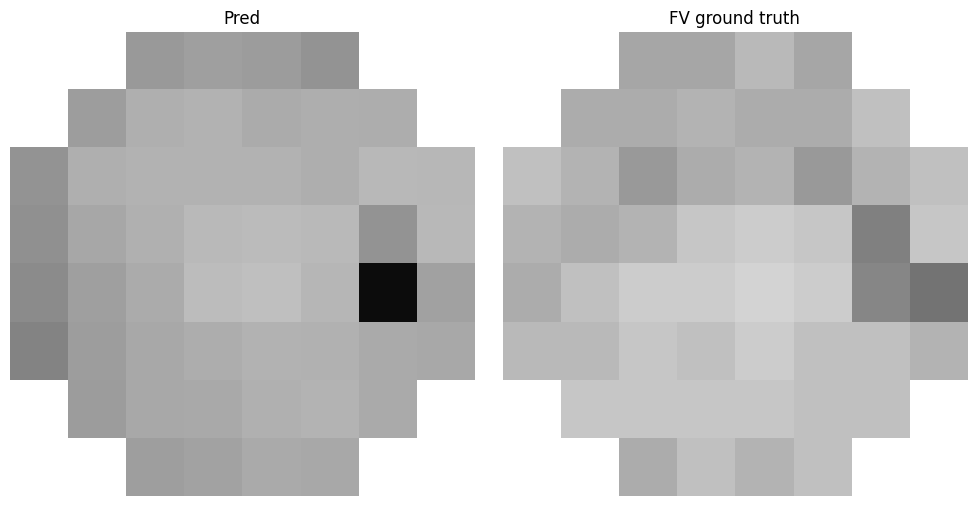

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3806920_predFV.jpg
check prd_type: 26.14814 float32 31 int64
check prd_type: 26 31 uint8
MAE : 2.99875807762146
MSE : 14.515680313110352
PSNR: 20.422826216553695
SSIM: 0.872062474489212


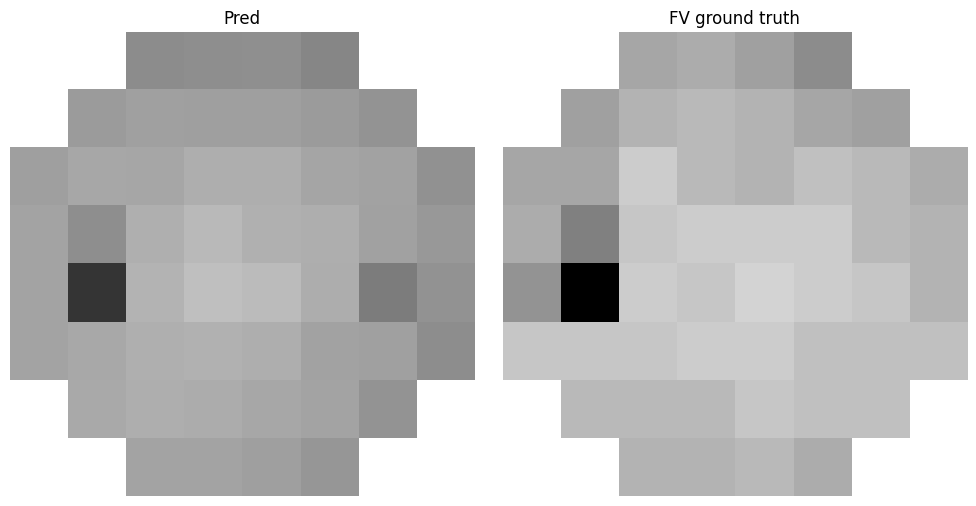

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2987599_predFV.jpg
check prd_type: 28.960403 float32 31 int64
check prd_type: 28 31 uint8
MAE : 2.0257272720336914
MSE : 11.594385147094727
PSNR: 21.398722253105802
SSIM: 0.8741263747215271


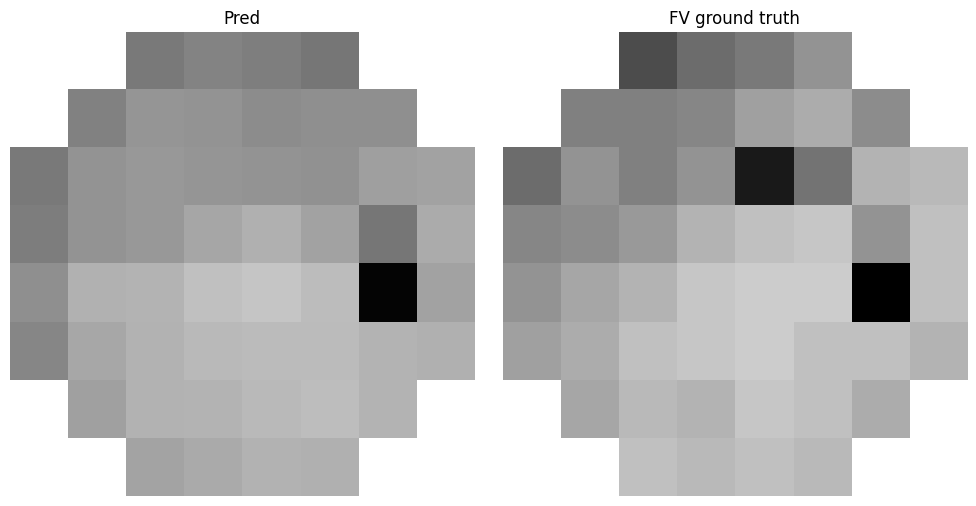

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/0849116_L_predFV.jpg
check prd_type: 23.564404 float32 25 int64
check prd_type: 23 25 uint8
MAE : 2.494615316390991
MSE : 11.50140380859375
PSNR: 21.433691351188617
SSIM: 0.8843694627285004


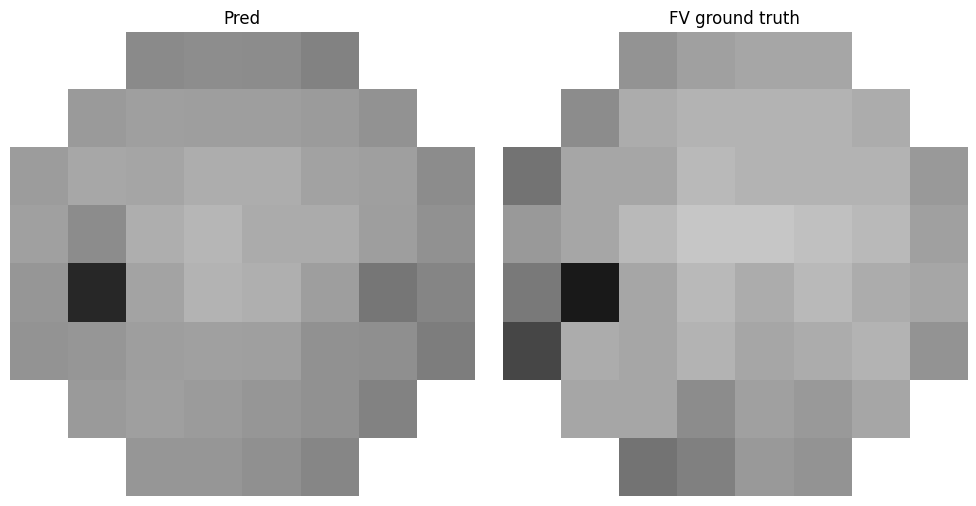

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/4475746_R_predFV.jpg
check prd_type: 24.87679 float32 29 int64
check prd_type: 24 29 uint8
MAE : 3.5249180793762207
MSE : 20.578651428222656
PSNR: 18.90703060144538
SSIM: 0.8345070034265518


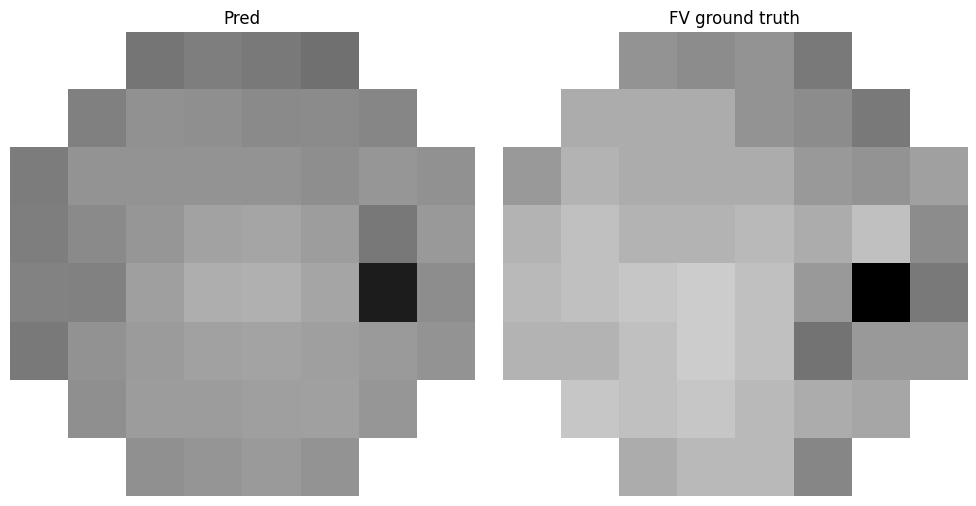

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2216002_predFV.jpg
check prd_type: 26.813694 float32 31 int64
check prd_type: 26 31 uint8
MAE : 3.1410727500915527
MSE : 19.732646942138672
PSNR: 19.08934652687424
SSIM: 0.7462015151977539


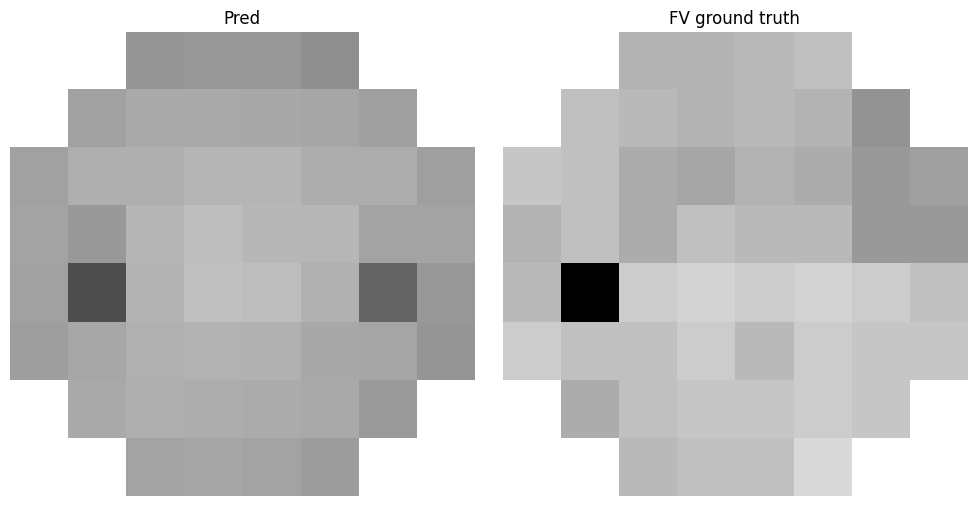

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/4154541_predFV.jpg
check prd_type: 26.945051 float32 27 int64
check prd_type: 26 27 uint8
MAE : 8.003215789794922
MSE : 146.59359741210938
PSNR: 10.380049479140837
SSIM: 0.5334164649248123


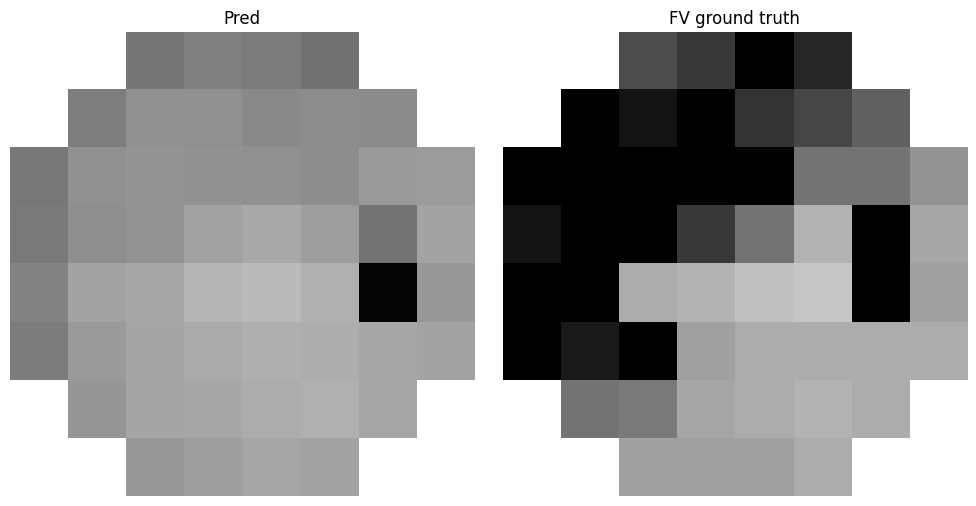

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3321454_L_predFV.jpg
check prd_type: 26.110733 float32 15 int64
check prd_type: 26 15 uint8
MAE : 2.1295268535614014
MSE : 11.351736068725586
PSNR: 21.490576875421738
SSIM: 0.8244876712560654


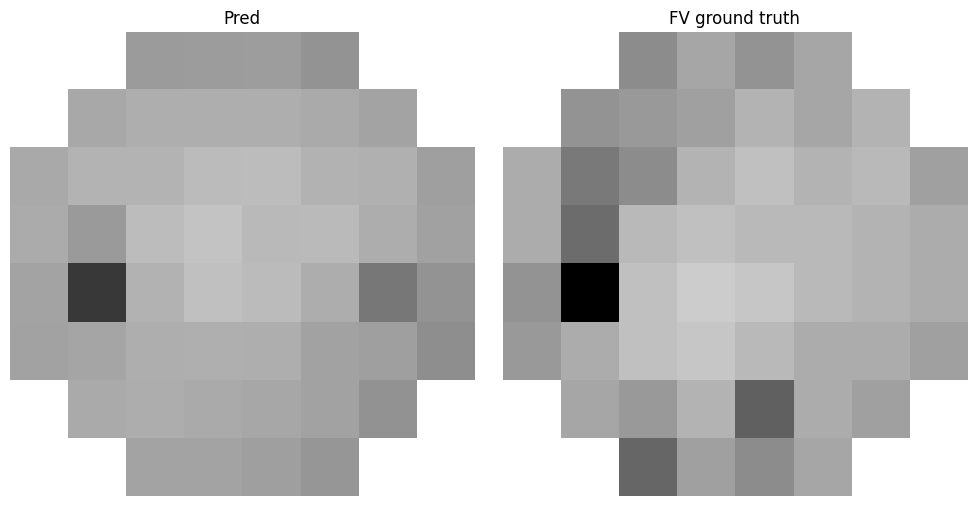

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2815145_predFV.jpg
check prd_type: 24.42819 float32 25 int64
check prd_type: 24 25 uint8
MAE : 4.911149024963379
MSE : 62.238372802734375
PSNR: 14.100617804509021
SSIM: 0.5289724767208099


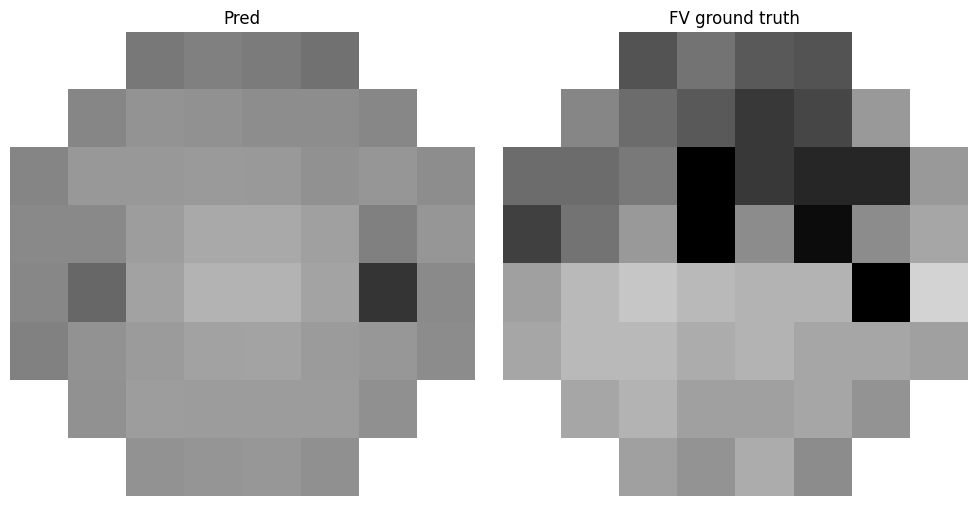

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2376139_R_predFV.jpg
check prd_type: 25.700504 float32 28 int64
check prd_type: 25 28 uint8
MAE : 2.4693408012390137
MSE : 11.432638168334961
PSNR: 21.459735562369
SSIM: 0.8718222826719284


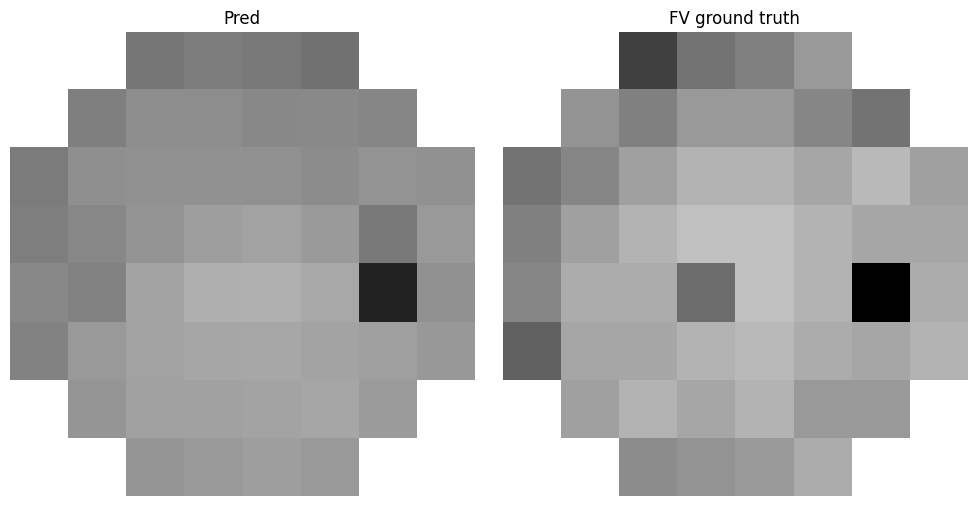

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3001867_predFV.jpg
check prd_type: 26.90031 float32 29 int64
check prd_type: 26 29 uint8
MAE : 2.5470309257507324
MSE : 10.9198637008667
PSNR: 21.65902785940899
SSIM: 0.8793185353279114


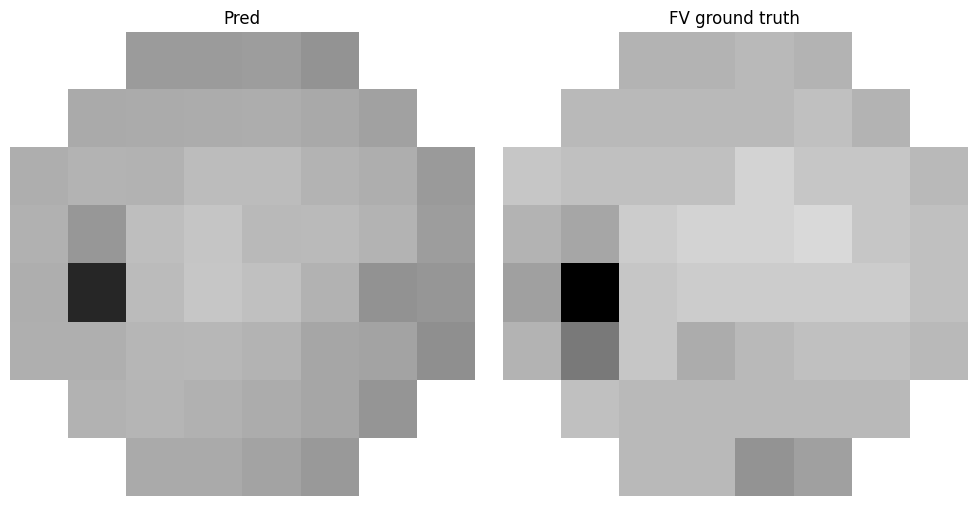

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/1935572_L_predFV.jpg
check prd_type: 26.19296 float32 26 int64
check prd_type: 26 26 uint8
MAE : 1.767295002937317
MSE : 5.729231357574463
PSNR: 24.460236101976193
SSIM: 0.9240117371082306


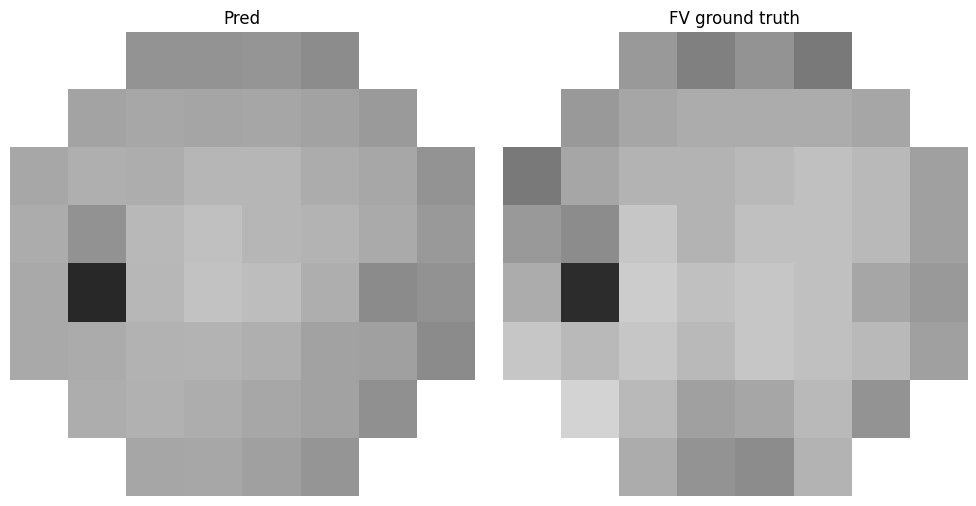

In [148]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, hausdorff_distance
from sklearn.metrics import mean_absolute_error, mean_squared_error

"""
以MSE越小，則PSNR越大；所以PSNR越大，代表著圖像質量越好。
PSNR高於40dB說明圖像質量極好（即非常接近原始圖像），
在30—40dB通常表示圖像質量是好的（即失真可以察覺但可以接受），
在20—30dB說明圖像質量差；
PSNR低於20dB圖像不可接受

peak_signal_noise_ratio:
data_rangeint, optional
The data range of the input image (distance between minimum and maximum possible values). By default, this is estimated from the image data-type.
int: 0 ~ 255
FV:  0 ~ 32 ??

SSIM具有對稱性，即SSIM(x,y)=SSIM(y,x)
SSIM是一個0到1之間的數，越大表示輸出圖像和無失真圖像的差距越小，即圖像質量越好。當兩幅圖像一模一樣時，SSIM=1；

2022-11-16
    目前看到範例中fv最大為32，但經過討論後把max_val(-->data_range)定為40。並重新跑數據。
    
    MAE 僅在sklearn.metrics，因此把MAE MSE都讓sklearn.metrics取用，其餘維持在skimage.
    
    MAE : 低
    MSE : 低
    PSNR: 高 >20dB ~ 30 ~ 40
    SSIM: 0~1高
    
2023-04-08
    Add np.clip() to rescale FV[0~40] to Gray[0~255].
    
"""

# points_train, points_val
for i in range(len(val_points_dict)): # Also use same val_dict to get the filename and ordering.
    # max_val = 40
    data_range = 40
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
    fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
    fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
    print("check filename:", fv_img_name)
    
    prd_p = reshape_FV_value_list(val_points_pred[i])
    gt_p = reshape_FV_value_list(points_val[i])
    
    #check single vale in the map
    print("check prd_type:", prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
    print("check prd_type:", prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4].dtype)

    # set value to float32
    prd_p = prd_p.astype(np.float32)
    gt_p  = gt_p.astype(np.float32)
    
    MAE   = mean_absolute_error(prd_p, gt_p)
    MSE   = mean_squared_error(prd_p, gt_p)
    PSNR  = peak_signal_noise_ratio(prd_p, gt_p, data_range=data_range)
    SSIM  = structural_similarity(prd_p, gt_p, full=False, data_range=data_range)
    #Hdis  = hausdorff_distance(prd_p, gt_p)
    
    print(f'MAE : {MAE}')  
    print(f'MSE : {MSE}')
    print(f'PSNR: {PSNR}')
    print(f'SSIM: {SSIM}') 
    #print(f'Hdis: {Hdis}') 
    
#     # Check prd/gt value, dtype
#     print(f'MAE : {mean_absolute_error(prd_p.astype(np.float32), gt_p.astype(np.float32))}')  
#     print(f'MSE : {mean_squared_error(prd_p.astype(np.float32), gt_p.astype(np.float32))}')                                             # dtype('float32') dtype('int64')
#     print(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.float32), gt_p.astype(np.float32), data_range=data_range)}')                 # astype(np.float32)
#     print(f'SSIM: {structural_similarity(prd_p.astype(np.float32), gt_p.astype(np.float32), full=False, data_range=data_range)}') 
    
    
#     # Test TF-SSIM and create a batch
#     prd_tmp = tf.image.convert_image_dtype(prd_p, tf.float32)
#     gt_tmp  = tf.image.convert_image_dtype(gt_p, tf.float32)
#     prd_tmp = tf.expand_dims(prd_tmp, 0)
#     gt_tmp  = tf.expand_dims(gt_tmp, 0)   
#     print(f'SSIM-tf: {tf.image.ssim(prd_tmp, gt_tmp, max_val=32, filter_size=1, filter_sigma=1.5, k1=0.01, k2=0.03)}')
#     print(f'SSIM-tf: {tf.image.ssim(tf.expand_dims(prd_p.astype(np.float32), 0), tf.expand_dims(gt_p.astype(np.float32), 0), max_val=32, filter_size=2, filter_sigma=1.5, k1=0.01, k2=0.03)}')
    
    
    
    # save metrics to _metrics.txt, commnet if not to rewrite the files.
    with open(fv_metrics_name, "w") as txt_file:
        txt_file.write(f'id:{val_points_dict_list[i][0]}.jpg\n')
        txt_file.write(f'MAE:{MAE}\n')
        txt_file.write(f'MSE:{MSE}\n')
        txt_file.write(f'PSNR:{PSNR}\n')
        txt_file.write(f'SSIM:{SSIM}')
        #txt_file.write(f'Hdis : {Hdis}\n')
        #txt_file.write("\n")
    
    fig, axarr = plt.subplots(1,2,figsize=(10,5))
    axarr[0].imshow(prd_p, interpolation='nearest', cmap="gray", vmin=0, vmax=40)
    axarr[0].set_title("Pred")
    axarr[0].axis('off')

    axarr[1].imshow(gt_p, interpolation='nearest', cmap="gray", vmin=0, vmax=40)
    axarr[1].set_title("FV ground truth")
    axarr[1].axis('off')
   
    fig.tight_layout()    
    plt.savefig(fv_img_name, dpi=150)
    plt.show()

In [149]:
# cheeck the model name/path
best_model.split("/")[0]

'best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune'

In [150]:
prd_p.dtype

dtype('float32')

In [151]:
gt_p.dtype

dtype('float32')

In [152]:
gt_p.astype(np.float32)

array([[40., 40., 24., 20., 23., 19., 40., 40.],
       [40., 24., 26., 27., 27., 27., 26., 40.],
       [19., 26., 28., 28., 29., 30., 29., 25.],
       [24., 22., 31., 28., 30., 30., 29., 25.],
       [27.,  7., 32., 30., 31., 30., 26., 24.],
       [31., 29., 31., 29., 31., 30., 29., 25.],
       [40., 33., 29., 25., 26., 29., 23., 40.],
       [40., 40., 27., 23., 22., 28., 40., 40.]], dtype=float32)

### Check FV rescale to [0~255] by no.clip()

In [153]:
# Copy form the above code #

# points_train, points_val
for i in range(len(val_points_dict)): # Also use same val_dict to get the filename and ordering.
    # max_val = 40
    data_range = 40
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
    fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
    fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
    print("check filename:", fv_img_name)
    
    prd_p = reshape_FV_value_list(val_points_pred[i])
    gt_p = reshape_FV_value_list(points_val[i])
    
    #check single vale in the map
    print("check prd_type:", prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
    print("check prd_type:", prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4].dtype)

    # set value to float32
    prd_p = prd_p.astype(np.float32)
    gt_p  = gt_p.astype(np.float32)

check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3602493_L_predFV.jpg
check prd_type: 24.380142 float32 29 int64
check prd_type: 24 29 uint8
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2099276_predFV.jpg
check prd_type: 22.86304 float32 26 int64
check prd_type: 22 26 uint8
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3602493_predFV.jpg
check prd_type: 25.06796 float32 27 int64
check prd_type: 25 27 uint8
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/1545959_predFV.jpg
check prd_type: 25.940172 float32 25 int64
check prd_type: 25 25 uint8
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/3167782_predFV.jpg
check prd_type: 29.33054 float32 28 int64
check prd_type: 29 28 uint8
check filename: best_my_model_20231110_bs8_CDR3_efnv2B0_normalize01only_finetune/2216002_R_predFV.jpg
check prd_type: 26.624638 float32 31 int64
c

# 🔰💹📊📈🧮 Plot linear correlation of prd/gt FV value 🔰💹📊📈🧮

### Plot linear correlation of prd/gt FV value

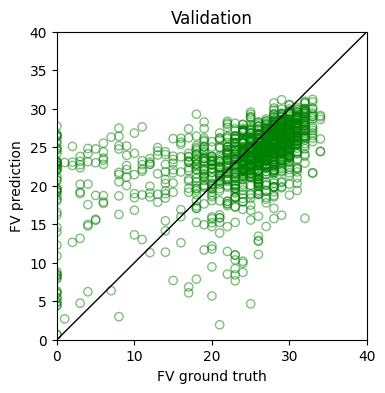

In [154]:
# Copy form the above code too #

# FV val

plt.figure(figsize=(4, 4))
plt.plot([0, 40], [0, 40], color='black', linewidth=1.0)
plt.axis([0, 40, 0, 40])    
plt.ylabel("FV prediction")
plt.xlabel("FV ground truth")
plt.title("Validation")

# points_train, points_val
for i in range(len(val_points_dict)): # Also use same val_dict to get the filename and ordering.
    # max_val = 40
    data_range = 40
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
#     fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
#     fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
#     print("check filename:", fv_img_name)
    
#     prd_p = reshape_FV_value_list(val_points_pred[i])
#     gt_p = reshape_FV_value_list(points_val[i])
    
#     #check single vale in the map
#     print("check prd_type:", prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
#     print("check prd_type:", prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4].dtype)

#     # set value to float32
#     prd_p = prd_p.astype(np.float32)
#     gt_p  = gt_p.astype(np.float32)
    
    plt.scatter(x=points_val[i].astype(np.float32), y=val_points_pred[i].astype(np.float32), edgecolors='g', facecolors='none', alpha=0.5)


plt.show()

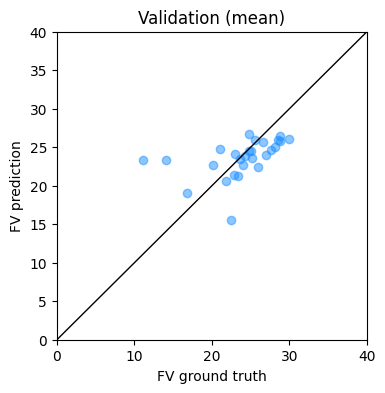

In [155]:
# Copy form the above code too # Mean

# FV val

plt.figure(figsize=(4, 4))
plt.plot([0, 40], [0, 40], color='black', linewidth=1.0)
plt.axis([0, 40, 0, 40])    
plt.ylabel("FV prediction")
plt.xlabel("FV ground truth")
plt.title("Validation (mean)")

# points_train, points_val
for i in range(len(val_points_dict)): # Also use same val_dict to get the filename and ordering.
    # max_val = 40
    data_range = 40
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
#     fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
#     fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
#     print("check filename:", fv_img_name)
    
#     prd_p = reshape_FV_value_list(val_points_pred[i])
#     gt_p = reshape_FV_value_list(points_val[i])
    
#     #check single vale in the map
#     print("check prd_type:", prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
#     print("check prd_type:", prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4].dtype)

#     # set value to float32
#     prd_p = prd_p.astype(np.float32)
#     gt_p  = gt_p.astype(np.float32)
    
    plt.scatter(x=np.mean(points_val[i].astype(np.float32)), y=np.mean(val_points_pred[i].astype(np.float32)), c="dodgerblue", alpha=0.5)


plt.show()

### Train

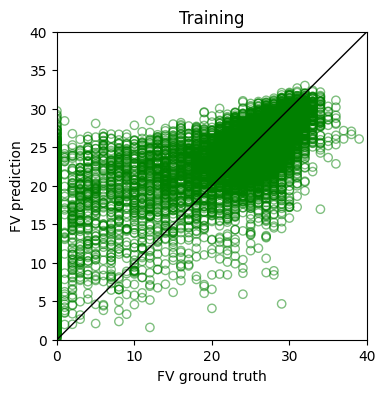

In [156]:
# FV train

# train_points_pred

train_points_dict = get_points_dict("FV_image_value_1005_train.csv")


plt.figure(figsize=(4, 4))
plt.plot([0, 40], [0, 40], color='black', linewidth=1.0)
plt.axis([0, 40, 0, 40])    
plt.ylabel("FV prediction")
plt.xlabel("FV ground truth")
plt.title("Training")

# points_train, points_val
for i in range(len(train_points_dict)): # Also use same val_dict to get the filename and ordering.
    # max_val = 40
    data_range = 40
    
    # get the filename from val dict
    train_points_dict_list = list(train_points_dict.items())
#     fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
#     fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
#     print("check filename:", fv_img_name)
    
#     prd_p = reshape_FV_value_list(val_points_pred[i])
#     gt_p = reshape_FV_value_list(points_val[i])
    
#     #check single vale in the map
#     print("check prd_type:", prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
#     print("check prd_type:", prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4].dtype)

#     # set value to float32
#     prd_p = prd_p.astype(np.float32)
#     gt_p  = gt_p.astype(np.float32)
    
    plt.scatter(x=points_train[i].astype(np.float32), y=train_points_pred[i].astype(np.float32), edgecolors='g', facecolors='none', alpha=0.5)


plt.show()

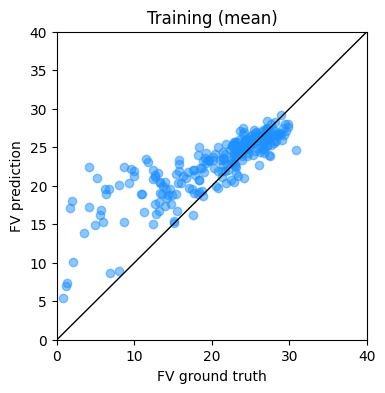

In [157]:
# FV train

# train_points_pred

train_points_dict = get_points_dict("FV_image_value_1005_train.csv")


plt.figure(figsize=(4, 4))
plt.plot([0, 40], [0, 40], color='black', linewidth=1.0)
plt.axis([0, 40, 0, 40])    
plt.ylabel("FV prediction")
plt.xlabel("FV ground truth")
plt.title("Training (mean)")

# points_train, points_val
for i in range(len(train_points_dict)): # Also use same val_dict to get the filename and ordering.
    # max_val = 40
    data_range = 40
    
    # get the filename from val dict
    train_points_dict_list = list(train_points_dict.items())
#     fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
#     fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
#     print("check filename:", fv_img_name)
    
#     prd_p = reshape_FV_value_list(val_points_pred[i])
#     gt_p = reshape_FV_value_list(points_val[i])
    
#     #check single vale in the map
#     print("check prd_type:", prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
#     print("check prd_type:", prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4].dtype)

#     # set value to float32
#     prd_p = prd_p.astype(np.float32)
#     gt_p  = gt_p.astype(np.float32)
    
    plt.scatter(x=np.mean(points_train[i].astype(np.float32)), y=np.mean(train_points_pred[i].astype(np.float32)), c="dodgerblue", alpha=0.5)


plt.show()

# 💹 New test 14 💹

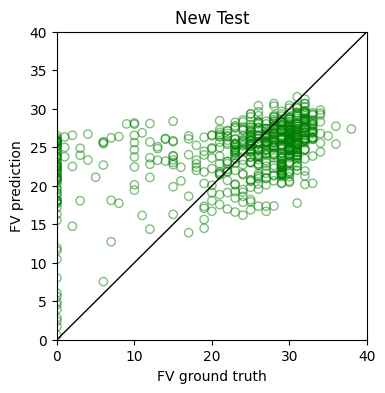

In [158]:
# FV train

# train_points_pred

test_points_dict = get_points_dict("FV_image_value_2023_new_test14.csv")


plt.figure(figsize=(4, 4))
plt.plot([0, 40], [0, 40], color='black', linewidth=1.0)
plt.axis([0, 40, 0, 40])    
plt.ylabel("FV prediction")
plt.xlabel("FV ground truth")
plt.title("New Test")

# points_train, points_val
for i in range(len(test_points_dict)): # Also use same val_dict to get the filename and ordering.
    # max_val = 40
    data_range = 40
    
    # get the filename from val dict
    test_points_dict_list = list(test_points_dict.items())
#     fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
#     fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
#     print("check filename:", fv_img_name)
    
#     prd_p = reshape_FV_value_list(val_points_pred[i])
#     gt_p = reshape_FV_value_list(points_val[i])
    
#     #check single vale in the map
#     print("check prd_type:", prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
#     print("check prd_type:", prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4].dtype)

#     # set value to float32
#     prd_p = prd_p.astype(np.float32)
#     gt_p  = gt_p.astype(np.float32)
    
    plt.scatter(x=points_test[i].astype(np.float32), y=test_points_pred[i].astype(np.float32), edgecolors='g', facecolors='none', alpha=0.5)


plt.show()

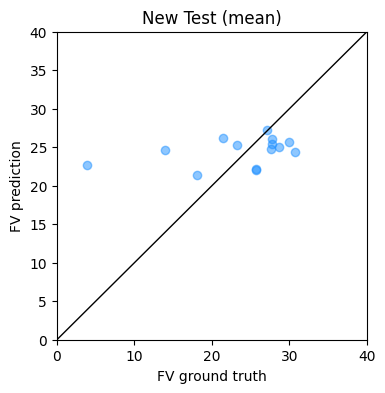

In [159]:
# FV train

# train_points_pred

train_points_dict = get_points_dict("FV_image_value_1005_train.csv")


plt.figure(figsize=(4, 4))
plt.plot([0, 40], [0, 40], color='black', linewidth=1.0)
plt.axis([0, 40, 0, 40])    
plt.ylabel("FV prediction")
plt.xlabel("FV ground truth")
plt.title("New Test (mean)")

# points_train, points_val
for i in range(len(test_points_dict)): # Also use same val_dict to get the filename and ordering.
    # max_val = 40
    data_range = 40
    
    # get the filename from val dict
    test_points_dict_list = list(test_points_dict.items())
#     fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
#     fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
#     print("check filename:", fv_img_name)
    
#     prd_p = reshape_FV_value_list(val_points_pred[i])
#     gt_p = reshape_FV_value_list(points_val[i])
    
#     #check single vale in the map
#     print("check prd_type:", prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
#     print("check prd_type:", prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4].dtype)

#     # set value to float32
#     prd_p = prd_p.astype(np.float32)
#     gt_p  = gt_p.astype(np.float32)
    
    plt.scatter(x=np.mean(points_test[i].astype(np.float32)), y=np.mean(test_points_pred[i].astype(np.float32)), c="dodgerblue", alpha=0.5)


plt.show()

##### plot temp



[2023-04-08] 不太集中，重新訓練一次較長時間看看。

### basic FC net

[20230410] Model: "KPR-model102" loss="mae"

    單純的卷積網路對disc位置預測不佳，多數直接預測為兩個disc位置，不符合現實。
    
    但目前densenet/movilenet，對輸入都有限制，需要多加入dense層來重新reshape輸出，是否會破壞學習則未知。


`train/test` model Ｄensent loss="mean_absolute_percentage_error" 無法學習



`train/test` model 102 with more dense 512 1e-1 (too large nana can not train)

`train/test` model 102 with more dense 512 1e-2



`train/test` model 102 with more dense 512 1e-3 best epoch 31

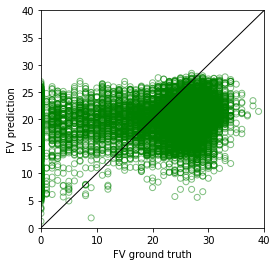
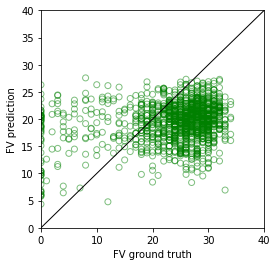

`train/test` model 101 1e-3

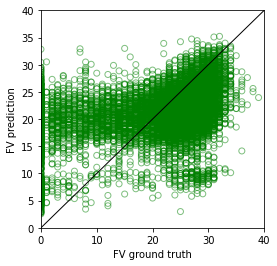 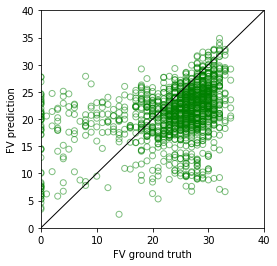


### densenet

`train``val` 

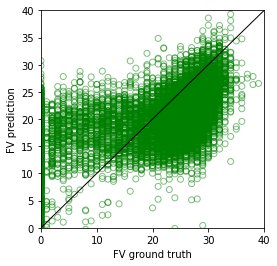 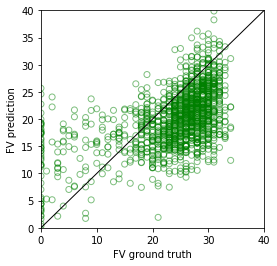

In [160]:
points_val[0]

array([ 3,  8, 18, 10, 24, 23,  3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26,
       23, 25, 14, 28, 30, 29, 28, 25, 20, 29,  0, 10, 31, 31, 29, 28, 23,
       27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25,
       24])

In [161]:
points_val[0].astype(np.uint8),

(array([ 3,  8, 18, 10, 24, 23,  3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26,
        23, 25, 14, 28, 30, 29, 28, 25, 20, 29,  0, 10, 31, 31, 29, 28, 23,
        27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25,
        24], dtype=uint8),)

In [162]:
val_points_pred[0]

array([20.173597, 20.51268 , 20.479477, 18.97714 , 22.852386, 23.47967 ,
       23.167583, 23.105314, 22.56886 , 21.21342 , 23.75574 , 24.843454,
       24.426321, 25.770027, 25.590391, 23.994127, 23.452314, 20.570011,
       24.824842, 20.820429, 26.323282, 27.877253, 26.42822 , 25.707943,
       23.674582, 21.69364 , 24.380903,  6.044448, 26.832506, 28.873077,
       28.088326, 25.522427, 19.88778 , 21.07837 , 24.319805, 24.702696,
       25.850147, 26.334373, 25.872978, 23.672712, 23.301264, 20.160366,
       25.030628, 25.955301, 25.38189 , 24.380142, 23.710754, 21.115833,
       24.157782, 24.329369, 23.429   , 21.643934], dtype=float32)

In [163]:
val_points_pred[0].astype(np.uint8)

array([20, 20, 20, 18, 22, 23, 23, 23, 22, 21, 23, 24, 24, 25, 25, 23, 23,
       20, 24, 20, 26, 27, 26, 25, 23, 21, 24,  6, 26, 28, 28, 25, 19, 21,
       24, 24, 25, 26, 25, 23, 23, 20, 25, 25, 25, 24, 23, 21, 24, 24, 23,
       21], dtype=uint8)

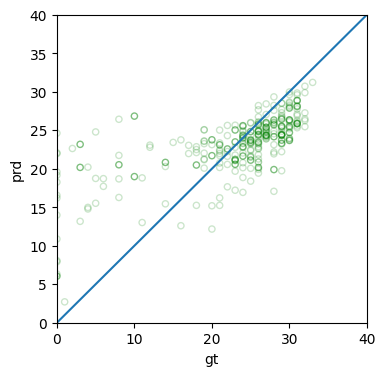

In [164]:
plt.figure(figsize=(4, 4))
plt.scatter(x=points_val[0].astype(np.float32), y=val_points_pred[0].astype(np.float32), s=20, edgecolors='g', facecolors='none', alpha=0.5)
plt.scatter(x=points_val[1:5].astype(np.float32), y=val_points_pred[1:5].astype(np.float32), s=20, edgecolors='g', facecolors='none', alpha=0.2)
plt.plot([0, 40], [0, 40])
plt.axis([0, 40, 0, 40])    
plt.ylabel("prd")
plt.xlabel("gt")
plt.show()

In [165]:
np.random.randn(60) 

array([ 0.37175101, -1.54753828, -1.90064373,  0.37100378,  0.04203525,
       -0.47227381,  0.28396527, -0.91503424, -0.25191099,  0.15054105,
        0.51417703,  0.00859686, -1.88009779, -0.20033303, -0.99696782,
        0.94364156, -0.46307135,  0.02831549,  0.24596816,  0.27207902,
       -0.3558087 ,  0.83556722,  0.70944925, -0.02711066, -1.05855642,
       -0.41264401, -0.95747565, -0.58594797, -0.43655955,  0.42009489,
       -0.58851345,  0.0328904 ,  1.48719255,  0.64382344,  0.99208239,
       -0.75944415,  0.07790887,  0.98778865, -0.69371357, -1.50767603,
       -0.12300342,  0.21376831, -0.23592999,  0.61209398, -0.81300209,
       -0.37985284, -1.66813689, -1.56354602, -0.19882888, -2.18353583,
       -0.54120557, -1.57657089,  0.7111767 ,  0.07851258,  0.7813051 ,
       -1.67892414,  0.04383023, -0.11430052, -1.13951228,  0.92495612])

In [166]:
[STOP HERE]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2586411138.py, line 1)

## Summary fv_img_name, metrics to a CSV
    2022-11-16
    for later ploting box_plot

In [ ]:
scan_dir_path = best_model.split("/")[0]
metric_path_list = sorted(glob.glob(scan_dir_path + "/*_metrics.txt"))


def get_metrics_dict(met_file):
    met_dict = {}
    with open(met_file, "r") as f:        
        #metrics = f.read()
        #metrics_list = metrics.split("\n")
        #print(metrics_list)
        #print(metrics_list[2])
        
        for line in f:
            line = line.replace("\n", "")
            (key, val) = line.split(":")
            print(key, val)
            if key == "id":
                met_dict[key] = val
            else:
                met_dict[key] = float(val)
    
    return met_dict


row_pd_list =[]  
for met_file in metric_path_list:
    print("Check :", met_file)
    image_id = met_file.split("/")[1].replace("_metrics.txt", ".jpg")
    print('check :', image_id)
    
    
    d = get_metrics_dict(met_file)
    
#     met_pd = pd.DataFrame.from_dict(d, orient='index')

 
    row_pd_dict = {}  
    row_pd_dict.update(d)
    row_pd_list.append(row_pd_dict)
    
met_df = pd.DataFrame(row_pd_list)    
met_df.to_csv(scan_dir_path + "/" + scan_dir_path + ".csv", index=False)

#     for key in ['MAE', 'MSE', 'PSNR', 'SSIM']:
#         print("Where am I.", key)
#         # key = col_name, # df = pd.DataFrame(columns=['index','value','label','notation'])
#         row_pd_dict = {}  
#         row_pd_dict.update({'index': index, 'value': measures[key],'mertics':key,'notation':with_without[img_n]})
#         row_pd_list.append(row_pd_dict)
#         index += 1      


# row_pd_list =[]     
#     # get random 8 string
# #     story_title = get_random_4k88()
#     story_title = get_ordered_story(word_list)

#     # create w/wo image pair
#     create_WWO_zy_image(story_title, p)
#     # WER running
#     for img_n in [0,1]: 

#         # ocr the image, return measure metrics #
#         txts=run_ocr_on_conf_img(pdocr_model=pdocr_model, img_n=img_n)
#         print(txts)
#         paint_txts_with_simple_color_im(txts)

#         measures=run_jiwer_conf_img(story_title, txts, len_of_gt)
#         #print(measures)
        
#         for key in ['precision', 'recall', 'F-score']:
#             print("Where am I.", key)
#             # key = col_name, # df = pd.DataFrame(columns=['index','value','label','notation'])
#             row_pd_dict = {}  
#             row_pd_dict.update({'index': index, 'value': measures[key],'mertics':key,'notation':with_without[img_n]})
#             row_pd_list.append(row_pd_dict)
#             index += 1
    
#         plot_metrics_PRF_conf(measures,metric_name)
    
# test_100_df = pd.DataFrame(row_pd_list)    
# test_100_df.to_csv(scan_dir_path + "/" + scan_dir_path + ".csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# met_df = pd.read_csv("best_my_model_1006_bs2_p0_e200_FixedShuffle/best_my_model_1006_bs2_p0_e200_FixedShuffle.csv")
met_df = pd.read_csv("best_my_model_1006_bs32_p0_e200_FixedShuffle/best_my_model_1006_bs32_p0_e200_FixedShuffle.csv")

In [ ]:
met_df

In [ ]:
met_df.index

In [ ]:
# indx = met_df.index.tolist()

In [ ]:
# indx

    MAE : 低
    MSE : 低
    PSNR: 高 >20dB ~ 30 ~ 40
    SSIM: 高 0~1

In [ ]:
"""SSIM高 PSNR高 符合常理
"""
met_df.plot(x = 'PSNR', y = "SSIM" , kind = 'scatter')
plt.title("PSNR vs SSIM")
plt.show()

In [ ]:
"""MSE小 PSNR高 符合常理
"""
met_df.plot(x = 'PSNR', y = "MSE" , kind = 'scatter')
plt.title("PSNR vs MSE")
plt.show()

In [ ]:
"""MAE 與 MSE 為 正比例關係 符合常理
"""
met_df.plot(x = 'MAE', y = "MSE" , kind = 'scatter')
plt.title("MAE vs MSE")
plt.show()

In [ ]:
"""SSIM高 MSE低 符合常理
"""
met_df.plot(x = 'SSIM', y = "MSE" , kind = 'scatter')
plt.title("SSIM vs MSE")
plt.show()

In [ ]:
"""SSIM高 MAE低 符合常理
"""
met_df.plot(x = 'SSIM', y = "MAE" , kind = 'scatter')
plt.title("SSIM vs MAE")
plt.show()

## dispay pred_FV_value as 3D
    https://matplotlib.org/2.0.2/examples/mplot3d/contourf3d_demo.html
    
    sudo ip3 install ipympl

In [ ]:
# test mesh grid

nx, ny = (8, 8)
x = np.linspace(0, 7, nx)
y = np.linspace(0, 7, ny)

xv, yv = np.meshgrid(x, y, indexing='xy')



# for i in range(nx):
#     for j in range(ny):
#     # treat xv[j,i], yv[j,i]
#         print(xv[j,i], yv[j,i])
        
        

In [ ]:
xv

In [ ]:
xv.shape

In [ ]:
plt.imshow(xv, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig) # Axes3D(fig) adding itself to the figure is deprecated since 3.4.


# surface of val
X, Y, Z = xv, yv, reshape_FV_value_list(points_val[0])
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.3)

# surface of pred
X, Y, Z = xv, yv, reshape_FV_value_list(val_points_pred[0])
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.3,  color="red")

# contourf
# cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)

# project contour
# cset = ax.contour(X, Y, Z, zdir='z', offset=-0, cmap=cm.coolwarm)
# cset = ax.contour(X, Y, Z, zdir='x', offset=-0, cmap=cm.coolwarm)


# ax.clabel(cset, fontsize=9, inline=1)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# re-write the FV2Map (8x8) image code to a Function
2023-02-18

    1. 僅使用reshape_FV_value_list() 把52個fv值，mapping到8x8陣列。
    2. 直接將8x8 array save as image.
    
    3. 因爲缺少輸出一致檔名，修改load_imgs_and_keypoints() 增加fiilename回傳值。
        imgs_train, points_train, filename_train = load_imgs_and_keypoints("FV_image_value_1005_train.csv")
        imgs_val, points_val, filename_val = load_imgs_and_keypoints("FV_image_value_1005_val.csv")


    4. 不是plt繪圖，應該是直接把FV2Map_8x8 的array存成圖片
        
        `https://www.delftstack.com/howto/numpy/save-numpy-array-as-image/`
        Use the Image.fromarray() Function to Save a NumPy Array as an Image
        Use the imageio.imwrite() Function to Save a NumPy Array as an Image
        Use the matplotlib.pyplot.imsave() Function to Save a NumPy Array as an Image
        Use the cv2.imwrite() Function to Save a NumPy Array as an Image
        
        

    Q: 只有8x8 64個pixel是否適合訓練cGAN???
    
    Q:若放大倍數？ 但不內插！


In [ ]:
filename_val

In [ ]:
points_val[0]

In [ ]:
reshape_fv = reshape_FV_value_list(points_val[0]).astype(np.uint8)
print(reshape_fv.shape, reshape_fv.dtype) # need to uint8 not the int64

In [ ]:
reshape_fv

In [ ]:
print(reshape_fv)

In [ ]:
plt.imshow(reshape_fv, cmap="gray")
plt.savefig('FV2Map_8x8.jpg', dpi=150)
plt.show()

In [ ]:


test_arr = [[ 0  0 19 18 18 20  0  0]
 [ 0 19 23 25 23 20 20  0]
 [20 21 23 23 24 26 19 22]
 [24 20 27 28 27 24 21 24]
 [25 11 27 30 29 26 14 24]
 [23 27 27 27 28 27 26 23]
 [ 0 26 30 27 26 26 26  0]
 [ 0  0 28 25 25 22  0  0]]






In [ ]:
# Use the Image.fromarray() Function to Save a NumPy Array as an Image
from PIL import Image

# array = np.arange(0, 100, 1, np.uint8)
# array = np.reshape(array, (10, 10))
# print(array.shape)

im = Image.fromarray(reshape_fv) # 存起來的影像 不正確
im.save("FV2Map_8x8_PIL.jpg")

In [ ]:
#read the image
im = plt.imread("FV2Map_8x8_PIL.jpg")

#show image
plt.imshow(im, cmap='gray')

In [ ]:
# Use the cv2.imwrite() Function to Save a NumPy Array as an Image

cv2.imwrite('FV2Map_8x8_cv2.jpg', reshape_fv) # 存起來影像正確 但scale變得偏暗一點？？

#read the image
im = plt.imread("FV2Map_8x8_cv2.jpg")
#show image
plt.imshow(im, cmap='gray')

In [ ]:
# Use the matplotlib.pyplot.imsave() Function to Save a NumPy Array as an Image

plt.imsave('FV2Map_8x8_plt.jpg', reshape_fv, cmap='gray') #, dpi=300) default dpi=100



In [ ]:
#read the image
im = plt.imread("FV2Map_8x8_plt.jpg")
#show image
plt.imshow(im, cmap='gray')

In [ ]:
# 試著放大尺寸，畢竟8x8太小了，但設定figsize只是控制plt顯示變大，實際仍然是8x8!! 要plt顯示大後另外存savefig
plt.figure(figsize=(10,10), frameon = False)

# savefig
plt.imshow(reshape_fv, cmap="gray")
plt.savefig('FV2Map_8x8_plt-savefig.jpg')
# plt.show() 


In [ ]:
#read the image
im = plt.imread("FV2Map_8x8_plt-savefig.jpg")
#show image
plt.imshow(im, cmap='gray')

### Try this： 等比例放大8x8像素至NXN影像大小

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sin, cos = np.sin, np.cos

fig = plt.figure(frameon = False)
fig.set_size_inches(5, 8)
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_axis_off()
fig.add_axes(ax)

x = np.linspace(-4, 4, 20)
y = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(x, y)
deg = np.arctan(Y**3-3*Y-X)
plt.quiver(X, Y, cos(deg), sin(deg), pivot='tail', units='dots', color='red')
plt.savefig('plt_savefig_test.png', dpi=200)

In [ ]:
# work!
"""
2023-02-21 
gradio用VM開啟的服務，同樣可以用imshow savefig來繪圖存檔！！！
"""


In [ ]:
# work!
fig = plt.figure(frameon = False)
fig.set_size_inches(5, 5)
ax = plt.Axes(fig, [0., 0., 1., 1.], ) # 這個ax設定可以移除白邊 but donot know why!? 但可方便估計輸出尺寸！！！
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(reshape_fv, cmap="gray")

plt.savefig('plt_savefig_test_ax1.png', dpi=200)

# set_size_inches(5,5) 五寸 X dpi 200 = 1000x1000 pixel


In [ ]:
# work! 公式化

def save_resized_fv8x8map(reshape_fv, out_filename, size_inches=5, dpi=100):
    """ 5 inch x 100 dpi = 500 pixels """
    
    fig = plt.figure(frameon = False)
    fig.set_size_inches(size_inches, size_inches)
    ax = plt.Axes(fig, [0., 0., 1., 1.], ) # 這個ax設定可以移除白邊 but donot know why!? 但可方便估計輸出尺寸！！！
    ax.set_axis_off()
    fig.add_axes(ax)

    plt.imshow(reshape_fv, cmap="gray")

    plt.savefig(out_filename, dpi=dpi)

save_resized_fv8x8map(reshape_fv, 'plt_savefig_test_ax1_fun.png', )

In [ ]:
# # work! also! but better and clean!

plt.figure(figsize=(5,5)) # 但是儲存的尺寸就不好估計了，變成755x755 不是5x200 =100了，自動切掉pad!


plt.axis('off')

plt.imshow(reshape_fv, cmap="gray")

plt.savefig('plt_savefig_test_ax2.png', dpi=200, bbox_inches='tight', pad_inches=0)

## Now let's do FV2Map images.

save to ./FV2Map_8x8_images/

In [ ]:
for item in [filename_val, points_val, filename_train, points_train]:
    print(len(item))
    
# len(filename_val)
# len(points_val)

# reshape_fv = reshape_FV_value_list(points_val[0]).astype(np.uint8)

In [ ]:
for i, filename in enumerate(filename_val):
    print(i, filename)
    out_fileneme = filename + ".png"
    out_savepath = './FV2Map_8x8_images/val/' + out_fileneme
    reshape_fv = reshape_FV_value_list(points_val[i]).astype(np.uint8)
    save_resized_fv8x8map(reshape_fv, out_savepath, )

In [ ]:
for i, filename in enumerate(filename_train):
    print(i, filename)
    out_fileneme = filename + ".png"
    out_savepath = './FV2Map_8x8_images/train/' + out_fileneme
    reshape_fv = reshape_FV_value_list(points_train[i]).astype(np.uint8)
    save_resized_fv8x8map(reshape_fv, out_savepath, )

## Zip it up!

In [ ]:
!cp FV_image_value_1005_*.csv FV2Map_8x8_images/

In [ ]:
!zip -r FV2Map_8x8_images.zip FV2Map_8x8_images/

## Check the FV2Map output is correct!

filename_train[1] '3167782_L'

points_train[1]

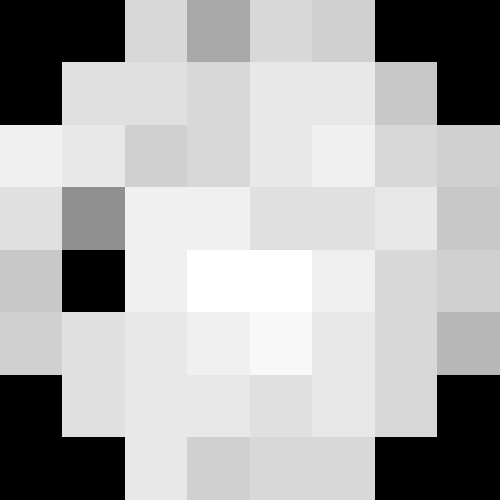



reshape_FV_value_list(points_train[1]).astype(np.uint8)

array([[ 0,  0, 27, 21, 27, 26,  0,  0],
       [ 0, 28, 28, 27, 29, 29, 25,  0],
       [30, 29, 26, 27, 29, 30, 27, 26],
       [28, 18, 30, 30, 28, 28, 29, 25],
       [25,  0, 30, 32, 32, 30, 27, 26],
       [26, 28, 29, 30, 31, 29, 27, 23],
       [ 0, 28, 29, 29, 28, 29, 27,  0],
       [ 0,  0, 29, 26, 27, 27,  0,  0]], dtype=uint8)
       
       
       比對無誤！

In [ ]:
filename_train[1]

In [ ]:
points_train[1]

In [ ]:
reshape_FV_value_list(points_train[1]).astype(np.uint8)

# older referecnec cell [DONOT RUN]

## display pred_FV_value to image

In [ ]:
# from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error
# """
# 以MSE越小，則PSNR越大；所以PSNR越大，代表著圖像質量越好。
# PSNR高於40dB說明圖像質量極好（即非常接近原始圖像），
# 在30—40dB通常表示圖像質量是好的（即失真可以察覺但可以接受），
# 在20—30dB說明圖像質量差；
# PSNR低於20dB圖像不可接受

# SSIM具有對稱性，即SSIM(x,y)=SSIM(y,x)
# SSIM是一個0到1之間的數，越大表示輸出圖像和無失真圖像的差距越小，即圖像質量越好。當兩幅圖像一模一樣時，SSIM=1；

# """

# # points_train, points_val
# for i in range(len(points_val)):
#     prd_p = reshape_FV_value_list(val_points_pred[i])
#     gt_p = reshape_FV_value_list(points_val[i])
    
#     #check single vale in the map
#     print(prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
#     print(f'MSE : {mean_squared_error(prd_p, gt_p)}')
#     print(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.uint8), gt_p.astype(np.uint8))}')
#     print(f'SSIM: {structural_similarity(prd_p.astype(np.uint8), gt_p.astype(np.uint8), full=False, multichannel=False)}')
#     print(prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4])
    
#     fig, axarr = plt.subplots(1,2,figsize=(10,5))
#     axarr[0].imshow(prd_p, interpolation='nearest', cmap="gray")
#     axarr[0].set_title("Pred")
#     axarr[0].axis('off')

#     axarr[1].imshow(gt_p, interpolation='nearest', cmap="gray")
#     axarr[1].set_title("FV ground truth")
#     axarr[1].axis('off')
   
#     fig.tight_layout()
#     plt.show()
    

In [ ]:
640/8

In [ ]:
val_zero = np.zeros((640,640))

In [ ]:
val_zero.shape

In [ ]:
val_zero = np.zeros((52,52))

In [ ]:
val_zero.shape

In [ ]:
plt.imshow(val_zero, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:
val_zero[:,:] = points_val[0]

In [ ]:
plt.imshow(val_zero, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:
points_val[0][:]

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [ ]:
mape(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mape(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mae = tf.keras.losses.MeanAbsoluteError()

In [ ]:
mae(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mae(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mse = tf.keras.losses.MeanSquaredError()

In [ ]:
mse(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mse(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mse([1], [3]).numpy()

### Visualize results (org keypoing plot)

Now visualize neural network results on several images from validation sample. Make sure that your network outputs different points for images (i.e. it doesn't output some constant).

In [ ]:
val_points_pred = model.predict(imgs_val)

In [ ]:
print(val_points_pred.shape)

In [ ]:
for i in range(11,15):
    visualize_points(imgs_val[i], val_points_pred[i])

Conclusion

The facial keypoints regression works quite well as seen above. Final MSE on Validation set ~ 0.013.

Due to my computational limitations, I trained the regressor on 50x50 images instead of 100x100 images. I also had to read half the dataset, train the NN, save the weights, and then train the other half. (Otherwise there was a MemoryError). This explains the extremely low loss that can be seen in the output of the model.fit. 

###
[2023-04-08] 

$tensorboard --host 0.0.0.0 --port 5000 --logdir PACG/train_log/20230408-210409/
